In [1]:
import sys
import cv2
import os
import scipy
import shutil
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter, attrgetter
import keras.backend as K

Using TensorFlow backend.


In [2]:
origdir = "/home/james/Kaggle/Whale/Data/train/1"
indir = "/home/james/Kaggle/Whale/Data/train/4"
outdir = "/home/james/Kaggle/Whale/Data/train/5"

In [3]:
filenames = os.listdir(origdir)
filenames.sort()

In [17]:
maskdir = "/home/james/Kaggle/Whale/Data/train/masks"
exampledir = "/home/james/Kaggle/Whale/Data/train/examples"

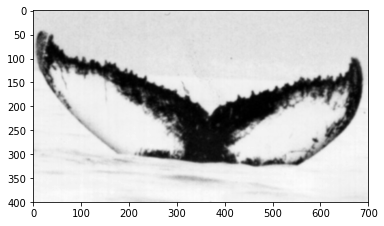

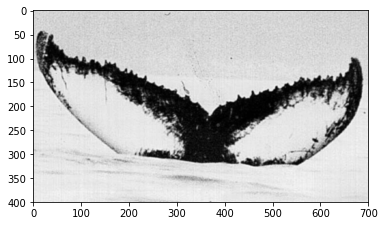

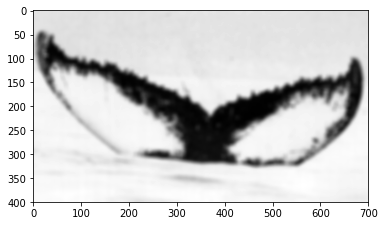

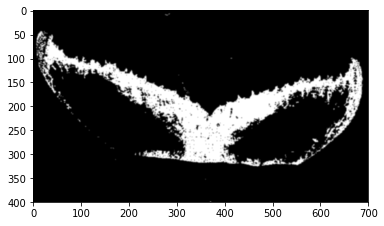

0.13690714285714287
110


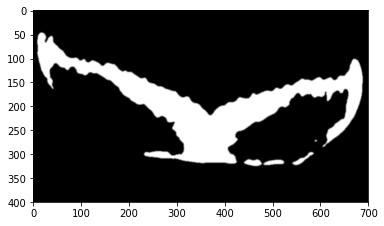

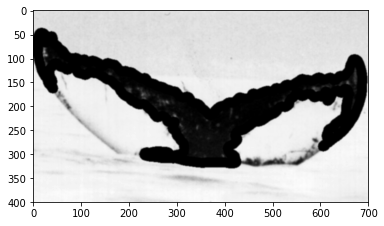

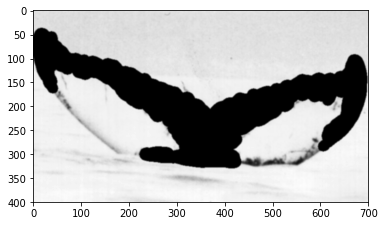

In [852]:
#file = "9247fe255.jpg" # 0.0100 Partial
#file = "9219b6e10.jpg" # 0.0100 Partial
#file = "9157e607c.jpg" # 0.3355 Partial
#file = "9148d9ef2.jpg" # 0.0510 Partial
#file = "9147c46b0.jpg" # 0.0510 Partial
#file = "9102a74ab.jpg" # 0.0569 Partial
#file = "8951a26a6.jpg" # 0.1469 Partial
#file = "8599a754e.jpg" # 0.2257 Partial
#file = "8388acbce.jpg" # 0.2914 Partial
#file = "8386c8874.jpg" # 0.0719 Partial 
#file = "8378ddd44.jpg" # 0.2914 Partial
#file = "8336c3836.jpg" # 0.0433 Partial
#file = "8180c1ef0.jpg" # 0.2935 Partial
#file = "8223ae8a6.jpg" # 0.3649 Partial
#file = "8276c7d3f.jpg" # 0.0016 Partial
#file = "0831d05a7.jpg" # 0.1611 Partial
#file = "08032bc2f.jpg" # 0.0887 Partial
#file = "8106d9d50.jpg" # 0.1433 Partial
#file = "8268d4c27.jpg" # 0.1469 Partial
#file = "8324c1929.jpg" # 0.1385 Partial
#file = "8319e2797.jpg" # 0.0757 sucks can't find
#file = "8198faa03.jpg" # 0.0571 sucks inverted
#file = "9074c1b18.jpg" # 0.0043 sucks
#file = "9119bb1a2.jpg" # 0.2392 sucks
#file = "9064d5875.jpg" # 0.1098 sucks
#file = "8389e2f4d.jpg" # 0.2015 sucks
#file = "8190c00d2.jpg" # 0.1428 sucks
#file = "08242d8d5.jpg" # 0.0952 sucks
#file = "8763a9311.jpg" # 0.1160 sucks
#file = "9242f9ffb.jpg" # 0.1022 sucks
#file = "9416ffc0c.jpg" # 0.1830 sucks
#file = "9092cbc85.jpg" # 0.0510 sucks not found


kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])

sharp = cv2.filter2D(img, -1, kernel)



blurImg = cv2.blur(img,(10,10))  
plt.imshow(blurImg, cmap = 'gray', interpolation = 'bicubic')
plt.show()


#edges = cv2.Canny(img,200,255)
#plt.imshow(edges, cmap = 'gray', interpolation = 'bicubic')
#plt.show()



ret,thresh = cv2.threshold(sharp,50,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Try to determine the darkness of the image.
total_area = img.shape[0] * img.shape[1]
dark_pixels = cv2.countNonZero(thresh)
howdark = dark_pixels / total_area

print(howdark)
if howdark == 0.0:
    lowerbound = 100
elif howdark < .01:
    lowerbound = 190    
elif howdark < 0.10:
    lowerbound = 150
elif howdark < 0.13:
    lowerbound = 120
elif howdark < 0.15:
    lowerbound = 110
elif howdark < 0.19:
    lowerbound = 80 
elif howdark < 0.30:
    lowerbound = 70
    #lowerbound = 200
else:
    lowerbound = 50

print(lowerbound)

#redo threshold with lowerbound defined
ret,thresh = cv2.threshold(blurImg,lowerbound,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
_,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()


oldimg = img

# find contour with most points
contour_list = []
contour_shape = {}
i = 0
for contour in contours:
    #print(contour.shape)
    if contour.shape[0] > 200:
        contour_list.append(contour)
        contour_shape[contour.shape[0]] = i
    i += 1

contour_shape_keys = sorted(contour_shape)
c = contours[contour_shape[contour_shape_keys[-1]]]


# Draw line around that contour
cv2.drawContours(oldimg,[c],-1,(0,0,0),20)        
plt.imshow(oldimg, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Fill that contour
cv2.drawContours(img,[c],-1,(0,0,0),-1)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [8]:
#Gaussian Threshold and Image Sharpening

#file = "8032df288.jpg" # 0.0049 good
#file = "8201ded69.jpg" # 0.1888 good
#file = "8230c70bc.jpg" # 0.3690 good
#file = "08248f449.jpg" # 0.2382 good
#file = "8248f1414.jpg" # 0.0819 good
#file = "8282ee983.jpg" # 0.1213 good
#file = "8294e5a2d.jpg" # 0.3418 good
#file = "8254b9829.jpg" # 0.0034 good
#file = "8287ae563.jpg" # 0.3476 good
#file = "08315a537.jpg" # 0.0000 good
#file = "8328e1a2c.jpg" # 0.0675 good
#file = "01425e516.jpg" # 0.1558 good
#file = "8063d319b.jpg" # 0.0000 good
#file = "8011b9b6f.jpg" # 0.0165 good
#file = "8179beabd.jpg" # 0.0393 good
#file = "8262c7a59.jpg" # 0.0759 good
#file = "8217a17a1.jpg" # 0.0003 good
#file = "8334d8b8f.jpg" # 0.2194 good
#file = "8338c763f.jpg" # 0.2730 good
#file = "8359c3a48.jpg" # 0.1257 good
#file = "8359e5271.jpg" # 0.2914 good
#file = "08406b193.jpg" # 0.2257 good
#file = "08406b193.jpg" # 0.1356 good
#file = "8707e737e.jpg" # 0.2098 good
#file = "8762e8619.jpg" # 0.1133 good
#file = "9086b3d6e.jpg" # 0.0510 good
#file = "9148fd895.jpg" # 0.0100 good
#file = "9264dd387.jpg" # 0.1830 good
#file = "9247fe255.jpg" # 0.0100 Partial
#file = "9219b6e10.jpg" # 0.0100 Partial
#file = "9157e607c.jpg" # 0.3355 Partial
#file = "9148d9ef2.jpg" # 0.0510 Partial
#file = "9147c46b0.jpg" # 0.0510 Partial
#file = "9102a74ab.jpg" # 0.0569 Partial
#file = "8951a26a6.jpg" # 0.1469 Partial
#file = "8752dfba4.jpg" # 0.0855 Partial
#file = "8599a754e.jpg" # 0.2257 Partial
#file = "8388acbce.jpg" # 0.2914 Partial
#file = "8386c8874.jpg" # 0.0719 Partial 
#file = "8378ddd44.jpg" # 0.2914 Partial
#file = "8336c3836.jpg" # 0.0433 Partial
#file = "8180c1ef0.jpg" # 0.2935 Partial
#file = "8223ae8a6.jpg" # 0.3649 Partial
#file = "8276c7d3f.jpg" # 0.0016 Partial
#file = "0831d05a7.jpg" # 0.1611 Partial
#file = "08032bc2f.jpg" # 0.0887 Partial
#file = "8106d9d50.jpg" # 0.1433 Partial
#file = "8268d4c27.jpg" # 0.1469 Partial
#file = "8324c1929.jpg" # 0.1385 Partial
#file = "8319e2797.jpg" # 0.0757 sucks can't find
#file = "8198faa03.jpg" # 0.0571 sucks inverted
#file = "9074c1b18.jpg" # 0.0043 sucks
#file = "9119bb1a2.jpg" # 0.2392 sucks
#file = "9064d5875.jpg" # 0.1098 sucks
#file = "8389e2f4d.jpg" # 0.2015 sucks
#file = "8190c00d2.jpg" # 0.1428 sucks
#file = "08242d8d5.jpg" # 0.0952 sucks
#file = "8763a9311.jpg" # 0.1160 sucks
#file = "9242f9ffb.jpg" # 0.1022 sucks
#file = "9416ffc0c.jpg" # 0.1830 sucks
#file = "9092cbc85.jpg" # 0.0510 sucks not found

#img = cv2.imread(origdir + "/" + file,0)
#plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.show()


for file in filenames:
    img = cv2.imread(origdir + "/" + file,0)
    
    # Sharpen Image
    kernel = np.zeros( (9,9), np.float32)
    kernel[4,4] = 2.0   #Identity, times two! 

    #Create a box filter:
    boxFilter = np.ones( (9,9), np.float32) / 81.0

    #Subtract the two:
    kernel = kernel - boxFilter

    #Note that we are subject to overflow and underflow here...but I believe that
    # filter2D clips top and bottom ranges on the output, plus you'd need a
    # very bright or very dark pixel surrounded by the opposite type.

    old_img = img
    custom = cv2.filter2D(img, -1, kernel)

    img = custom

    ret,thresh = cv2.threshold(img,50,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)

    # Try to determine the darkness of the image.
    total_area = img.shape[0] * img.shape[1]
    dark_pixels = cv2.countNonZero(thresh)
    howdark = dark_pixels / total_area

    if howdark == 0.0:
        lowerbound = 100
    elif howdark < .01:
        lowerbound = 190    
    elif howdark < 0.10:
        lowerbound = 150
    elif howdark < 0.13:
        lowerbound = 120
    elif howdark < 0.15:
        lowerbound = 90
    elif howdark < 0.19:
        lowerbound = 80 
    elif howdark < 0.30:
        lowerbound = 70
    else:
        lowerbound = 50

    #redo threshold with lowerbound defined
    ret,thresh = cv2.threshold(img,lowerbound,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    _,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    # find contour with most points 
    contour_shape = {}
    i = 0
    for contour in contours:
        if contour.shape[0] > 500:
            contour_shape[contour.shape[0]] = i
        i += 1

    contour_shape_keys = sorted(contour_shape)
    try:
        c = contours[contour_shape[contour_shape_keys[-1]]]
    except:
        print("Can't do:", file)
        shutil.copyfile(origdir + "/" + file, maskdir + "/" + file)
        continue
    # Fill that contour
    cv2.drawContours(img,[c],-1,(0,0,0),-1)
    img[img != 0] = 255
    print("Doing: ", file, ":",c.shape)

    cv2.imwrite(maskdir + "/" + file, img)
    

Doing:  0000e88ab.jpg : (5821, 1, 2)
Doing:  0001f9222.jpg : (2579, 1, 2)
Doing:  00029d126.jpg : (2928, 1, 2)
Doing:  00050a15a.jpg : (3136, 1, 2)
Doing:  0005c1ef8.jpg : (920, 1, 2)
Doing:  0006e997e.jpg : (1206, 1, 2)
Doing:  000a6daec.jpg : (3021, 1, 2)
Doing:  000f0f2bf.jpg : (3778, 1, 2)
Doing:  0016b897a.jpg : (2540, 1, 2)
Doing:  001c1ac5f.jpg : (4146, 1, 2)
Doing:  001cae55b.jpg : (2958, 1, 2)
Doing:  001d7450c.jpg : (2379, 1, 2)
Doing:  00200e115.jpg : (2686, 1, 2)
Doing:  00245a598.jpg : (3356, 1, 2)
Doing:  002b4615d.jpg : (3033, 1, 2)
Doing:  002f99f01.jpg : (2554, 1, 2)
Doing:  00355ff28.jpg : (2230, 1, 2)
Doing:  00357e37a.jpg : (4585, 1, 2)
Doing:  003795857.jpg : (1594, 1, 2)
Doing:  0041880bf.jpg : (2335, 1, 2)
Doing:  0043da555.jpg : (5257, 1, 2)
Doing:  00442c882.jpg : (8383, 1, 2)
Doing:  00464ff65.jpg : (3992, 1, 2)
Doing:  004775679.jpg : (3833, 1, 2)
Doing:  004ae9e26.jpg : (5992, 1, 2)
Doing:  004c0f43b.jpg : (1834, 1, 2)
Doing:  004e8ad5b.jpg : (4045, 1, 2)
Do

Doing:  023f72c08.jpg : (2103, 1, 2)
Doing:  0242534d4.jpg : (5624, 1, 2)
Doing:  024a7136d.jpg : (2946, 1, 2)
Doing:  02518df7d.jpg : (3252, 1, 2)
Doing:  0253d946f.jpg : (2802, 1, 2)
Doing:  025407c89.jpg : (4824, 1, 2)
Doing:  02545618c.jpg : (1744, 1, 2)
Doing:  02564ae05.jpg : (8005, 1, 2)
Doing:  02568e465.jpg : (3060, 1, 2)
Doing:  025738f80.jpg : (1799, 1, 2)
Doing:  02583af93.jpg : (2007, 1, 2)
Doing:  0258983a9.jpg : (3494, 1, 2)
Doing:  025c1eb28.jpg : (2414, 1, 2)
Doing:  025d86fa4.jpg : (1465, 1, 2)
Doing:  025ea05b4.jpg : (3348, 1, 2)
Doing:  0260984e4.jpg : (2399, 1, 2)
Doing:  026345181.jpg : (5937, 1, 2)
Doing:  0264bd4b5.jpg : (5359, 1, 2)
Doing:  0268c74a5.jpg : (2265, 1, 2)
Doing:  026cf2c73.jpg : (1309, 1, 2)
Doing:  0270cd806.jpg : (4012, 1, 2)
Doing:  02773908c.jpg : (1804, 1, 2)
Doing:  027988cef.jpg : (2904, 1, 2)
Doing:  027af9390.jpg : (3340, 1, 2)
Doing:  027ec5a1d.jpg : (3725, 1, 2)
Doing:  027f1594f.jpg : (3147, 1, 2)
Doing:  02810b9d1.jpg : (2014, 1, 2)
D

Doing:  047f23339.jpg : (3192, 1, 2)
Doing:  047f3949c.jpg : (2578, 1, 2)
Doing:  04822fc4b.jpg : (1654, 1, 2)
Doing:  048243c9a.jpg : (911, 1, 2)
Doing:  0483452b5.jpg : (2218, 1, 2)
Doing:  0485d51aa.jpg : (4175, 1, 2)
Doing:  048606a80.jpg : (3206, 1, 2)
Doing:  0486d64df.jpg : (972, 1, 2)
Doing:  048762f18.jpg : (1430, 1, 2)
Doing:  048803f5b.jpg : (1216, 1, 2)
Doing:  0489c432d.jpg : (2976, 1, 2)
Doing:  048ab10a5.jpg : (1900, 1, 2)
Doing:  048bbca71.jpg : (1809, 1, 2)
Doing:  048d0c59a.jpg : (867, 1, 2)
Doing:  04900b886.jpg : (6091, 1, 2)
Doing:  04901bb01.jpg : (20338, 1, 2)
Doing:  049202dd2.jpg : (1945, 1, 2)
Doing:  04931bb7a.jpg : (9386, 1, 2)
Doing:  0493ff477.jpg : (4451, 1, 2)
Doing:  04966287f.jpg : (4033, 1, 2)
Doing:  049790c4a.jpg : (5151, 1, 2)
Doing:  0499ebf05.jpg : (2695, 1, 2)
Doing:  049bcf04f.jpg : (1905, 1, 2)
Doing:  049be1586.jpg : (1602, 1, 2)
Doing:  049c26660.jpg : (2035, 1, 2)
Doing:  049c91eea.jpg : (4999, 1, 2)
Doing:  049fa60f6.jpg : (3419, 1, 2)
Doi

Doing:  06cfbaddf.jpg : (1074, 1, 2)
Doing:  06d0f5102.jpg : (1225, 1, 2)
Doing:  06d730fc2.jpg : (1467, 1, 2)
Doing:  06d79681a.jpg : (2722, 1, 2)
Doing:  06d9031e9.jpg : (1671, 1, 2)
Doing:  06da7187c.jpg : (3210, 1, 2)
Doing:  06dae96d6.jpg : (2340, 1, 2)
Doing:  06dbe4d84.jpg : (3749, 1, 2)
Doing:  06dc95050.jpg : (3588, 1, 2)
Doing:  06e157a91.jpg : (2727, 1, 2)
Doing:  06e24ec31.jpg : (3874, 1, 2)
Doing:  06e958fef.jpg : (2011, 1, 2)
Doing:  06ebd7587.jpg : (3192, 1, 2)
Doing:  06ec79a1c.jpg : (2030, 1, 2)
Doing:  06f05ed89.jpg : (839, 1, 2)
Doing:  06f3ca9ed.jpg : (1800, 1, 2)
Doing:  06f5360e9.jpg : (7833, 1, 2)
Doing:  06f547c31.jpg : (3586, 1, 2)
Doing:  06f80eb62.jpg : (9051, 1, 2)
Doing:  06f8ca075.jpg : (3978, 1, 2)
Doing:  07001d538.jpg : (3692, 1, 2)
Doing:  0702dfdcf.jpg : (2441, 1, 2)
Doing:  0704cc0a7.jpg : (6091, 1, 2)
Doing:  07064347b.jpg : (1634, 1, 2)
Doing:  0706d4216.jpg : (2392, 1, 2)
Doing:  070abfb84.jpg : (1711, 1, 2)
Doing:  070e4a8b7.jpg : (2285, 1, 2)
Do

Doing:  08f17bbf4.jpg : (5228, 1, 2)
Doing:  08f36d1f2.jpg : (2106, 1, 2)
Doing:  08f58ed18.jpg : (1835, 1, 2)
Doing:  08f8fe56e.jpg : (1989, 1, 2)
Doing:  08fa77b9f.jpg : (3801, 1, 2)
Doing:  08feff2af.jpg : (1091, 1, 2)
Doing:  09032ecef.jpg : (7277, 1, 2)
Doing:  090470388.jpg : (3713, 1, 2)
Doing:  090736d14.jpg : (4356, 1, 2)
Doing:  090d520d5.jpg : (5727, 1, 2)
Doing:  090ecfb96.jpg : (1613, 1, 2)
Doing:  090f60ace.jpg : (3372, 1, 2)
Doing:  0910824aa.jpg : (1062, 1, 2)
Doing:  0912a7ed2.jpg : (1973, 1, 2)
Doing:  0912b97e6.jpg : (2081, 1, 2)
Doing:  0913c89c3.jpg : (3049, 1, 2)
Doing:  0918c86d1.jpg : (1018, 1, 2)
Doing:  0918e42f2.jpg : (2353, 1, 2)
Doing:  091e9ccf8.jpg : (2155, 1, 2)
Doing:  091f13215.jpg : (1887, 1, 2)
Doing:  091f2dc00.jpg : (4262, 1, 2)
Doing:  092085a60.jpg : (1312, 1, 2)
Doing:  0926c6138.jpg : (1441, 1, 2)
Doing:  0927816bd.jpg : (8298, 1, 2)
Doing:  092862dac.jpg : (3661, 1, 2)
Doing:  092a3bfa7.jpg : (1226, 1, 2)
Doing:  092ef02b8.jpg : (2982, 1, 2)
D

Doing:  0b13ea143.jpg : (2174, 1, 2)
Doing:  0b199a238.jpg : (2589, 1, 2)
Doing:  0b19b0929.jpg : (3160, 1, 2)
Doing:  0b246cd07.jpg : (8210, 1, 2)
Can't do: 0b24ec17b.jpg
Doing:  0b25273c7.jpg : (4949, 1, 2)
Doing:  0b2565d62.jpg : (3071, 1, 2)
Doing:  0b26d655c.jpg : (1961, 1, 2)
Doing:  0b26dd505.jpg : (1990, 1, 2)
Doing:  0b2979ba8.jpg : (6000, 1, 2)
Doing:  0b29d78ce.jpg : (608, 1, 2)
Doing:  0b2ac6f12.jpg : (1937, 1, 2)
Doing:  0b2cbfa4c.jpg : (2455, 1, 2)
Doing:  0b2e9775f.jpg : (3146, 1, 2)
Doing:  0b2eb27b5.jpg : (4377, 1, 2)
Doing:  0b38cb192.jpg : (6854, 1, 2)
Doing:  0b39157f8.jpg : (5406, 1, 2)
Doing:  0b39dab59.jpg : (1097, 1, 2)
Doing:  0b434d336.jpg : (5816, 1, 2)
Doing:  0b4424023.jpg : (9350, 1, 2)
Doing:  0b463b697.jpg : (1579, 1, 2)
Doing:  0b46f73c3.jpg : (4439, 1, 2)
Doing:  0b4735b87.jpg : (9395, 1, 2)
Doing:  0b4a790c3.jpg : (4126, 1, 2)
Doing:  0b4b6d9d4.jpg : (2569, 1, 2)
Doing:  0b4cfb7d1.jpg : (1197, 1, 2)
Doing:  0b4d78cab.jpg : (1492, 1, 2)
Doing:  0b51561

Doing:  0d779b3c9.jpg : (2706, 1, 2)
Doing:  0d7bd80d3.jpg : (2182, 1, 2)
Doing:  0d7c3b68b.jpg : (640, 1, 2)
Doing:  0d84680c3.jpg : (3602, 1, 2)
Doing:  0d87292a0.jpg : (1158, 1, 2)
Doing:  0d88aae4b.jpg : (5179, 1, 2)
Doing:  0d89888da.jpg : (2021, 1, 2)
Doing:  0d8b25dc8.jpg : (2373, 1, 2)
Doing:  0d8d75f45.jpg : (3830, 1, 2)
Doing:  0d8e41a96.jpg : (1825, 1, 2)
Doing:  0d8e7abf4.jpg : (2937, 1, 2)
Doing:  0d9289904.jpg : (2071, 1, 2)
Doing:  0d94bdad3.jpg : (7580, 1, 2)
Doing:  0d95c043c.jpg : (6218, 1, 2)
Doing:  0d9ea371d.jpg : (1560, 1, 2)
Doing:  0da04e713.jpg : (1989, 1, 2)
Doing:  0da34cb6e.jpg : (548, 1, 2)
Doing:  0da56669d.jpg : (1197, 1, 2)
Doing:  0da5bb1b1.jpg : (12188, 1, 2)
Doing:  0da6e9b14.jpg : (1387, 1, 2)
Doing:  0dad7f7d5.jpg : (2450, 1, 2)
Doing:  0db1edb0c.jpg : (3887, 1, 2)
Doing:  0db330bd2.jpg : (5445, 1, 2)
Doing:  0db352816.jpg : (2749, 1, 2)
Doing:  0db3a2131.jpg : (2588, 1, 2)
Doing:  0db3fb42b.jpg : (2612, 1, 2)
Doing:  0db59bbec.jpg : (2182, 1, 2)
Do

Doing:  0fd680681.jpg : (1937, 1, 2)
Doing:  0fd6ca5c6.jpg : (2220, 1, 2)
Doing:  0fdc35295.jpg : (2316, 1, 2)
Doing:  0fdd4c11d.jpg : (2343, 1, 2)
Doing:  0fdde3140.jpg : (1297, 1, 2)
Doing:  0fdef864a.jpg : (1000, 1, 2)
Doing:  0fe1a6100.jpg : (551, 1, 2)
Doing:  0feb8947a.jpg : (1840, 1, 2)
Doing:  0fece49a2.jpg : (2391, 1, 2)
Doing:  0fef6e334.jpg : (6290, 1, 2)
Doing:  0fefaab14.jpg : (1930, 1, 2)
Doing:  0ff53e610.jpg : (2817, 1, 2)
Doing:  0ff647d51.jpg : (3688, 1, 2)
Doing:  0ff691557.jpg : (5944, 1, 2)
Doing:  0ffc13ffa.jpg : (856, 1, 2)
Doing:  0ffc48fd2.jpg : (1148, 1, 2)
Doing:  0ffff9d5e.jpg : (6178, 1, 2)
Doing:  10009502c.jpg : (5248, 1, 2)
Doing:  100790404.jpg : (3519, 1, 2)
Doing:  1008bd463.jpg : (2637, 1, 2)
Doing:  100ab2313.jpg : (1302, 1, 2)
Doing:  100f10498.jpg : (1569, 1, 2)
Doing:  100f71902.jpg : (3802, 1, 2)
Doing:  101025d39.jpg : (5201, 1, 2)
Doing:  1012a7a81.jpg : (1196, 1, 2)
Doing:  10147467d.jpg : (7257, 1, 2)
Doing:  1015d1356.jpg : (2852, 1, 2)
Doi

Doing:  1235eb22c.jpg : (1497, 1, 2)
Doing:  1236b667c.jpg : (1640, 1, 2)
Doing:  1239463f4.jpg : (2310, 1, 2)
Doing:  123b794ba.jpg : (1256, 1, 2)
Can't do: 1242405d7.jpg
Doing:  124254cb7.jpg : (2768, 1, 2)
Doing:  1244ce135.jpg : (894, 1, 2)
Doing:  124913ed3.jpg : (2660, 1, 2)
Doing:  124a0e40a.jpg : (3241, 1, 2)
Doing:  124b1ef2d.jpg : (3444, 1, 2)
Doing:  12509a8e1.jpg : (4713, 1, 2)
Doing:  12518411d.jpg : (3801, 1, 2)
Doing:  1255a88bc.jpg : (13180, 1, 2)
Doing:  125869ae7.jpg : (7275, 1, 2)
Doing:  125b7d50d.jpg : (2820, 1, 2)
Doing:  125ba1407.jpg : (5498, 1, 2)
Doing:  125c6370c.jpg : (2073, 1, 2)
Doing:  126002936.jpg : (10560, 1, 2)
Doing:  1262321e3.jpg : (6469, 1, 2)
Doing:  1262dba60.jpg : (1328, 1, 2)
Doing:  12670516b.jpg : (5047, 1, 2)
Doing:  1268ef193.jpg : (2365, 1, 2)
Doing:  126e44013.jpg : (11437, 1, 2)
Can't do: 126fc51b0.jpg
Doing:  1270df73e.jpg : (1994, 1, 2)
Doing:  1272df255.jpg : (867, 1, 2)
Doing:  127309730.jpg : (2495, 1, 2)
Doing:  12768d93a.jpg : (1

Doing:  147647daf.jpg : (15038, 1, 2)
Doing:  1476b1192.jpg : (2933, 1, 2)
Doing:  14782e4b7.jpg : (2947, 1, 2)
Doing:  1478b1cb9.jpg : (1591, 1, 2)
Doing:  147a537c4.jpg : (8973, 1, 2)
Doing:  147b61502.jpg : (1562, 1, 2)
Doing:  147b87136.jpg : (2167, 1, 2)
Doing:  1480f526d.jpg : (1211, 1, 2)
Doing:  14848e39f.jpg : (4687, 1, 2)
Doing:  14854d5d9.jpg : (4915, 1, 2)
Doing:  14859f304.jpg : (3533, 1, 2)
Doing:  1487566c6.jpg : (952, 1, 2)
Doing:  14927c837.jpg : (1432, 1, 2)
Doing:  14940539a.jpg : (6855, 1, 2)
Doing:  149c6c7a5.jpg : (2116, 1, 2)
Doing:  149f2e493.jpg : (5135, 1, 2)
Doing:  14a805552.jpg : (3702, 1, 2)
Doing:  14a82ef56.jpg : (2062, 1, 2)
Doing:  14a88b31f.jpg : (1349, 1, 2)
Can't do: 14adbcb04.jpg
Doing:  14b21ffb4.jpg : (2339, 1, 2)
Doing:  14b2c8073.jpg : (1466, 1, 2)
Doing:  14b4ca340.jpg : (2633, 1, 2)
Can't do: 14b5efc26.jpg
Doing:  14b76940e.jpg : (10504, 1, 2)
Doing:  14b98426f.jpg : (6180, 1, 2)
Doing:  14befe397.jpg : (1870, 1, 2)
Doing:  14bf04de1.jpg : (4

Doing:  16dac4e42.jpg : (2813, 1, 2)
Doing:  16ddf58df.jpg : (2506, 1, 2)
Doing:  16e23a9b3.jpg : (4291, 1, 2)
Doing:  16e476a2f.jpg : (3091, 1, 2)
Doing:  16e485a4b.jpg : (3047, 1, 2)
Doing:  16e62d1a1.jpg : (4568, 1, 2)
Doing:  16e8e8362.jpg : (2788, 1, 2)
Doing:  16e90bc21.jpg : (2061, 1, 2)
Doing:  16ebc1b0d.jpg : (4245, 1, 2)
Doing:  16f7bda7f.jpg : (5889, 1, 2)
Doing:  16fe82c1a.jpg : (1386, 1, 2)
Doing:  16fff2239.jpg : (2086, 1, 2)
Doing:  1702b6789.jpg : (2189, 1, 2)
Doing:  17054f31f.jpg : (2278, 1, 2)
Doing:  170720f1a.jpg : (2586, 1, 2)
Doing:  170cbc334.jpg : (2474, 1, 2)
Doing:  170d93a3f.jpg : (5873, 1, 2)
Doing:  1711a41c2.jpg : (8632, 1, 2)
Doing:  171432590.jpg : (2848, 1, 2)
Doing:  1716f46fc.jpg : (1923, 1, 2)
Doing:  171cbbcaa.jpg : (13982, 1, 2)
Doing:  17202fd2d.jpg : (1710, 1, 2)
Doing:  172a034c7.jpg : (2823, 1, 2)
Doing:  172ec7dfa.jpg : (9604, 1, 2)
Doing:  172f0611b.jpg : (7983, 1, 2)
Doing:  172fccbd1.jpg : (2134, 1, 2)
Doing:  17333159c.jpg : (6856, 1, 2)


Doing:  196aed87a.jpg : (5009, 1, 2)
Doing:  196de5a3a.jpg : (1535, 1, 2)
Doing:  196f97991.jpg : (2965, 1, 2)
Doing:  1973d2873.jpg : (3606, 1, 2)
Doing:  197851aa0.jpg : (3582, 1, 2)
Doing:  197902f24.jpg : (9467, 1, 2)
Doing:  197cd3d46.jpg : (5000, 1, 2)
Doing:  197d3b168.jpg : (2675, 1, 2)
Doing:  197fe5650.jpg : (7585, 1, 2)
Doing:  1981c093b.jpg : (1651, 1, 2)
Doing:  1984f2d9f.jpg : (2726, 1, 2)
Doing:  1987cd8f3.jpg : (8959, 1, 2)
Doing:  1987d6b18.jpg : (1882, 1, 2)
Doing:  1988f0d99.jpg : (11202, 1, 2)
Doing:  198a4b1bc.jpg : (3113, 1, 2)
Doing:  199080ddc.jpg : (1535, 1, 2)
Doing:  19917c432.jpg : (5817, 1, 2)
Doing:  1995f6215.jpg : (1158, 1, 2)
Doing:  1996fb766.jpg : (2892, 1, 2)
Doing:  1997bdc41.jpg : (1959, 1, 2)
Doing:  199a417aa.jpg : (619, 1, 2)
Doing:  199c7494a.jpg : (3333, 1, 2)
Doing:  199f8e79d.jpg : (5198, 1, 2)
Doing:  19a34e787.jpg : (2552, 1, 2)
Doing:  19a7a264b.jpg : (1568, 1, 2)
Doing:  19a7dd6aa.jpg : (1441, 1, 2)
Doing:  19a81076c.jpg : (3202, 1, 2)
D

Doing:  1bb486b25.jpg : (5667, 1, 2)
Doing:  1bb5078ef.jpg : (3340, 1, 2)
Doing:  1bb661148.jpg : (1738, 1, 2)
Doing:  1bb70c1aa.jpg : (9415, 1, 2)
Doing:  1bb82d34d.jpg : (3090, 1, 2)
Doing:  1bb8d7847.jpg : (1718, 1, 2)
Doing:  1bb99db65.jpg : (1474, 1, 2)
Doing:  1bbbba4a7.jpg : (6352, 1, 2)
Doing:  1bbd1dade.jpg : (4982, 1, 2)
Doing:  1bbd4219a.jpg : (2469, 1, 2)
Doing:  1bbd772ab.jpg : (3029, 1, 2)
Doing:  1bc6642e3.jpg : (1517, 1, 2)
Doing:  1bc7d373b.jpg : (1643, 1, 2)
Doing:  1bcb76186.jpg : (7173, 1, 2)
Doing:  1bce2c04b.jpg : (3917, 1, 2)
Doing:  1bd7e5266.jpg : (2101, 1, 2)
Doing:  1bd9636de.jpg : (3250, 1, 2)
Doing:  1be328400.jpg : (5535, 1, 2)
Doing:  1be4a9c0e.jpg : (1775, 1, 2)
Doing:  1be9ea254.jpg : (1309, 1, 2)
Doing:  1bef9ce28.jpg : (5874, 1, 2)
Doing:  1bf081136.jpg : (1897, 1, 2)
Doing:  1bf354e8d.jpg : (853, 1, 2)
Doing:  1bf96ebc7.jpg : (2342, 1, 2)
Doing:  1bfa20d9e.jpg : (3419, 1, 2)
Doing:  1bfa5bfca.jpg : (15856, 1, 2)
Doing:  1bfc1f6d7.jpg : (2259, 1, 2)
D

Doing:  1e246b8da.jpg : (5747, 1, 2)
Doing:  1e29532df.jpg : (5119, 1, 2)
Doing:  1e2c317a7.jpg : (1734, 1, 2)
Doing:  1e2f9b457.jpg : (3205, 1, 2)
Doing:  1e305701a.jpg : (1288, 1, 2)
Doing:  1e38164a7.jpg : (4813, 1, 2)
Doing:  1e38ba8e7.jpg : (2372, 1, 2)
Doing:  1e38e1550.jpg : (1467, 1, 2)
Doing:  1e3f3af7f.jpg : (4515, 1, 2)
Doing:  1e44b642c.jpg : (12752, 1, 2)
Doing:  1e44fc47a.jpg : (1576, 1, 2)
Doing:  1e4617d24.jpg : (5688, 1, 2)
Doing:  1e49df4d4.jpg : (1719, 1, 2)
Doing:  1e4b4581c.jpg : (4688, 1, 2)
Doing:  1e4b60cdd.jpg : (795, 1, 2)
Doing:  1e4b8c2cf.jpg : (6063, 1, 2)
Doing:  1e4dfe5d2.jpg : (2628, 1, 2)
Doing:  1e4e80b25.jpg : (4732, 1, 2)
Doing:  1e51290a9.jpg : (3051, 1, 2)
Doing:  1e5296b34.jpg : (3268, 1, 2)
Doing:  1e555128e.jpg : (3561, 1, 2)
Doing:  1e55ac126.jpg : (2627, 1, 2)
Doing:  1e58763df.jpg : (11460, 1, 2)
Doing:  1e592515e.jpg : (5829, 1, 2)
Doing:  1e5c68b0c.jpg : (4537, 1, 2)
Doing:  1e5e7b47a.jpg : (3392, 1, 2)
Doing:  1e603228d.jpg : (1831, 1, 2)


Doing:  207fea321.jpg : (2724, 1, 2)
Doing:  20803e9b8.jpg : (1647, 1, 2)
Doing:  208547b99.jpg : (2737, 1, 2)
Doing:  20881b405.jpg : (2768, 1, 2)
Doing:  208831c9d.jpg : (2551, 1, 2)
Doing:  2088a7bb7.jpg : (2602, 1, 2)
Doing:  2089dfc87.jpg : (1702, 1, 2)
Doing:  208b8e125.jpg : (4311, 1, 2)
Doing:  208cf4c31.jpg : (4907, 1, 2)
Doing:  208d6e192.jpg : (3878, 1, 2)
Doing:  208fff889.jpg : (5422, 1, 2)
Doing:  2090e1173.jpg : (1721, 1, 2)
Can't do: 2092bdc4b.jpg
Doing:  2092d90b2.jpg : (1917, 1, 2)
Doing:  2094674d2.jpg : (8375, 1, 2)
Doing:  2094c2c9c.jpg : (4398, 1, 2)
Doing:  2097401ec.jpg : (4135, 1, 2)
Doing:  20977bf3e.jpg : (915, 1, 2)
Doing:  2099105f1.jpg : (5395, 1, 2)
Doing:  209f4c620.jpg : (3042, 1, 2)
Doing:  20a063dbb.jpg : (6915, 1, 2)
Can't do: 20a27aab1.jpg
Doing:  20a42d995.jpg : (2097, 1, 2)
Doing:  20a501e1c.jpg : (833, 1, 2)
Doing:  20a76cf1c.jpg : (6232, 1, 2)
Doing:  20abfadc0.jpg : (4880, 1, 2)
Doing:  20b3f1b0b.jpg : (3468, 1, 2)
Doing:  20b423db2.jpg : (1128

Doing:  22f75863f.jpg : (5806, 1, 2)
Doing:  22f7baf3f.jpg : (2731, 1, 2)
Doing:  22f89b263.jpg : (6710, 1, 2)
Doing:  22fc15543.jpg : (8357, 1, 2)
Doing:  22fc9b132.jpg : (3935, 1, 2)
Doing:  22fcb5a67.jpg : (2792, 1, 2)
Doing:  22fe6cfca.jpg : (4166, 1, 2)
Doing:  22febedf7.jpg : (5121, 1, 2)
Doing:  23026c967.jpg : (2559, 1, 2)
Doing:  230cf3113.jpg : (4860, 1, 2)
Doing:  230d4cea9.jpg : (1670, 1, 2)
Doing:  23112e018.jpg : (3216, 1, 2)
Doing:  2312b9966.jpg : (1932, 1, 2)
Doing:  2313bbe6b.jpg : (1037, 1, 2)
Doing:  2315507ad.jpg : (2065, 1, 2)
Doing:  2315e2226.jpg : (2503, 1, 2)
Doing:  231630090.jpg : (1712, 1, 2)
Doing:  2316f63ba.jpg : (1763, 1, 2)
Doing:  23196c123.jpg : (4873, 1, 2)
Doing:  231ab945a.jpg : (2197, 1, 2)
Doing:  231c77322.jpg : (2174, 1, 2)
Doing:  231ed7e7f.jpg : (2066, 1, 2)
Doing:  231f1f107.jpg : (15638, 1, 2)
Doing:  2320cf81c.jpg : (3682, 1, 2)
Doing:  2321e8f39.jpg : (5539, 1, 2)
Doing:  2326dba74.jpg : (3982, 1, 2)
Doing:  2328a12b2.jpg : (3823, 1, 2)


Doing:  251cc1dec.jpg : (3170, 1, 2)
Doing:  251e1e608.jpg : (2036, 1, 2)
Doing:  252359c38.jpg : (5523, 1, 2)
Doing:  2524ff600.jpg : (4278, 1, 2)
Doing:  2525044d0.jpg : (7393, 1, 2)
Doing:  2525ee4f3.jpg : (3667, 1, 2)
Doing:  2528b5054.jpg : (2544, 1, 2)
Doing:  2529525db.jpg : (3510, 1, 2)
Doing:  252a17791.jpg : (1549, 1, 2)
Doing:  252debf80.jpg : (1632, 1, 2)
Doing:  252f32e5e.jpg : (3181, 1, 2)
Doing:  252f92d36.jpg : (5461, 1, 2)
Doing:  25307411b.jpg : (3942, 1, 2)
Doing:  2531536dc.jpg : (1687, 1, 2)
Can't do: 253225ee3.jpg
Doing:  25330fd48.jpg : (3030, 1, 2)
Doing:  25367b8a5.jpg : (5612, 1, 2)
Doing:  2539b555b.jpg : (6325, 1, 2)
Doing:  253a824db.jpg : (1036, 1, 2)
Doing:  253bd466f.jpg : (2165, 1, 2)
Doing:  253c2bd2e.jpg : (1653, 1, 2)
Doing:  253e7dadb.jpg : (3223, 1, 2)
Doing:  25402e29a.jpg : (6510, 1, 2)
Doing:  2540b8ce8.jpg : (10934, 1, 2)
Doing:  254244d6b.jpg : (3007, 1, 2)
Doing:  25435d97c.jpg : (3346, 1, 2)
Doing:  2543a003c.jpg : (4535, 1, 2)
Doing:  25490

Doing:  2755155c7.jpg : (4876, 1, 2)
Doing:  275a8cb1e.jpg : (7312, 1, 2)
Doing:  275ab9611.jpg : (4215, 1, 2)
Doing:  275e244d2.jpg : (8070, 1, 2)
Doing:  275f6af9a.jpg : (4630, 1, 2)
Doing:  275fb3adf.jpg : (1534, 1, 2)
Doing:  27647e0be.jpg : (4772, 1, 2)
Can't do: 2764d5bce.jpg
Doing:  276745d39.jpg : (3325, 1, 2)
Doing:  2768f153f.jpg : (9673, 1, 2)
Doing:  276be5251.jpg : (2825, 1, 2)
Doing:  276c07308.jpg : (2031, 1, 2)
Doing:  276da5deb.jpg : (3319, 1, 2)
Doing:  276e38676.jpg : (4971, 1, 2)
Doing:  276f2b0d1.jpg : (2965, 1, 2)
Doing:  276f83d14.jpg : (3985, 1, 2)
Doing:  2770b5798.jpg : (5281, 1, 2)
Doing:  2774bb0cf.jpg : (1593, 1, 2)
Doing:  277912bc8.jpg : (3508, 1, 2)
Doing:  27793c5fe.jpg : (1671, 1, 2)
Doing:  277af130c.jpg : (5475, 1, 2)
Doing:  277b96649.jpg : (2403, 1, 2)
Doing:  278156dfe.jpg : (2343, 1, 2)
Doing:  278313517.jpg : (3348, 1, 2)
Doing:  2783c54ce.jpg : (2347, 1, 2)
Doing:  27848db54.jpg : (1953, 1, 2)
Doing:  2786bf4e0.jpg : (6053, 1, 2)
Doing:  278a45

Doing:  29bdf298a.jpg : (2298, 1, 2)
Doing:  29c3db908.jpg : (1776, 1, 2)
Doing:  29c470396.jpg : (6969, 1, 2)
Doing:  29c582beb.jpg : (3983, 1, 2)
Doing:  29c878772.jpg : (2520, 1, 2)
Doing:  29cb354fe.jpg : (1949, 1, 2)
Doing:  29cbeb78b.jpg : (2341, 1, 2)
Doing:  29ce8b754.jpg : (2185, 1, 2)
Doing:  29ce90368.jpg : (1385, 1, 2)
Doing:  29cedf51a.jpg : (7731, 1, 2)
Doing:  29d14676d.jpg : (1870, 1, 2)
Doing:  29d59d042.jpg : (3545, 1, 2)
Doing:  29d610d9b.jpg : (3023, 1, 2)
Doing:  29d8a9478.jpg : (1497, 1, 2)
Doing:  29da76615.jpg : (2171, 1, 2)
Doing:  29dad52cd.jpg : (811, 1, 2)
Doing:  29db77848.jpg : (4451, 1, 2)
Doing:  29dc8c438.jpg : (1920, 1, 2)
Can't do: 29e157313.jpg
Doing:  29e888ee6.jpg : (15463, 1, 2)
Doing:  29e9b7ed6.jpg : (3865, 1, 2)
Doing:  29ece6621.jpg : (1564, 1, 2)
Doing:  29fa02349.jpg : (4195, 1, 2)
Doing:  29fa5bbc5.jpg : (2159, 1, 2)
Doing:  29fc51505.jpg : (1241, 1, 2)
Doing:  29fc6ff1c.jpg : (5660, 1, 2)
Doing:  29ff6f6f6.jpg : (1247, 1, 2)
Doing:  2a066e

Doing:  2c2da9806.jpg : (3851, 1, 2)
Doing:  2c31bfedf.jpg : (2156, 1, 2)
Doing:  2c36f0bfe.jpg : (1904, 1, 2)
Doing:  2c370f185.jpg : (7989, 1, 2)
Doing:  2c37170a3.jpg : (2594, 1, 2)
Doing:  2c3a2467e.jpg : (8229, 1, 2)
Doing:  2c3dad402.jpg : (6052, 1, 2)
Doing:  2c3eecf9b.jpg : (6307, 1, 2)
Doing:  2c444dea3.jpg : (10742, 1, 2)
Doing:  2c459660e.jpg : (5691, 1, 2)
Doing:  2c477acc3.jpg : (3996, 1, 2)
Doing:  2c4c65f9a.jpg : (3379, 1, 2)
Doing:  2c4dcc08f.jpg : (3366, 1, 2)
Doing:  2c52dc23d.jpg : (2255, 1, 2)
Doing:  2c5936429.jpg : (5197, 1, 2)
Doing:  2c596ae63.jpg : (4498, 1, 2)
Doing:  2c597eb8e.jpg : (3125, 1, 2)
Doing:  2c5c3ea3d.jpg : (5828, 1, 2)
Doing:  2c5d13851.jpg : (1757, 1, 2)
Doing:  2c5ec4c33.jpg : (3716, 1, 2)
Doing:  2c60af2b7.jpg : (2284, 1, 2)
Doing:  2c6115f47.jpg : (1774, 1, 2)
Doing:  2c61c0fd0.jpg : (2734, 1, 2)
Doing:  2c62c3ecf.jpg : (2041, 1, 2)
Doing:  2c62e9827.jpg : (1831, 1, 2)
Doing:  2c63e83eb.jpg : (2470, 1, 2)
Doing:  2c63ff756.jpg : (6467, 1, 2)


Doing:  2e2da7d70.jpg : (1989, 1, 2)
Doing:  2e2dbaefb.jpg : (4039, 1, 2)
Doing:  2e2dd5abb.jpg : (3203, 1, 2)
Doing:  2e2e6b089.jpg : (3248, 1, 2)
Doing:  2e30d47c8.jpg : (4977, 1, 2)
Doing:  2e388734d.jpg : (1114, 1, 2)
Doing:  2e3b584c3.jpg : (589, 1, 2)
Doing:  2e3b8ea99.jpg : (3562, 1, 2)
Doing:  2e3e286e6.jpg : (2338, 1, 2)
Doing:  2e4234265.jpg : (5168, 1, 2)
Doing:  2e4330cc2.jpg : (7115, 1, 2)
Doing:  2e45e0ce2.jpg : (2613, 1, 2)
Doing:  2e4a685d3.jpg : (12696, 1, 2)
Doing:  2e4ba52cf.jpg : (2936, 1, 2)
Doing:  2e4ce9185.jpg : (1290, 1, 2)
Doing:  2e501c07d.jpg : (1822, 1, 2)
Doing:  2e50b362a.jpg : (1445, 1, 2)
Doing:  2e524dc4c.jpg : (2655, 1, 2)
Doing:  2e53a170e.jpg : (4157, 1, 2)
Doing:  2e5cf6ca3.jpg : (1724, 1, 2)
Doing:  2e5fe5623.jpg : (2327, 1, 2)
Doing:  2e6087971.jpg : (5607, 1, 2)
Doing:  2e6548705.jpg : (3252, 1, 2)
Doing:  2e711d802.jpg : (2838, 1, 2)
Doing:  2e729b409.jpg : (5544, 1, 2)
Doing:  2e7383da5.jpg : (2492, 1, 2)
Doing:  2e73fc51e.jpg : (2916, 1, 2)
D

Doing:  3082ad4b1.jpg : (2891, 1, 2)
Doing:  30837e498.jpg : (1686, 1, 2)
Doing:  3084591fc.jpg : (3132, 1, 2)
Doing:  30847d905.jpg : (1696, 1, 2)
Doing:  3090d3069.jpg : (673, 1, 2)
Doing:  30927d598.jpg : (1044, 1, 2)
Doing:  309b8afaa.jpg : (4274, 1, 2)
Doing:  309fa9c3a.jpg : (2821, 1, 2)
Doing:  30a64fe34.jpg : (3075, 1, 2)
Doing:  30a9973af.jpg : (3524, 1, 2)
Doing:  30aa68312.jpg : (3074, 1, 2)
Doing:  30ad0808d.jpg : (1527, 1, 2)
Doing:  30b462e55.jpg : (3968, 1, 2)
Doing:  30b5dc0b9.jpg : (3981, 1, 2)
Doing:  30bd700a3.jpg : (2528, 1, 2)
Doing:  30bed8ec9.jpg : (8490, 1, 2)
Doing:  30c1d5731.jpg : (1617, 1, 2)
Doing:  30c4c4ed5.jpg : (887, 1, 2)
Doing:  30c4c7619.jpg : (1948, 1, 2)
Doing:  30c6c2701.jpg : (6798, 1, 2)
Doing:  30c77baaa.jpg : (7286, 1, 2)
Doing:  30c77fce3.jpg : (5705, 1, 2)
Doing:  30c94b2d2.jpg : (1262, 1, 2)
Doing:  30c988901.jpg : (1669, 1, 2)
Doing:  30cb6f029.jpg : (2124, 1, 2)
Doing:  30cffa144.jpg : (1359, 1, 2)
Doing:  30d718e16.jpg : (574, 1, 2)
Doin

Doing:  330c65ac0.jpg : (4273, 1, 2)
Doing:  330ce0dc4.jpg : (1494, 1, 2)
Doing:  331051b10.jpg : (2009, 1, 2)
Doing:  331095eb4.jpg : (3024, 1, 2)
Doing:  3314b17b9.jpg : (2713, 1, 2)
Doing:  3315f8346.jpg : (15696, 1, 2)
Doing:  33196fcf4.jpg : (2502, 1, 2)
Doing:  331af8395.jpg : (1212, 1, 2)
Doing:  331ffc897.jpg : (629, 1, 2)
Doing:  33273c9dc.jpg : (1320, 1, 2)
Doing:  332807f94.jpg : (2291, 1, 2)
Doing:  33282a718.jpg : (3068, 1, 2)
Doing:  332e3db7c.jpg : (3536, 1, 2)
Doing:  332f8ef5d.jpg : (1770, 1, 2)
Doing:  3332b245e.jpg : (2211, 1, 2)
Doing:  3332c21d6.jpg : (2210, 1, 2)
Doing:  3332d1c68.jpg : (2102, 1, 2)
Doing:  333550dad.jpg : (4668, 1, 2)
Doing:  3335b7e0d.jpg : (3431, 1, 2)
Doing:  333c4757a.jpg : (1809, 1, 2)
Doing:  333d583f8.jpg : (3656, 1, 2)
Doing:  333dad83a.jpg : (4037, 1, 2)
Doing:  333dd71a9.jpg : (4687, 1, 2)
Doing:  333e5a851.jpg : (3357, 1, 2)
Doing:  33402fb91.jpg : (2037, 1, 2)
Doing:  3341fc105.jpg : (2144, 1, 2)
Doing:  3347515d9.jpg : (3306, 1, 2)
D

Doing:  356ad1468.jpg : (9678, 1, 2)
Doing:  356b82bbe.jpg : (1819, 1, 2)
Doing:  356ec956e.jpg : (2366, 1, 2)
Doing:  35734cdbc.jpg : (8956, 1, 2)
Doing:  357370fa2.jpg : (2267, 1, 2)
Doing:  3573ea087.jpg : (2311, 1, 2)
Doing:  3573f86cb.jpg : (1898, 1, 2)
Doing:  3577588f3.jpg : (7400, 1, 2)
Doing:  357c516eb.jpg : (2338, 1, 2)
Doing:  357c89dde.jpg : (1841, 1, 2)
Doing:  357ce5346.jpg : (1973, 1, 2)
Doing:  357db4850.jpg : (1674, 1, 2)
Doing:  358060b34.jpg : (2696, 1, 2)
Doing:  3580d4600.jpg : (1459, 1, 2)
Doing:  35866b893.jpg : (792, 1, 2)
Doing:  3586f5a0c.jpg : (3670, 1, 2)
Doing:  35893743c.jpg : (1936, 1, 2)
Doing:  358b56609.jpg : (3508, 1, 2)
Doing:  358c92e00.jpg : (4712, 1, 2)
Doing:  358eb3afb.jpg : (3260, 1, 2)
Doing:  35905e790.jpg : (3127, 1, 2)
Doing:  3591d4c06.jpg : (2597, 1, 2)
Doing:  3591e954a.jpg : (13873, 1, 2)
Doing:  3594cce2e.jpg : (1642, 1, 2)
Doing:  359d5dedb.jpg : (3951, 1, 2)
Doing:  35a121803.jpg : (2637, 1, 2)
Doing:  35a1ad74a.jpg : (2310, 1, 2)
D

Doing:  37910314d.jpg : (2636, 1, 2)
Doing:  379363c15.jpg : (1234, 1, 2)
Doing:  3793800ae.jpg : (10987, 1, 2)
Doing:  379b9f6d6.jpg : (3132, 1, 2)
Doing:  379bdf0d7.jpg : (1098, 1, 2)
Doing:  379cb6a22.jpg : (2906, 1, 2)
Doing:  379d995e3.jpg : (1583, 1, 2)
Doing:  379e2ac24.jpg : (3428, 1, 2)
Doing:  37a2a1876.jpg : (11261, 1, 2)
Doing:  37a7267a3.jpg : (5246, 1, 2)
Doing:  37af46dee.jpg : (2058, 1, 2)
Doing:  37b04f82e.jpg : (2134, 1, 2)
Doing:  37b2f4505.jpg : (4809, 1, 2)
Doing:  37b30c89f.jpg : (2952, 1, 2)
Doing:  37b33a15a.jpg : (5941, 1, 2)
Doing:  37b48ea14.jpg : (3078, 1, 2)
Doing:  37b53a488.jpg : (2629, 1, 2)
Doing:  37b68d213.jpg : (1324, 1, 2)
Doing:  37b9bbc6a.jpg : (2243, 1, 2)
Doing:  37bb72fbd.jpg : (1116, 1, 2)
Doing:  37bc1b579.jpg : (4724, 1, 2)
Doing:  37bcba41a.jpg : (4556, 1, 2)
Doing:  37c36c81b.jpg : (1164, 1, 2)
Doing:  37cb15bc4.jpg : (1483, 1, 2)
Doing:  37cb212d7.jpg : (5321, 1, 2)
Doing:  37d0bd693.jpg : (2010, 1, 2)
Doing:  37d42b27b.jpg : (1425, 1, 2)

Doing:  39f378f58.jpg : (4689, 1, 2)
Doing:  39f537f54.jpg : (3062, 1, 2)
Doing:  39f7f67c5.jpg : (2644, 1, 2)
Doing:  39f7f7e41.jpg : (1154, 1, 2)
Doing:  39f98ac18.jpg : (3892, 1, 2)
Doing:  3a0062726.jpg : (5443, 1, 2)
Doing:  3a034e86b.jpg : (2580, 1, 2)
Doing:  3a04950af.jpg : (2421, 1, 2)
Doing:  3a049f7ea.jpg : (1883, 1, 2)
Doing:  3a05a393f.jpg : (6871, 1, 2)
Doing:  3a0838a1e.jpg : (1811, 1, 2)
Doing:  3a084b7a7.jpg : (2460, 1, 2)
Doing:  3a098e044.jpg : (10048, 1, 2)
Doing:  3a09b662c.jpg : (2247, 1, 2)
Doing:  3a0c56599.jpg : (2903, 1, 2)
Doing:  3a0dceebd.jpg : (2092, 1, 2)
Doing:  3a0fe3838.jpg : (1298, 1, 2)
Doing:  3a10b7d96.jpg : (1075, 1, 2)
Doing:  3a12c55f7.jpg : (2226, 1, 2)
Doing:  3a1442ed5.jpg : (2216, 1, 2)
Doing:  3a16eaf31.jpg : (2750, 1, 2)
Doing:  3a17193ce.jpg : (1181, 1, 2)
Doing:  3a182a63c.jpg : (6452, 1, 2)
Doing:  3a1a8f03f.jpg : (8321, 1, 2)
Doing:  3a1af3857.jpg : (2426, 1, 2)
Doing:  3a1af65d9.jpg : (6167, 1, 2)
Doing:  3a1bfe1d8.jpg : (2399, 1, 2)


Doing:  3c7b51d15.jpg : (3434, 1, 2)
Doing:  3c81b70f4.jpg : (7037, 1, 2)
Doing:  3c8256238.jpg : (3499, 1, 2)
Doing:  3c8685029.jpg : (2980, 1, 2)
Doing:  3c87a722e.jpg : (1857, 1, 2)
Doing:  3c89b9105.jpg : (13839, 1, 2)
Doing:  3c8a8b718.jpg : (1159, 1, 2)
Doing:  3c8c1f7b3.jpg : (2879, 1, 2)
Doing:  3c8c68129.jpg : (5386, 1, 2)
Doing:  3c8e569cd.jpg : (1825, 1, 2)
Doing:  3c8e7258b.jpg : (2035, 1, 2)
Doing:  3c8f87463.jpg : (4911, 1, 2)
Doing:  3c90ae279.jpg : (6114, 1, 2)
Can't do: 3c999ac78.jpg
Doing:  3c99f9aef.jpg : (2374, 1, 2)
Doing:  3c9ccb9b5.jpg : (1550, 1, 2)
Doing:  3c9da89b6.jpg : (2786, 1, 2)
Doing:  3c9f6d426.jpg : (2946, 1, 2)
Doing:  3ca17bd73.jpg : (2989, 1, 2)
Doing:  3ca31ebd4.jpg : (1657, 1, 2)
Doing:  3ca357852.jpg : (1564, 1, 2)
Doing:  3cac77232.jpg : (928, 1, 2)
Doing:  3cac7aed2.jpg : (7178, 1, 2)
Doing:  3cad1ad01.jpg : (3567, 1, 2)
Doing:  3cb040c0a.jpg : (3877, 1, 2)
Doing:  3cb24a6dd.jpg : (2219, 1, 2)
Doing:  3cb42d44b.jpg : (3205, 1, 2)
Doing:  3cb56f

Doing:  3e7cf4dab.jpg : (1822, 1, 2)
Doing:  3e831119d.jpg : (4674, 1, 2)
Doing:  3e85efd82.jpg : (1919, 1, 2)
Doing:  3e8b8d8d9.jpg : (5740, 1, 2)
Doing:  3e8cdb2b9.jpg : (2113, 1, 2)
Doing:  3e8d64d76.jpg : (3975, 1, 2)
Doing:  3e8f4e0c6.jpg : (995, 1, 2)
Doing:  3e9d3c09e.jpg : (1751, 1, 2)
Doing:  3ea3015f9.jpg : (7552, 1, 2)
Doing:  3ea3f4317.jpg : (2104, 1, 2)
Doing:  3ea48171a.jpg : (1074, 1, 2)
Can't do: 3ea504127.jpg
Doing:  3ea83e6a5.jpg : (7538, 1, 2)
Doing:  3eae2664c.jpg : (1925, 1, 2)
Doing:  3eb14eb13.jpg : (2084, 1, 2)
Doing:  3ebb330c5.jpg : (3507, 1, 2)
Doing:  3ebe52347.jpg : (2598, 1, 2)
Doing:  3ebe5677f.jpg : (2120, 1, 2)
Doing:  3ebf85c48.jpg : (3242, 1, 2)
Doing:  3ebfbbef7.jpg : (7748, 1, 2)
Doing:  3ec4daa8f.jpg : (7866, 1, 2)
Doing:  3ec92920c.jpg : (2598, 1, 2)
Can't do: 3ecd888b9.jpg
Doing:  3ecdb6f7b.jpg : (3373, 1, 2)
Doing:  3ece2140f.jpg : (2689, 1, 2)
Doing:  3ed54b10e.jpg : (2978, 1, 2)
Doing:  3ed57535c.jpg : (4551, 1, 2)
Doing:  3ed6369b4.jpg : (411

Doing:  40d07e93f.jpg : (2747, 1, 2)
Doing:  40d25e635.jpg : (1578, 1, 2)
Doing:  40d332b8c.jpg : (1637, 1, 2)
Doing:  40d3ad1d8.jpg : (1538, 1, 2)
Doing:  40d44e5ea.jpg : (979, 1, 2)
Doing:  40d66418c.jpg : (2164, 1, 2)
Doing:  40d966f57.jpg : (6026, 1, 2)
Doing:  40db5247a.jpg : (4533, 1, 2)
Doing:  40dc47ffd.jpg : (3434, 1, 2)
Doing:  40de7bb70.jpg : (2509, 1, 2)
Doing:  40e13028c.jpg : (1865, 1, 2)
Doing:  40e284727.jpg : (6856, 1, 2)
Doing:  40e43f396.jpg : (1212, 1, 2)
Doing:  40e83a6c2.jpg : (5726, 1, 2)
Doing:  40e8ebbfb.jpg : (1686, 1, 2)
Doing:  40e952f26.jpg : (1378, 1, 2)
Doing:  40ec9e584.jpg : (1710, 1, 2)
Doing:  40ed1bab9.jpg : (3014, 1, 2)
Doing:  40ef7e576.jpg : (4097, 1, 2)
Doing:  40f352dcb.jpg : (2390, 1, 2)
Doing:  40f450736.jpg : (1174, 1, 2)
Doing:  40f70fe67.jpg : (2244, 1, 2)
Doing:  40f756a23.jpg : (3781, 1, 2)
Doing:  40f7c0b39.jpg : (5850, 1, 2)
Can't do: 40fa594c1.jpg
Doing:  40ffe80d2.jpg : (3701, 1, 2)
Doing:  4104a16ce.jpg : (3430, 1, 2)
Doing:  41066a0

Doing:  42eca599e.jpg : (2152, 1, 2)
Doing:  42ed7d56a.jpg : (3045, 1, 2)
Doing:  42f134dea.jpg : (2833, 1, 2)
Doing:  42f3997ec.jpg : (3417, 1, 2)
Doing:  42f4b2ce3.jpg : (2019, 1, 2)
Doing:  42f60d8c9.jpg : (1856, 1, 2)
Doing:  42f6e891c.jpg : (4037, 1, 2)
Doing:  42fd053a9.jpg : (1369, 1, 2)
Doing:  42fdde329.jpg : (1684, 1, 2)
Doing:  4302b3d58.jpg : (4799, 1, 2)
Doing:  430550f01.jpg : (2302, 1, 2)
Doing:  430a117cf.jpg : (1156, 1, 2)
Doing:  430b444a5.jpg : (1539, 1, 2)
Doing:  430e59cfe.jpg : (5409, 1, 2)
Doing:  430fc2427.jpg : (3455, 1, 2)
Doing:  4310b0e91.jpg : (8611, 1, 2)
Doing:  4312df11b.jpg : (2793, 1, 2)
Doing:  43149798d.jpg : (1711, 1, 2)
Doing:  4315235b5.jpg : (7199, 1, 2)
Doing:  43199fae5.jpg : (4060, 1, 2)
Doing:  431a8ddcc.jpg : (6854, 1, 2)
Doing:  431fc772a.jpg : (6468, 1, 2)
Doing:  4320c4142.jpg : (5692, 1, 2)
Doing:  43214e6cc.jpg : (1830, 1, 2)
Doing:  432286f96.jpg : (2421, 1, 2)
Doing:  432353a53.jpg : (2139, 1, 2)
Doing:  4326dafeb.jpg : (5470, 1, 2)
D

Doing:  44ebdf6ed.jpg : (4556, 1, 2)
Doing:  44ec79568.jpg : (2756, 1, 2)
Doing:  44eed52f6.jpg : (3925, 1, 2)
Doing:  44f042afd.jpg : (3215, 1, 2)
Doing:  44f2d6e06.jpg : (4434, 1, 2)
Doing:  44f3204ed.jpg : (4750, 1, 2)
Doing:  44f33cf73.jpg : (7797, 1, 2)
Doing:  44f3f2832.jpg : (3995, 1, 2)
Doing:  44f4f2b04.jpg : (1919, 1, 2)
Doing:  44f592378.jpg : (2754, 1, 2)
Doing:  44f6d76ee.jpg : (6991, 1, 2)
Doing:  44f873b2e.jpg : (5410, 1, 2)
Doing:  44fbe66a0.jpg : (2308, 1, 2)
Doing:  45001476b.jpg : (1623, 1, 2)
Doing:  4500d4e3e.jpg : (1543, 1, 2)
Doing:  4501ac7f3.jpg : (1770, 1, 2)
Doing:  45047c9fe.jpg : (3906, 1, 2)
Doing:  450ba6e47.jpg : (2178, 1, 2)
Doing:  450c92692.jpg : (1714, 1, 2)
Can't do: 450fe50ed.jpg
Doing:  450fea7ef.jpg : (2118, 1, 2)
Doing:  451ac8cf3.jpg : (1231, 1, 2)
Doing:  451b311a1.jpg : (1350, 1, 2)
Doing:  451bda32b.jpg : (1714, 1, 2)
Can't do: 451d79995.jpg
Doing:  451eb931a.jpg : (3052, 1, 2)
Doing:  451ec5e5e.jpg : (12329, 1, 2)
Doing:  45220e618.jpg : (1

Doing:  47289a3a7.jpg : (3992, 1, 2)
Doing:  472982192.jpg : (2372, 1, 2)
Doing:  472999e3e.jpg : (2173, 1, 2)
Doing:  472b5f745.jpg : (3179, 1, 2)
Doing:  472bfee55.jpg : (1612, 1, 2)
Doing:  472c1d290.jpg : (2162, 1, 2)
Doing:  472fc49d1.jpg : (8632, 1, 2)
Doing:  47301d2f6.jpg : (5947, 1, 2)
Doing:  473164eae.jpg : (3279, 1, 2)
Doing:  4736f6240.jpg : (2774, 1, 2)
Doing:  4738097b4.jpg : (722, 1, 2)
Doing:  473d886ae.jpg : (707, 1, 2)
Doing:  473fd6586.jpg : (3529, 1, 2)
Doing:  474139abd.jpg : (2158, 1, 2)
Doing:  474195c88.jpg : (6524, 1, 2)
Doing:  474224e3e.jpg : (1699, 1, 2)
Doing:  4742bb66b.jpg : (3626, 1, 2)
Doing:  474473e3d.jpg : (2231, 1, 2)
Doing:  47458b01a.jpg : (1432, 1, 2)
Doing:  4745ff776.jpg : (1931, 1, 2)
Doing:  47467f73e.jpg : (2743, 1, 2)
Doing:  474e7aec8.jpg : (4186, 1, 2)
Doing:  474f3876e.jpg : (720, 1, 2)
Doing:  475500ed1.jpg : (1885, 1, 2)
Doing:  475831893.jpg : (4364, 1, 2)
Doing:  4759d4aea.jpg : (7000, 1, 2)
Doing:  475e6f089.jpg : (4603, 1, 2)
Doin

Doing:  49772a356.jpg : (5275, 1, 2)
Doing:  4977df65a.jpg : (7823, 1, 2)
Doing:  497ab8b2a.jpg : (3337, 1, 2)
Doing:  497befbe9.jpg : (5317, 1, 2)
Doing:  497c45496.jpg : (1835, 1, 2)
Doing:  4981ca939.jpg : (1901, 1, 2)
Doing:  498830214.jpg : (2448, 1, 2)
Doing:  498baf24c.jpg : (2697, 1, 2)
Doing:  49930270e.jpg : (2729, 1, 2)
Doing:  4994ab613.jpg : (3602, 1, 2)
Doing:  4994daa75.jpg : (1828, 1, 2)
Doing:  49980d995.jpg : (1298, 1, 2)
Doing:  499b60ab5.jpg : (3707, 1, 2)
Doing:  499ddb1aa.jpg : (1467, 1, 2)
Doing:  499fd69de.jpg : (4311, 1, 2)
Doing:  49a1cc372.jpg : (1608, 1, 2)
Doing:  49a1d9dec.jpg : (6968, 1, 2)
Doing:  49a8584fa.jpg : (2037, 1, 2)
Doing:  49ab2b4c8.jpg : (1510, 1, 2)
Doing:  49ab6dde6.jpg : (2446, 1, 2)
Doing:  49abb8875.jpg : (5700, 1, 2)
Doing:  49ae08129.jpg : (5073, 1, 2)
Doing:  49aece78f.jpg : (1891, 1, 2)
Doing:  49b4e4b08.jpg : (3413, 1, 2)
Doing:  49b551eb5.jpg : (2903, 1, 2)
Doing:  49b61df70.jpg : (3725, 1, 2)
Doing:  49b6f9b82.jpg : (4995, 1, 2)
D

Doing:  4b9f965be.jpg : (2854, 1, 2)
Doing:  4ba00ea57.jpg : (12342, 1, 2)
Doing:  4ba12c45d.jpg : (2609, 1, 2)
Doing:  4bac88d09.jpg : (4853, 1, 2)
Doing:  4baec8172.jpg : (954, 1, 2)
Doing:  4bb4ea134.jpg : (1897, 1, 2)
Doing:  4bb7a64e6.jpg : (3065, 1, 2)
Doing:  4bb847a3e.jpg : (3571, 1, 2)
Doing:  4bb9c9727.jpg : (2276, 1, 2)
Doing:  4bbdfcdd0.jpg : (6899, 1, 2)
Doing:  4bbeb682f.jpg : (5098, 1, 2)
Doing:  4bc32d8d1.jpg : (5895, 1, 2)
Doing:  4bc70583c.jpg : (2868, 1, 2)
Doing:  4bc856681.jpg : (4464, 1, 2)
Doing:  4bcf9966a.jpg : (3117, 1, 2)
Doing:  4bd09e7eb.jpg : (1681, 1, 2)
Doing:  4bd167713.jpg : (6525, 1, 2)
Doing:  4bd28a5ba.jpg : (2253, 1, 2)
Doing:  4bd2a8020.jpg : (3161, 1, 2)
Doing:  4bd43e53d.jpg : (3168, 1, 2)
Doing:  4bd48b6af.jpg : (1251, 1, 2)
Doing:  4bdd2384d.jpg : (1906, 1, 2)
Doing:  4be30b531.jpg : (1660, 1, 2)
Doing:  4be3612e7.jpg : (1115, 1, 2)
Doing:  4be4a77a8.jpg : (2314, 1, 2)
Doing:  4be51b03d.jpg : (2231, 1, 2)
Doing:  4be5fb95c.jpg : (1067, 1, 2)
D

Doing:  4de58d669.jpg : (4947, 1, 2)
Doing:  4de7e887f.jpg : (3219, 1, 2)
Doing:  4dec00f96.jpg : (3216, 1, 2)
Doing:  4ded3807d.jpg : (3349, 1, 2)
Doing:  4defe2fc2.jpg : (5615, 1, 2)
Doing:  4df730d72.jpg : (4744, 1, 2)
Doing:  4df7e261b.jpg : (1429, 1, 2)
Doing:  4dfac4e4a.jpg : (9193, 1, 2)
Doing:  4dfb20d72.jpg : (1582, 1, 2)
Doing:  4dfd6da3a.jpg : (1372, 1, 2)
Doing:  4dfdb8de8.jpg : (2227, 1, 2)
Doing:  4e023a3a6.jpg : (4078, 1, 2)
Doing:  4e032ed10.jpg : (2658, 1, 2)
Doing:  4e042ba02.jpg : (13468, 1, 2)
Doing:  4e05bc137.jpg : (1252, 1, 2)
Doing:  4e07d2736.jpg : (2885, 1, 2)
Doing:  4e07f1278.jpg : (4286, 1, 2)
Doing:  4e0a6f07a.jpg : (2056, 1, 2)
Doing:  4e0c08556.jpg : (2693, 1, 2)
Doing:  4e0e41abf.jpg : (975, 1, 2)
Doing:  4e14d39e8.jpg : (2199, 1, 2)
Doing:  4e1b24d7b.jpg : (3283, 1, 2)
Doing:  4e1d6c6da.jpg : (792, 1, 2)
Doing:  4e1f5e89c.jpg : (782, 1, 2)
Doing:  4e1fcf15f.jpg : (2053, 1, 2)
Doing:  4e235068c.jpg : (3884, 1, 2)
Doing:  4e237efa1.jpg : (2127, 1, 2)
Doi

Doing:  4fd6d24f5.jpg : (2806, 1, 2)
Doing:  4fd7552c5.jpg : (4387, 1, 2)
Doing:  4fd805836.jpg : (2759, 1, 2)
Doing:  4fde1d83f.jpg : (5137, 1, 2)
Doing:  4fe088b32.jpg : (2464, 1, 2)
Doing:  4fe3ddd4d.jpg : (884, 1, 2)
Doing:  4fe46a8d0.jpg : (5079, 1, 2)
Doing:  4fe66198b.jpg : (1314, 1, 2)
Doing:  4fe8b86d5.jpg : (2272, 1, 2)
Doing:  4ff13404b.jpg : (1732, 1, 2)
Doing:  4ff2cc2ca.jpg : (3319, 1, 2)
Doing:  5001d9598.jpg : (2394, 1, 2)
Doing:  500216a64.jpg : (4162, 1, 2)
Doing:  5003d7331.jpg : (1571, 1, 2)
Doing:  5006892bb.jpg : (2446, 1, 2)
Doing:  5009f6670.jpg : (2008, 1, 2)
Doing:  500bb560e.jpg : (5433, 1, 2)
Doing:  500f34e08.jpg : (26195, 1, 2)
Doing:  501418ca3.jpg : (3890, 1, 2)
Doing:  50175f8ec.jpg : (1669, 1, 2)
Doing:  50190230c.jpg : (2679, 1, 2)
Doing:  5019aadf4.jpg : (2247, 1, 2)
Doing:  501d4b884.jpg : (7850, 1, 2)
Doing:  50209b17b.jpg : (2027, 1, 2)
Doing:  5021b21b1.jpg : (1980, 1, 2)
Doing:  5022d0ec2.jpg : (1331, 1, 2)
Doing:  50248cf30.jpg : (644, 1, 2)
Do

Doing:  5280ea5c6.jpg : (3870, 1, 2)
Doing:  528737bb7.jpg : (2684, 1, 2)
Doing:  52886d920.jpg : (3193, 1, 2)
Doing:  52904ec9f.jpg : (2117, 1, 2)
Doing:  52906f67e.jpg : (1735, 1, 2)
Doing:  5291a96ea.jpg : (2550, 1, 2)
Doing:  52930ba58.jpg : (3327, 1, 2)
Doing:  52968a523.jpg : (2304, 1, 2)
Doing:  52971d3e3.jpg : (3747, 1, 2)
Doing:  529743781.jpg : (4872, 1, 2)
Doing:  5297b6c40.jpg : (6861, 1, 2)
Doing:  529b6738c.jpg : (4947, 1, 2)
Doing:  529cf7f00.jpg : (2784, 1, 2)
Doing:  529f208ab.jpg : (2290, 1, 2)
Doing:  52a109ba3.jpg : (4323, 1, 2)
Doing:  52a223f95.jpg : (1046, 1, 2)
Doing:  52a505271.jpg : (5513, 1, 2)
Doing:  52a9717be.jpg : (10945, 1, 2)
Doing:  52ac25c54.jpg : (1655, 1, 2)
Doing:  52af163a3.jpg : (1502, 1, 2)
Doing:  52af5ac1d.jpg : (2391, 1, 2)
Doing:  52afe7eb3.jpg : (3205, 1, 2)
Doing:  52b3fb316.jpg : (1380, 1, 2)
Doing:  52b463c68.jpg : (1936, 1, 2)
Doing:  52bbe4c5f.jpg : (5795, 1, 2)
Doing:  52bcd73c7.jpg : (2238, 1, 2)
Doing:  52c09de62.jpg : (8016, 1, 2)


Doing:  55062e2ad.jpg : (4499, 1, 2)
Doing:  550773f24.jpg : (3204, 1, 2)
Doing:  5507b45db.jpg : (2365, 1, 2)
Doing:  55085b399.jpg : (3113, 1, 2)
Doing:  55096ef14.jpg : (5883, 1, 2)
Doing:  550b7eb5a.jpg : (3732, 1, 2)
Doing:  550f4cbe5.jpg : (2016, 1, 2)
Doing:  550fd8812.jpg : (2081, 1, 2)
Doing:  55114b599.jpg : (6094, 1, 2)
Can't do: 55159290a.jpg
Doing:  551915060.jpg : (5076, 1, 2)
Doing:  551bdcd50.jpg : (2232, 1, 2)
Doing:  551c6b893.jpg : (2180, 1, 2)
Doing:  551f78115.jpg : (2187, 1, 2)
Doing:  552188137.jpg : (6110, 1, 2)
Doing:  5521c8012.jpg : (1827, 1, 2)
Doing:  5522b4312.jpg : (5997, 1, 2)
Doing:  5528335a0.jpg : (1249, 1, 2)
Doing:  552a07fe1.jpg : (3965, 1, 2)
Can't do: 5530e26ea.jpg
Doing:  553147ff4.jpg : (4307, 1, 2)
Doing:  553464bbb.jpg : (11251, 1, 2)
Doing:  5537f20a2.jpg : (1763, 1, 2)
Doing:  553a4e373.jpg : (2849, 1, 2)
Doing:  553a73baa.jpg : (10491, 1, 2)
Doing:  553ac1908.jpg : (2691, 1, 2)
Doing:  553df9fa3.jpg : (4856, 1, 2)
Doing:  5541af70d.jpg : (

Doing:  573f1ec28.jpg : (9798, 1, 2)
Doing:  574661c68.jpg : (3111, 1, 2)
Doing:  575114fd0.jpg : (1870, 1, 2)
Doing:  57525f395.jpg : (1616, 1, 2)
Doing:  5752fec0b.jpg : (4671, 1, 2)
Doing:  57583a290.jpg : (738, 1, 2)
Doing:  575a256a4.jpg : (2771, 1, 2)
Doing:  575f8b348.jpg : (3637, 1, 2)
Doing:  57640cd9d.jpg : (1906, 1, 2)
Doing:  5766526f1.jpg : (3732, 1, 2)
Doing:  576b8da7f.jpg : (3726, 1, 2)
Doing:  57703d4ea.jpg : (6636, 1, 2)
Doing:  57729591b.jpg : (1875, 1, 2)
Doing:  5773e6a79.jpg : (2266, 1, 2)
Doing:  5774a974d.jpg : (3886, 1, 2)
Doing:  57788ff42.jpg : (3050, 1, 2)
Doing:  577d9c174.jpg : (1581, 1, 2)
Doing:  578239967.jpg : (3841, 1, 2)
Doing:  5783b8f2a.jpg : (3687, 1, 2)
Doing:  578d7f0d9.jpg : (2894, 1, 2)
Doing:  579130671.jpg : (1526, 1, 2)
Doing:  5791956d5.jpg : (787, 1, 2)
Doing:  5792c9d72.jpg : (4367, 1, 2)
Doing:  579886448.jpg : (2110, 1, 2)
Doing:  579a2b4b8.jpg : (2205, 1, 2)
Doing:  579cb55a9.jpg : (10518, 1, 2)
Doing:  579cc276a.jpg : (2938, 1, 2)
Do

Doing:  59ced9f36.jpg : (3962, 1, 2)
Doing:  59d03644f.jpg : (2475, 1, 2)
Doing:  59d36b57e.jpg : (2209, 1, 2)
Doing:  59d39d538.jpg : (862, 1, 2)
Doing:  59d3b62b9.jpg : (2774, 1, 2)
Doing:  59d7a9b49.jpg : (1613, 1, 2)
Can't do: 59db3dea3.jpg
Doing:  59dcbad4b.jpg : (3734, 1, 2)
Doing:  59e185d0c.jpg : (2543, 1, 2)
Doing:  59e375b85.jpg : (1207, 1, 2)
Doing:  59e87bd82.jpg : (2250, 1, 2)
Doing:  59ec87583.jpg : (3874, 1, 2)
Doing:  59f1dcb97.jpg : (2392, 1, 2)
Doing:  59f21e395.jpg : (8462, 1, 2)
Doing:  59f533487.jpg : (3004, 1, 2)
Doing:  59f5adc38.jpg : (1692, 1, 2)
Doing:  59fa2f74e.jpg : (1334, 1, 2)
Doing:  59fbee13c.jpg : (3505, 1, 2)
Doing:  59fca0fda.jpg : (651, 1, 2)
Doing:  59fedaded.jpg : (1852, 1, 2)
Doing:  5a02bb81b.jpg : (2462, 1, 2)
Doing:  5a04494a6.jpg : (4634, 1, 2)
Doing:  5a0968b12.jpg : (4337, 1, 2)
Doing:  5a0c448f0.jpg : (661, 1, 2)
Doing:  5a0c47114.jpg : (2273, 1, 2)
Doing:  5a0e09e88.jpg : (1944, 1, 2)
Doing:  5a0ed048f.jpg : (2345, 1, 2)
Doing:  5a1018b0c

Doing:  5bfd1da65.jpg : (1106, 1, 2)
Doing:  5bff33a64.jpg : (5516, 1, 2)
Doing:  5c007fe4b.jpg : (3414, 1, 2)
Doing:  5c01d964c.jpg : (1933, 1, 2)
Doing:  5c029710f.jpg : (3796, 1, 2)
Doing:  5c070aae8.jpg : (2071, 1, 2)
Doing:  5c077dd40.jpg : (2028, 1, 2)
Doing:  5c0ab92f6.jpg : (2547, 1, 2)
Doing:  5c0fe6d4b.jpg : (4127, 1, 2)
Doing:  5c11a3b67.jpg : (2178, 1, 2)
Doing:  5c1239498.jpg : (1328, 1, 2)
Doing:  5c132468e.jpg : (2154, 1, 2)
Doing:  5c16a4316.jpg : (2629, 1, 2)
Doing:  5c17a6699.jpg : (8852, 1, 2)
Doing:  5c19ca780.jpg : (3509, 1, 2)
Doing:  5c1a17028.jpg : (3935, 1, 2)
Doing:  5c1d71cb2.jpg : (1393, 1, 2)
Doing:  5c1e9e99a.jpg : (3654, 1, 2)
Doing:  5c1eb9920.jpg : (7618, 1, 2)
Doing:  5c20f4d17.jpg : (7509, 1, 2)
Doing:  5c28cc37d.jpg : (1835, 1, 2)
Doing:  5c29327cf.jpg : (6939, 1, 2)
Doing:  5c2b543c0.jpg : (5313, 1, 2)
Can't do: 5c2c4b67c.jpg
Doing:  5c2d13c55.jpg : (16441, 1, 2)
Doing:  5c37940c1.jpg : (4913, 1, 2)
Doing:  5c399f7c5.jpg : (2953, 1, 2)
Doing:  5c3cb

Doing:  5e2a0f03a.jpg : (4775, 1, 2)
Doing:  5e2bc5dde.jpg : (1948, 1, 2)
Doing:  5e2c67284.jpg : (2492, 1, 2)
Doing:  5e30f61ab.jpg : (2368, 1, 2)
Doing:  5e33b5c0c.jpg : (11313, 1, 2)
Doing:  5e37a59b1.jpg : (2201, 1, 2)
Doing:  5e3bffaa9.jpg : (2938, 1, 2)
Doing:  5e3c3eece.jpg : (1770, 1, 2)
Doing:  5e3ee4fbe.jpg : (3829, 1, 2)
Doing:  5e3f6c5bb.jpg : (1572, 1, 2)
Doing:  5e4096121.jpg : (3618, 1, 2)
Doing:  5e4536e53.jpg : (3365, 1, 2)
Doing:  5e46cd9df.jpg : (15353, 1, 2)
Doing:  5e46d37cc.jpg : (913, 1, 2)
Doing:  5e4cb390e.jpg : (2921, 1, 2)
Doing:  5e4efa805.jpg : (1359, 1, 2)
Doing:  5e4ff2c5d.jpg : (935, 1, 2)
Doing:  5e5307ca2.jpg : (1842, 1, 2)
Doing:  5e54a6ee9.jpg : (1295, 1, 2)
Doing:  5e5592a04.jpg : (6296, 1, 2)
Doing:  5e56b549c.jpg : (3490, 1, 2)
Doing:  5e5a21eae.jpg : (8398, 1, 2)
Doing:  5e5cbb68e.jpg : (1903, 1, 2)
Doing:  5e61ae924.jpg : (1217, 1, 2)
Doing:  5e61e9ae4.jpg : (1887, 1, 2)
Doing:  5e61fe3fc.jpg : (4839, 1, 2)
Can't do: 5e64b698c.jpg
Doing:  5e6586

Doing:  605e592a7.jpg : (1793, 1, 2)
Doing:  6063aa592.jpg : (2219, 1, 2)
Doing:  6064eff58.jpg : (2231, 1, 2)
Doing:  6065a1bb7.jpg : (3136, 1, 2)
Doing:  60686e323.jpg : (3439, 1, 2)
Doing:  606d7764d.jpg : (2844, 1, 2)
Doing:  606e2dea2.jpg : (5751, 1, 2)
Doing:  606edf0e6.jpg : (1491, 1, 2)
Doing:  606f2e7de.jpg : (5670, 1, 2)
Doing:  6072a3187.jpg : (3008, 1, 2)
Doing:  60739de55.jpg : (1636, 1, 2)
Doing:  60745cf1c.jpg : (5180, 1, 2)
Doing:  6074df80c.jpg : (1666, 1, 2)
Doing:  60763b475.jpg : (2399, 1, 2)
Doing:  607b7c5a9.jpg : (3687, 1, 2)
Doing:  607ba73d0.jpg : (2293, 1, 2)
Doing:  607ccd1ac.jpg : (1877, 1, 2)
Doing:  607f203fb.jpg : (3435, 1, 2)
Doing:  60846bcf3.jpg : (526, 1, 2)
Doing:  608695f85.jpg : (3918, 1, 2)
Doing:  6089968f6.jpg : (6895, 1, 2)
Doing:  608cc339e.jpg : (5949, 1, 2)
Doing:  608d8dc4d.jpg : (653, 1, 2)
Doing:  608f9b9e9.jpg : (1365, 1, 2)
Doing:  60936a76c.jpg : (2288, 1, 2)
Doing:  60939b7c3.jpg : (4703, 1, 2)
Doing:  609521984.jpg : (1444, 1, 2)
Doi

Doing:  62a137f79.jpg : (1262, 1, 2)
Doing:  62a5c0e8d.jpg : (2762, 1, 2)
Doing:  62a611ecf.jpg : (4018, 1, 2)
Doing:  62a63b25b.jpg : (1302, 1, 2)
Doing:  62a8657bc.jpg : (5856, 1, 2)
Doing:  62a96dde1.jpg : (1975, 1, 2)
Doing:  62ab61650.jpg : (1578, 1, 2)
Doing:  62b4b391c.jpg : (2224, 1, 2)
Doing:  62b62d95e.jpg : (3534, 1, 2)
Doing:  62b8ecf68.jpg : (6414, 1, 2)
Doing:  62c23baa2.jpg : (2483, 1, 2)
Doing:  62c6171bc.jpg : (1320, 1, 2)
Doing:  62c825522.jpg : (2790, 1, 2)
Doing:  62cb7dd47.jpg : (8448, 1, 2)
Doing:  62ce2a8a6.jpg : (1852, 1, 2)
Doing:  62d13f54e.jpg : (1935, 1, 2)
Doing:  62d49fd91.jpg : (1862, 1, 2)
Doing:  62d696b72.jpg : (1043, 1, 2)
Doing:  62d99b443.jpg : (4461, 1, 2)
Doing:  62dcbc055.jpg : (10685, 1, 2)
Doing:  62dce3738.jpg : (3892, 1, 2)
Doing:  62de4cb59.jpg : (5515, 1, 2)
Doing:  62de61742.jpg : (4034, 1, 2)
Doing:  62dea246b.jpg : (1776, 1, 2)
Doing:  62e10c4f1.jpg : (3472, 1, 2)
Doing:  62ef028e7.jpg : (8044, 1, 2)
Doing:  62f1dbfbc.jpg : (6890, 1, 2)


Doing:  64df5faae.jpg : (12826, 1, 2)
Doing:  64e100cfe.jpg : (8836, 1, 2)
Doing:  64e4b9399.jpg : (7840, 1, 2)
Doing:  64e4dc86f.jpg : (4750, 1, 2)
Doing:  64e58af46.jpg : (2048, 1, 2)
Doing:  64e5d768d.jpg : (4507, 1, 2)
Doing:  64e6bf920.jpg : (2133, 1, 2)
Doing:  64e762ce4.jpg : (1804, 1, 2)
Doing:  64e7c9d9b.jpg : (788, 1, 2)
Doing:  64e832cf4.jpg : (12122, 1, 2)
Doing:  64e933d66.jpg : (1928, 1, 2)
Doing:  64ec05373.jpg : (6248, 1, 2)
Doing:  64ef03f10.jpg : (2788, 1, 2)
Doing:  64ef9788e.jpg : (3335, 1, 2)
Doing:  64fac1e25.jpg : (3485, 1, 2)
Doing:  64fc5e880.jpg : (565, 1, 2)
Doing:  64fc84bb8.jpg : (2071, 1, 2)
Doing:  64fd8b71b.jpg : (3280, 1, 2)
Doing:  650000c54.jpg : (2507, 1, 2)
Doing:  6505aba3d.jpg : (2624, 1, 2)
Doing:  6506c3345.jpg : (1377, 1, 2)
Doing:  650a68fec.jpg : (7857, 1, 2)
Doing:  651054e6f.jpg : (2468, 1, 2)
Doing:  65131b5fc.jpg : (2381, 1, 2)
Doing:  6516fdf9a.jpg : (4042, 1, 2)
Doing:  651711175.jpg : (7139, 1, 2)
Doing:  651bef009.jpg : (1722, 1, 2)
D

Doing:  672435e34.jpg : (5878, 1, 2)
Doing:  6725210d4.jpg : (1451, 1, 2)
Doing:  6726cdc21.jpg : (2493, 1, 2)
Doing:  6728a3750.jpg : (7026, 1, 2)
Doing:  672ea58ed.jpg : (1769, 1, 2)
Doing:  67312a574.jpg : (3545, 1, 2)
Doing:  6734804ac.jpg : (2725, 1, 2)
Doing:  6734ad6a6.jpg : (3506, 1, 2)
Doing:  67353a2f7.jpg : (1953, 1, 2)
Doing:  67359af86.jpg : (1878, 1, 2)
Doing:  673caefed.jpg : (3502, 1, 2)
Doing:  673e12393.jpg : (13406, 1, 2)
Doing:  6741b293d.jpg : (3278, 1, 2)
Doing:  6741de6ba.jpg : (1354, 1, 2)
Doing:  6743d256c.jpg : (4150, 1, 2)
Doing:  6744ae154.jpg : (2030, 1, 2)
Doing:  6746f2fd4.jpg : (2348, 1, 2)
Doing:  67487a147.jpg : (1238, 1, 2)
Doing:  67508dfbf.jpg : (2077, 1, 2)
Doing:  6750e9bcb.jpg : (1094, 1, 2)
Doing:  675230b8c.jpg : (2079, 1, 2)
Doing:  6753501e1.jpg : (1842, 1, 2)
Doing:  675698505.jpg : (7229, 1, 2)
Doing:  6757a3c43.jpg : (1724, 1, 2)
Doing:  675950d0e.jpg : (7091, 1, 2)
Doing:  675c4feef.jpg : (826, 1, 2)
Doing:  6764c286c.jpg : (1484, 1, 2)
D

Doing:  69510e71b.jpg : (2360, 1, 2)
Doing:  695272a69.jpg : (999, 1, 2)
Doing:  695358817.jpg : (8944, 1, 2)
Doing:  6954ee68b.jpg : (1874, 1, 2)
Doing:  69604c947.jpg : (5533, 1, 2)
Doing:  69637359a.jpg : (1968, 1, 2)
Doing:  69647c7ce.jpg : (2977, 1, 2)
Doing:  6970910f5.jpg : (1288, 1, 2)
Doing:  697ccabcf.jpg : (2738, 1, 2)
Doing:  697e5eaf1.jpg : (8841, 1, 2)
Doing:  697edaf1d.jpg : (4329, 1, 2)
Doing:  697ff1808.jpg : (2552, 1, 2)
Doing:  69823499d.jpg : (1735, 1, 2)
Doing:  6982920d6.jpg : (9331, 1, 2)
Doing:  698400e95.jpg : (4624, 1, 2)
Doing:  698496a88.jpg : (1983, 1, 2)
Doing:  6985b820f.jpg : (8281, 1, 2)
Doing:  698817b38.jpg : (2053, 1, 2)
Doing:  6988cff00.jpg : (1368, 1, 2)
Doing:  698ae71b0.jpg : (1471, 1, 2)
Doing:  698e8974a.jpg : (3243, 1, 2)
Doing:  69945e6bb.jpg : (5083, 1, 2)
Can't do: 6998ac886.jpg
Doing:  699b545c9.jpg : (1216, 1, 2)
Doing:  699c17781.jpg : (2241, 1, 2)
Doing:  699fa5b38.jpg : (3208, 1, 2)
Doing:  69a60f837.jpg : (1708, 1, 2)
Doing:  69a7c34

Doing:  6bc6682fe.jpg : (2015, 1, 2)
Doing:  6bc67c2a7.jpg : (6301, 1, 2)
Doing:  6bc709582.jpg : (3052, 1, 2)
Doing:  6bcfbff78.jpg : (3216, 1, 2)
Doing:  6bd133ac9.jpg : (7012, 1, 2)
Doing:  6bd1b3285.jpg : (4551, 1, 2)
Doing:  6bd48019e.jpg : (1933, 1, 2)
Doing:  6bd5e2d18.jpg : (1462, 1, 2)
Doing:  6bd83296f.jpg : (750, 1, 2)
Doing:  6bdd276cc.jpg : (1597, 1, 2)
Doing:  6bdd48d25.jpg : (615, 1, 2)
Doing:  6bdd668fd.jpg : (1670, 1, 2)
Doing:  6bdd7754b.jpg : (2789, 1, 2)
Doing:  6bddac5dc.jpg : (3331, 1, 2)
Doing:  6be18997c.jpg : (12576, 1, 2)
Doing:  6be7f8bf4.jpg : (2894, 1, 2)
Doing:  6be8dc2f1.jpg : (2208, 1, 2)
Doing:  6bea728a2.jpg : (5609, 1, 2)
Doing:  6bf2f35ef.jpg : (4222, 1, 2)
Doing:  6bf577c48.jpg : (11401, 1, 2)
Doing:  6bf5a913b.jpg : (1897, 1, 2)
Doing:  6bf65a7ec.jpg : (938, 1, 2)
Doing:  6bfa71aac.jpg : (6810, 1, 2)
Doing:  6bfb4edbb.jpg : (5059, 1, 2)
Doing:  6c03bab70.jpg : (1993, 1, 2)
Doing:  6c08d1338.jpg : (1133, 1, 2)
Doing:  6c0cf66c1.jpg : (3455, 1, 2)
Do

Doing:  6e427fff5.jpg : (2486, 1, 2)
Doing:  6e42ecb6f.jpg : (4885, 1, 2)
Doing:  6e434d133.jpg : (1451, 1, 2)
Doing:  6e44bd0b4.jpg : (3076, 1, 2)
Doing:  6e44c5dad.jpg : (2168, 1, 2)
Doing:  6e45092c1.jpg : (2944, 1, 2)
Doing:  6e45fc5a3.jpg : (1848, 1, 2)
Doing:  6e46dec13.jpg : (1584, 1, 2)
Can't do: 6e4b688c7.jpg
Can't do: 6e53a4303.jpg
Doing:  6e551b5a9.jpg : (930, 1, 2)
Doing:  6e56b06a5.jpg : (3955, 1, 2)
Doing:  6e586f2c8.jpg : (1926, 1, 2)
Doing:  6e5e75965.jpg : (2922, 1, 2)
Doing:  6e5ef452a.jpg : (2687, 1, 2)
Doing:  6e66579b2.jpg : (14004, 1, 2)
Doing:  6e6b5f889.jpg : (1915, 1, 2)
Doing:  6e6dc6c7c.jpg : (6083, 1, 2)
Doing:  6e74208c6.jpg : (3964, 1, 2)
Doing:  6e760aba1.jpg : (1115, 1, 2)
Doing:  6e7a73634.jpg : (1644, 1, 2)
Doing:  6e82b3246.jpg : (4756, 1, 2)
Doing:  6e83f4054.jpg : (11346, 1, 2)
Doing:  6e89fb3d8.jpg : (5107, 1, 2)
Doing:  6e8bdb971.jpg : (20533, 1, 2)
Doing:  6e8e05b70.jpg : (1673, 1, 2)
Doing:  6e8f09b5f.jpg : (2301, 1, 2)
Doing:  6e90ad8a3.jpg : (

Doing:  709654e5a.jpg : (4341, 1, 2)
Doing:  709817b91.jpg : (3461, 1, 2)
Doing:  709acdf4c.jpg : (11341, 1, 2)
Doing:  70a752ce9.jpg : (2347, 1, 2)
Doing:  70a80c2fc.jpg : (1220, 1, 2)
Doing:  70af12f4c.jpg : (1753, 1, 2)
Doing:  70b000550.jpg : (9819, 1, 2)
Doing:  70b6cc225.jpg : (1776, 1, 2)
Doing:  70b718db5.jpg : (2108, 1, 2)
Doing:  70b7c82e0.jpg : (4127, 1, 2)
Doing:  70b8dca9b.jpg : (3275, 1, 2)
Doing:  70badc05f.jpg : (3975, 1, 2)
Doing:  70bc22a3a.jpg : (5034, 1, 2)
Doing:  70bc2cbed.jpg : (1637, 1, 2)
Doing:  70bcebe6a.jpg : (6197, 1, 2)
Doing:  70c4e7684.jpg : (2376, 1, 2)
Doing:  70c60ea38.jpg : (2228, 1, 2)
Doing:  70caf0797.jpg : (2182, 1, 2)
Can't do: 70cbb3aa8.jpg
Doing:  70cd87d81.jpg : (5071, 1, 2)
Doing:  70ce65043.jpg : (2144, 1, 2)
Doing:  70ced4a03.jpg : (1579, 1, 2)
Doing:  70d1a6633.jpg : (4356, 1, 2)
Doing:  70d2efb61.jpg : (2504, 1, 2)
Doing:  70d484559.jpg : (2088, 1, 2)
Doing:  70d5be119.jpg : (1134, 1, 2)
Doing:  70d855b63.jpg : (4599, 1, 2)
Doing:  70d9e

Doing:  72e9145d2.jpg : (4795, 1, 2)
Doing:  72ea5026c.jpg : (2469, 1, 2)
Doing:  72ead0a4d.jpg : (4308, 1, 2)
Doing:  72ed0f702.jpg : (1105, 1, 2)
Doing:  72ed5b153.jpg : (5723, 1, 2)
Can't do: 72f28d17e.jpg
Doing:  72f2bf880.jpg : (1734, 1, 2)
Doing:  72fcc0cc0.jpg : (2082, 1, 2)
Doing:  72fcffa21.jpg : (4917, 1, 2)
Doing:  72fded084.jpg : (1920, 1, 2)
Doing:  72ff55b57.jpg : (1652, 1, 2)
Doing:  730035002.jpg : (5046, 1, 2)
Doing:  73010a18f.jpg : (2349, 1, 2)
Doing:  730359325.jpg : (12508, 1, 2)
Doing:  730459848.jpg : (1309, 1, 2)
Doing:  7304f7949.jpg : (1704, 1, 2)
Doing:  7308f370d.jpg : (9864, 1, 2)
Doing:  730d03eb1.jpg : (1575, 1, 2)
Doing:  730e38be3.jpg : (1898, 1, 2)
Doing:  730e9426f.jpg : (2050, 1, 2)
Doing:  730eecf1f.jpg : (5623, 1, 2)
Doing:  730f39597.jpg : (3044, 1, 2)
Doing:  730fcc7f9.jpg : (1805, 1, 2)
Doing:  73102b6a0.jpg : (3428, 1, 2)
Doing:  7310db19b.jpg : (1611, 1, 2)
Doing:  731346197.jpg : (4811, 1, 2)
Doing:  73135d38c.jpg : (4299, 1, 2)
Doing:  7314a

Doing:  75385c608.jpg : (1940, 1, 2)
Doing:  753da5e27.jpg : (4431, 1, 2)
Doing:  7540df27f.jpg : (1702, 1, 2)
Doing:  754284435.jpg : (1776, 1, 2)
Doing:  754455b0f.jpg : (9015, 1, 2)
Doing:  7547cafde.jpg : (2450, 1, 2)
Doing:  754984fb5.jpg : (1840, 1, 2)
Doing:  754be0d4a.jpg : (2522, 1, 2)
Doing:  75518f11e.jpg : (4657, 1, 2)
Doing:  75548589e.jpg : (5619, 1, 2)
Doing:  755aea3d5.jpg : (2311, 1, 2)
Doing:  755cc720c.jpg : (1541, 1, 2)
Doing:  755f7fc0e.jpg : (1598, 1, 2)
Doing:  75658dde3.jpg : (1450, 1, 2)
Doing:  7568b8061.jpg : (3246, 1, 2)
Doing:  756a162d6.jpg : (1431, 1, 2)
Doing:  756f90134.jpg : (8857, 1, 2)
Doing:  7570f3efe.jpg : (3094, 1, 2)
Can't do: 7575985c5.jpg
Doing:  7575c6146.jpg : (3003, 1, 2)
Doing:  757a0fca3.jpg : (4403, 1, 2)
Doing:  757caf69c.jpg : (2266, 1, 2)
Doing:  757e97a72.jpg : (2488, 1, 2)
Can't do: 757fbd210.jpg
Doing:  7580bcbe4.jpg : (2168, 1, 2)
Doing:  758401453.jpg : (1171, 1, 2)
Doing:  758814b07.jpg : (3785, 1, 2)
Doing:  7588cf455.jpg : (31

Doing:  776e67327.jpg : (1182, 1, 2)
Doing:  776ee30d0.jpg : (7088, 1, 2)
Doing:  77708a3a4.jpg : (858, 1, 2)
Doing:  7770971fa.jpg : (4171, 1, 2)
Can't do: 7770ea437.jpg
Doing:  77714a6a5.jpg : (1574, 1, 2)
Doing:  77738baf5.jpg : (2374, 1, 2)
Doing:  777ab7ad2.jpg : (3410, 1, 2)
Doing:  777b15ad7.jpg : (3076, 1, 2)
Doing:  777c305a4.jpg : (2655, 1, 2)
Doing:  777c8095e.jpg : (5408, 1, 2)
Doing:  777f5e138.jpg : (1330, 1, 2)
Doing:  77825443c.jpg : (2513, 1, 2)
Doing:  77833e1ad.jpg : (3812, 1, 2)
Doing:  778524ef9.jpg : (4411, 1, 2)
Doing:  7785db7f2.jpg : (1234, 1, 2)
Doing:  778c922c3.jpg : (1994, 1, 2)
Doing:  778fc5b5f.jpg : (14149, 1, 2)
Doing:  7796b3b95.jpg : (4499, 1, 2)
Doing:  77977d043.jpg : (1923, 1, 2)
Doing:  7798cad6e.jpg : (2225, 1, 2)
Doing:  77998a8e4.jpg : (1666, 1, 2)
Doing:  779cc8aa7.jpg : (5596, 1, 2)
Doing:  779d8a353.jpg : (1352, 1, 2)
Doing:  779fb45f0.jpg : (2374, 1, 2)
Doing:  77a1b6741.jpg : (8089, 1, 2)
Can't do: 77a44bf94.jpg
Doing:  77a5d0fa1.jpg : (13

Doing:  796673346.jpg : (3458, 1, 2)
Doing:  796722e26.jpg : (9623, 1, 2)
Doing:  796748ca7.jpg : (2502, 1, 2)
Doing:  7967b4768.jpg : (4908, 1, 2)
Doing:  796b38f31.jpg : (3467, 1, 2)
Doing:  7970b3226.jpg : (3165, 1, 2)
Doing:  7971a68ba.jpg : (2091, 1, 2)
Doing:  797483fd7.jpg : (708, 1, 2)
Doing:  797c0648a.jpg : (2042, 1, 2)
Doing:  798460248.jpg : (4433, 1, 2)
Doing:  7984aa0a7.jpg : (2136, 1, 2)
Doing:  7986dd320.jpg : (2965, 1, 2)
Doing:  798898f4d.jpg : (7176, 1, 2)
Doing:  7989d9a27.jpg : (4180, 1, 2)
Doing:  798e01420.jpg : (1740, 1, 2)
Doing:  798e29af3.jpg : (3143, 1, 2)
Doing:  798f1fa08.jpg : (7954, 1, 2)
Doing:  799362c55.jpg : (3322, 1, 2)
Doing:  7995fb391.jpg : (3691, 1, 2)
Doing:  7997ec3a2.jpg : (1899, 1, 2)
Doing:  799880d5c.jpg : (2049, 1, 2)
Doing:  79992e736.jpg : (7967, 1, 2)
Doing:  799cffb67.jpg : (2880, 1, 2)
Doing:  799df8c4f.jpg : (2925, 1, 2)
Doing:  799e85af6.jpg : (4190, 1, 2)
Doing:  799f86aec.jpg : (2105, 1, 2)
Doing:  79a4ad203.jpg : (1715, 1, 2)
Do

Doing:  7bafe88c7.jpg : (3450, 1, 2)
Doing:  7bb1d2664.jpg : (2751, 1, 2)
Doing:  7bb433961.jpg : (1446, 1, 2)
Doing:  7bb50baa6.jpg : (5402, 1, 2)
Doing:  7bb53b3ae.jpg : (1595, 1, 2)
Can't do: 7bb55ae14.jpg
Doing:  7bb85f0f6.jpg : (2618, 1, 2)
Doing:  7bb8a6105.jpg : (5508, 1, 2)
Doing:  7bbcbe34a.jpg : (2009, 1, 2)
Doing:  7bc1fd6ec.jpg : (6711, 1, 2)
Doing:  7bc24b128.jpg : (6497, 1, 2)
Doing:  7bcce347a.jpg : (5445, 1, 2)
Doing:  7bd7685ed.jpg : (6822, 1, 2)
Doing:  7bd896845.jpg : (4016, 1, 2)
Doing:  7be27e895.jpg : (3983, 1, 2)
Doing:  7be30b080.jpg : (5553, 1, 2)
Doing:  7be37bbc7.jpg : (3796, 1, 2)
Doing:  7be57404b.jpg : (2136, 1, 2)
Doing:  7be6a47c1.jpg : (9131, 1, 2)
Doing:  7be6f3187.jpg : (1274, 1, 2)
Doing:  7be9c59f8.jpg : (5613, 1, 2)
Doing:  7beb46cf6.jpg : (1784, 1, 2)
Can't do: 7beeb509e.jpg
Doing:  7beec1f3d.jpg : (1893, 1, 2)
Doing:  7bf32727e.jpg : (2529, 1, 2)
Doing:  7bf7b18af.jpg : (2961, 1, 2)
Doing:  7bfd8ff4c.jpg : (2976, 1, 2)
Doing:  7bfe21345.jpg : (50

Doing:  7dcbd7e9b.jpg : (6868, 1, 2)
Doing:  7dcdf4d6a.jpg : (3320, 1, 2)
Doing:  7dd41eb92.jpg : (1587, 1, 2)
Doing:  7dd485862.jpg : (11375, 1, 2)
Doing:  7dd8a6be1.jpg : (3057, 1, 2)
Doing:  7dd974035.jpg : (1824, 1, 2)
Doing:  7dda33072.jpg : (6113, 1, 2)
Doing:  7dda85fa3.jpg : (3172, 1, 2)
Doing:  7ddc0598a.jpg : (3242, 1, 2)
Doing:  7de681e6b.jpg : (1040, 1, 2)
Doing:  7de685b14.jpg : (2916, 1, 2)
Doing:  7debd4fcd.jpg : (2768, 1, 2)
Doing:  7decc6ba2.jpg : (19968, 1, 2)
Doing:  7decd802f.jpg : (1063, 1, 2)
Doing:  7dedfe741.jpg : (4998, 1, 2)
Doing:  7def9fbe6.jpg : (2564, 1, 2)
Doing:  7df39c0cd.jpg : (2484, 1, 2)
Doing:  7df91b0d5.jpg : (5650, 1, 2)
Doing:  7df9ccb01.jpg : (2747, 1, 2)
Doing:  7dfb8ad55.jpg : (3355, 1, 2)
Doing:  7dfc09a90.jpg : (9229, 1, 2)
Can't do: 7dfe43d45.jpg
Doing:  7dff38c01.jpg : (3649, 1, 2)
Doing:  7e00cad42.jpg : (2136, 1, 2)
Doing:  7e0238118.jpg : (11019, 1, 2)
Doing:  7e0323c84.jpg : (2620, 1, 2)
Doing:  7e07c630b.jpg : (1053, 1, 2)
Doing:  7e0

Doing:  801711eff.jpg : (3917, 1, 2)
Doing:  8019c56b3.jpg : (4999, 1, 2)
Doing:  801b095f2.jpg : (736, 1, 2)
Doing:  801d63f54.jpg : (1303, 1, 2)
Doing:  802011c8d.jpg : (1670, 1, 2)
Doing:  8020deda4.jpg : (3181, 1, 2)
Doing:  80234922c.jpg : (2469, 1, 2)
Doing:  802681c94.jpg : (5818, 1, 2)
Doing:  8029fab03.jpg : (2288, 1, 2)
Doing:  802a5e2a1.jpg : (5293, 1, 2)
Doing:  80313eb5b.jpg : (4593, 1, 2)
Doing:  80313fffb.jpg : (2925, 1, 2)
Doing:  8032df288.jpg : (2511, 1, 2)
Doing:  80341532b.jpg : (2241, 1, 2)
Doing:  803515118.jpg : (1403, 1, 2)
Doing:  803946295.jpg : (2087, 1, 2)
Doing:  803ba17eb.jpg : (13434, 1, 2)
Doing:  803bf76d8.jpg : (1203, 1, 2)
Doing:  803bfdefb.jpg : (1395, 1, 2)
Doing:  803cfa418.jpg : (3411, 1, 2)
Doing:  803dfbd4b.jpg : (2818, 1, 2)
Doing:  804331825.jpg : (1487, 1, 2)
Doing:  804b4ba9d.jpg : (3666, 1, 2)
Doing:  804babf10.jpg : (1057, 1, 2)
Doing:  80501ef9e.jpg : (787, 1, 2)
Doing:  8051c815e.jpg : (2026, 1, 2)
Doing:  8051e769a.jpg : (2462, 1, 2)
Do

Doing:  822918d1e.jpg : (3280, 1, 2)
Doing:  82291cf32.jpg : (3478, 1, 2)
Doing:  822d88cbc.jpg : (2198, 1, 2)
Doing:  822de1f6a.jpg : (2593, 1, 2)
Doing:  8230c70bc.jpg : (2082, 1, 2)
Doing:  82324be04.jpg : (2367, 1, 2)
Doing:  8232c5f4c.jpg : (8990, 1, 2)
Doing:  82361bea7.jpg : (1939, 1, 2)
Doing:  8238624fb.jpg : (3124, 1, 2)
Doing:  8238b5b87.jpg : (5483, 1, 2)
Doing:  823a8f8c3.jpg : (2724, 1, 2)
Doing:  8241486ad.jpg : (1535, 1, 2)
Doing:  824393c61.jpg : (4968, 1, 2)
Doing:  8248f1414.jpg : (2143, 1, 2)
Doing:  824911f85.jpg : (4828, 1, 2)
Doing:  824a88505.jpg : (2589, 1, 2)
Doing:  824adc729.jpg : (4461, 1, 2)
Doing:  824cfcebd.jpg : (2266, 1, 2)
Doing:  8252401a2.jpg : (1164, 1, 2)
Doing:  82531d590.jpg : (1890, 1, 2)
Doing:  82537b5f1.jpg : (4511, 1, 2)
Doing:  8254b9829.jpg : (1826, 1, 2)
Doing:  825725b16.jpg : (6894, 1, 2)
Doing:  825a69753.jpg : (1831, 1, 2)
Doing:  825f79c5d.jpg : (2798, 1, 2)
Doing:  825f9f805.jpg : (2713, 1, 2)
Doing:  826250568.jpg : (6412, 1, 2)
D

Doing:  845db491d.jpg : (7778, 1, 2)
Doing:  8460d87f5.jpg : (2011, 1, 2)
Doing:  846121136.jpg : (3003, 1, 2)
Doing:  8461bbfb8.jpg : (4602, 1, 2)
Doing:  8465251e9.jpg : (8053, 1, 2)
Doing:  8466c262f.jpg : (1180, 1, 2)
Can't do: 846d28053.jpg
Doing:  846d384ba.jpg : (3797, 1, 2)
Doing:  84702f481.jpg : (4995, 1, 2)
Doing:  8475800d3.jpg : (2955, 1, 2)
Doing:  847684c0a.jpg : (1446, 1, 2)
Doing:  847873ec9.jpg : (4020, 1, 2)
Doing:  8478ca736.jpg : (6869, 1, 2)
Doing:  847b16277.jpg : (2722, 1, 2)
Doing:  847cfbf08.jpg : (3133, 1, 2)
Doing:  847f0679f.jpg : (3051, 1, 2)
Doing:  847fee51f.jpg : (6738, 1, 2)
Doing:  848316aa5.jpg : (2522, 1, 2)
Doing:  848a52b8e.jpg : (5143, 1, 2)
Doing:  848acc823.jpg : (4711, 1, 2)
Doing:  848c9c1ec.jpg : (6562, 1, 2)
Doing:  848d19e1c.jpg : (1412, 1, 2)
Doing:  848e90f7a.jpg : (2955, 1, 2)
Doing:  8490b47ec.jpg : (3102, 1, 2)
Doing:  8491716bf.jpg : (2013, 1, 2)
Doing:  84919b1ca.jpg : (5108, 1, 2)
Doing:  84927cef0.jpg : (2401, 1, 2)
Doing:  849280

Doing:  86648ec62.jpg : (2232, 1, 2)
Doing:  8664bc385.jpg : (2524, 1, 2)
Doing:  8669b5572.jpg : (3960, 1, 2)
Doing:  866ffa8e9.jpg : (4266, 1, 2)
Doing:  8670cf7af.jpg : (2074, 1, 2)
Doing:  867490450.jpg : (1514, 1, 2)
Can't do: 86750ed39.jpg
Doing:  867b2c11b.jpg : (1308, 1, 2)
Doing:  867d929d6.jpg : (4075, 1, 2)
Doing:  8688942a4.jpg : (3329, 1, 2)
Doing:  868c25766.jpg : (1516, 1, 2)
Doing:  869137af0.jpg : (1728, 1, 2)
Doing:  8691c9cbc.jpg : (1206, 1, 2)
Doing:  8694ccb73.jpg : (3658, 1, 2)
Doing:  869bd598c.jpg : (2191, 1, 2)
Doing:  869d41196.jpg : (3124, 1, 2)
Doing:  869e20956.jpg : (4403, 1, 2)
Doing:  86a03d813.jpg : (6212, 1, 2)
Doing:  86a25747d.jpg : (2829, 1, 2)
Doing:  86a354011.jpg : (2881, 1, 2)
Doing:  86a36e6d9.jpg : (2591, 1, 2)
Doing:  86a5bf1ae.jpg : (3442, 1, 2)
Doing:  86a7dd4a4.jpg : (2617, 1, 2)
Doing:  86a8a517f.jpg : (1152, 1, 2)
Doing:  86ae42e4d.jpg : (1660, 1, 2)
Doing:  86b4fe351.jpg : (3808, 1, 2)
Doing:  86b582331.jpg : (8461, 1, 2)
Doing:  86b6d3

Doing:  88b9564eb.jpg : (7908, 1, 2)
Doing:  88b96c5f5.jpg : (3431, 1, 2)
Doing:  88ba1525a.jpg : (4418, 1, 2)
Doing:  88baeec3e.jpg : (542, 1, 2)
Doing:  88bb1c14c.jpg : (1641, 1, 2)
Doing:  88bd293d5.jpg : (4216, 1, 2)
Doing:  88c4b98d4.jpg : (9711, 1, 2)
Doing:  88c5c4588.jpg : (2316, 1, 2)
Doing:  88c6541d8.jpg : (6921, 1, 2)
Doing:  88c6b8005.jpg : (3677, 1, 2)
Doing:  88ca23f79.jpg : (2722, 1, 2)
Doing:  88ca3c0ec.jpg : (2862, 1, 2)
Doing:  88cadabf8.jpg : (3069, 1, 2)
Doing:  88cb6f0d5.jpg : (1519, 1, 2)
Doing:  88cbdc3aa.jpg : (2030, 1, 2)
Doing:  88cce2835.jpg : (1737, 1, 2)
Doing:  88d792568.jpg : (3135, 1, 2)
Doing:  88d86401a.jpg : (3568, 1, 2)
Doing:  88da51ca5.jpg : (13729, 1, 2)
Doing:  88da7d67a.jpg : (1449, 1, 2)
Doing:  88e04094e.jpg : (3038, 1, 2)
Doing:  88e08dd2f.jpg : (2724, 1, 2)
Doing:  88e3b0e93.jpg : (1903, 1, 2)
Doing:  88e638caa.jpg : (5351, 1, 2)
Doing:  88e891e0f.jpg : (1156, 1, 2)
Doing:  88e9e7b51.jpg : (2092, 1, 2)
Doing:  88ea1fa5e.jpg : (3037, 1, 2)
D

Doing:  8b098e37c.jpg : (1798, 1, 2)
Doing:  8b0c8aecd.jpg : (4517, 1, 2)
Doing:  8b0ce154f.jpg : (2531, 1, 2)
Doing:  8b0f0caa4.jpg : (1596, 1, 2)
Doing:  8b10db8af.jpg : (2235, 1, 2)
Doing:  8b10ec025.jpg : (2837, 1, 2)
Doing:  8b12b2d79.jpg : (2089, 1, 2)
Doing:  8b155963c.jpg : (1348, 1, 2)
Doing:  8b174b2c4.jpg : (1897, 1, 2)
Doing:  8b182c11c.jpg : (2144, 1, 2)
Doing:  8b1fafd47.jpg : (2317, 1, 2)
Doing:  8b22a948e.jpg : (1218, 1, 2)
Doing:  8b23b0eb6.jpg : (1873, 1, 2)
Doing:  8b279f035.jpg : (2385, 1, 2)
Doing:  8b28262be.jpg : (2258, 1, 2)
Doing:  8b2a9ef68.jpg : (2664, 1, 2)
Doing:  8b2cdeece.jpg : (2253, 1, 2)
Doing:  8b339e672.jpg : (1814, 1, 2)
Doing:  8b35e0843.jpg : (2754, 1, 2)
Doing:  8b369569b.jpg : (5547, 1, 2)
Doing:  8b3892ada.jpg : (2599, 1, 2)
Doing:  8b398e310.jpg : (1836, 1, 2)
Doing:  8b39ae55c.jpg : (5065, 1, 2)
Doing:  8b415573c.jpg : (5783, 1, 2)
Doing:  8b4441e20.jpg : (2790, 1, 2)
Doing:  8b44a7fe4.jpg : (2398, 1, 2)
Doing:  8b44e4dab.jpg : (1942, 1, 2)
D

Doing:  8d1d7d5d5.jpg : (4950, 1, 2)
Doing:  8d211402c.jpg : (2960, 1, 2)
Doing:  8d215e210.jpg : (1993, 1, 2)
Doing:  8d2236147.jpg : (10944, 1, 2)
Doing:  8d22cd69b.jpg : (2010, 1, 2)
Doing:  8d243cb6b.jpg : (2031, 1, 2)
Doing:  8d26b4f3a.jpg : (2538, 1, 2)
Doing:  8d29c3001.jpg : (2341, 1, 2)
Doing:  8d2a99a11.jpg : (3444, 1, 2)
Doing:  8d2b488b6.jpg : (1191, 1, 2)
Doing:  8d2fc69b4.jpg : (3757, 1, 2)
Doing:  8d2fe63f3.jpg : (3281, 1, 2)
Doing:  8d30efaa4.jpg : (6038, 1, 2)
Doing:  8d3104193.jpg : (2656, 1, 2)
Doing:  8d3378971.jpg : (7386, 1, 2)
Doing:  8d3628cb2.jpg : (5178, 1, 2)
Doing:  8d3640a98.jpg : (1323, 1, 2)
Doing:  8d37809f4.jpg : (3111, 1, 2)
Doing:  8d381020a.jpg : (2213, 1, 2)
Doing:  8d39f21c9.jpg : (6860, 1, 2)
Doing:  8d4180b66.jpg : (2575, 1, 2)
Doing:  8d43e3292.jpg : (3623, 1, 2)
Doing:  8d44130b9.jpg : (3175, 1, 2)
Doing:  8d4453e81.jpg : (9618, 1, 2)
Can't do: 8d452541c.jpg
Doing:  8d4603414.jpg : (2628, 1, 2)
Doing:  8d490a51d.jpg : (3590, 1, 2)
Doing:  8d4ca

Doing:  8f6bf434f.jpg : (89147, 1, 2)
Doing:  8f6d1cf79.jpg : (5245, 1, 2)
Doing:  8f70724a0.jpg : (3117, 1, 2)
Can't do: 8f73fc6fb.jpg
Doing:  8f7551fc0.jpg : (2746, 1, 2)
Doing:  8f7565032.jpg : (10699, 1, 2)
Doing:  8f758cf94.jpg : (3515, 1, 2)
Doing:  8f759813b.jpg : (7706, 1, 2)
Doing:  8f780c28f.jpg : (5710, 1, 2)
Doing:  8f7cc325f.jpg : (2650, 1, 2)
Doing:  8f7e5bd6b.jpg : (2563, 1, 2)
Doing:  8f8182893.jpg : (6019, 1, 2)
Doing:  8f81aaf4f.jpg : (2736, 1, 2)
Doing:  8f8328950.jpg : (3692, 1, 2)
Doing:  8f897bd34.jpg : (3236, 1, 2)
Doing:  8f8b90225.jpg : (975, 1, 2)
Doing:  8f8e865a1.jpg : (1458, 1, 2)
Doing:  8f8f4645b.jpg : (4512, 1, 2)
Can't do: 8f944c029.jpg
Doing:  8f947b924.jpg : (1500, 1, 2)
Can't do: 8f94af03a.jpg
Doing:  8f990d8bd.jpg : (3737, 1, 2)
Doing:  8f9f4e8c2.jpg : (19903, 1, 2)
Doing:  8f9fd4adb.jpg : (2742, 1, 2)
Doing:  8fa189845.jpg : (2912, 1, 2)
Doing:  8fa5b069f.jpg : (4640, 1, 2)
Doing:  8fa70d886.jpg : (1904, 1, 2)
Doing:  8faa4c3dc.jpg : (3762, 1, 2)
D

Doing:  91a409e8a.jpg : (1924, 1, 2)
Doing:  91a435a8c.jpg : (4284, 1, 2)
Doing:  91a56fa0e.jpg : (4839, 1, 2)
Doing:  91a708f1c.jpg : (1373, 1, 2)
Doing:  91a71593d.jpg : (5149, 1, 2)
Can't do: 91a74e707.jpg
Doing:  91ab57c20.jpg : (2807, 1, 2)
Doing:  91aba9f13.jpg : (7534, 1, 2)
Doing:  91af65847.jpg : (4428, 1, 2)
Doing:  91b070dfa.jpg : (2097, 1, 2)
Doing:  91b20fe9e.jpg : (3179, 1, 2)
Doing:  91b227e65.jpg : (2424, 1, 2)
Doing:  91b25cfc6.jpg : (4750, 1, 2)
Doing:  91b49ae1b.jpg : (3592, 1, 2)
Doing:  91b4e6fe6.jpg : (2359, 1, 2)
Doing:  91b873cc6.jpg : (5380, 1, 2)
Doing:  91b9eb707.jpg : (1274, 1, 2)
Doing:  91bac8518.jpg : (3050, 1, 2)
Doing:  91be4e7db.jpg : (2986, 1, 2)
Doing:  91c2dccf2.jpg : (1571, 1, 2)
Doing:  91c3bee6d.jpg : (9473, 1, 2)
Doing:  91c9e4cc1.jpg : (1513, 1, 2)
Doing:  91cb8e910.jpg : (3562, 1, 2)
Doing:  91cf0287e.jpg : (4784, 1, 2)
Can't do: 91cf8090a.jpg
Doing:  91d192478.jpg : (2443, 1, 2)
Doing:  91d28e4de.jpg : (6612, 1, 2)
Doing:  91d5973a7.jpg : (70

Doing:  93c6589a7.jpg : (4510, 1, 2)
Doing:  93cd89331.jpg : (3975, 1, 2)
Doing:  93d091bc1.jpg : (10697, 1, 2)
Doing:  93d4da731.jpg : (2203, 1, 2)
Doing:  93d871206.jpg : (2468, 1, 2)
Doing:  93db9d82b.jpg : (1608, 1, 2)
Doing:  93df11f57.jpg : (3015, 1, 2)
Doing:  93df48307.jpg : (2989, 1, 2)
Doing:  93e123525.jpg : (1090, 1, 2)
Doing:  93e2fb095.jpg : (3221, 1, 2)
Doing:  93e69a0bb.jpg : (3407, 1, 2)
Doing:  93e77667b.jpg : (2604, 1, 2)
Doing:  93ecf1675.jpg : (1838, 1, 2)
Doing:  93ee3c598.jpg : (2822, 1, 2)
Doing:  93f58a4f7.jpg : (2838, 1, 2)
Doing:  93fc50955.jpg : (5454, 1, 2)
Doing:  9403810ca.jpg : (1981, 1, 2)
Doing:  94038c83d.jpg : (3127, 1, 2)
Doing:  940959cbb.jpg : (2876, 1, 2)
Doing:  940f3ab42.jpg : (5299, 1, 2)
Doing:  9411a5708.jpg : (2021, 1, 2)
Doing:  9412933c3.jpg : (5380, 1, 2)
Doing:  9416ffc0c.jpg : (1921, 1, 2)
Doing:  941794259.jpg : (1160, 1, 2)
Doing:  941814010.jpg : (1954, 1, 2)
Doing:  941951fa4.jpg : (1931, 1, 2)
Doing:  941ba3c80.jpg : (9954, 1, 2)


Doing:  962e87250.jpg : (9304, 1, 2)
Doing:  9630d422a.jpg : (8164, 1, 2)
Doing:  9632ea691.jpg : (686, 1, 2)
Doing:  963542649.jpg : (6395, 1, 2)
Doing:  9638865a3.jpg : (702, 1, 2)
Doing:  963e79d31.jpg : (9622, 1, 2)
Doing:  9640f0a22.jpg : (5230, 1, 2)
Doing:  96415a329.jpg : (1406, 1, 2)
Doing:  96447d743.jpg : (2140, 1, 2)
Doing:  964894403.jpg : (3686, 1, 2)
Doing:  964e822d6.jpg : (2482, 1, 2)
Doing:  964eef4d4.jpg : (1170, 1, 2)
Doing:  964fe80d3.jpg : (1969, 1, 2)
Doing:  9651dbd34.jpg : (2858, 1, 2)
Doing:  965508bd2.jpg : (6484, 1, 2)
Doing:  9656d0537.jpg : (2418, 1, 2)
Doing:  9659257b6.jpg : (3731, 1, 2)
Doing:  965b8ad9a.jpg : (1822, 1, 2)
Doing:  965de6a7c.jpg : (5529, 1, 2)
Doing:  965e3357e.jpg : (2866, 1, 2)
Doing:  96624af47.jpg : (4309, 1, 2)
Doing:  966400cc4.jpg : (3760, 1, 2)
Doing:  966672977.jpg : (9102, 1, 2)
Doing:  9667c04c1.jpg : (4227, 1, 2)
Doing:  966b0f7c3.jpg : (2292, 1, 2)
Doing:  966e01944.jpg : (2489, 1, 2)
Doing:  967019e4b.jpg : (3214, 1, 2)
Doi

Doing:  9869e2d23.jpg : (2737, 1, 2)
Doing:  986b31458.jpg : (1474, 1, 2)
Doing:  986baa2d6.jpg : (8229, 1, 2)
Doing:  986e9796b.jpg : (2880, 1, 2)
Doing:  986ea1651.jpg : (1468, 1, 2)
Doing:  9870d51b5.jpg : (7513, 1, 2)
Doing:  98730ebae.jpg : (1845, 1, 2)
Doing:  9873f5fda.jpg : (1488, 1, 2)
Doing:  987e41555.jpg : (1075, 1, 2)
Doing:  987e6b641.jpg : (2640, 1, 2)
Can't do: 987ed64ce.jpg
Doing:  987fc60f9.jpg : (2954, 1, 2)
Doing:  9881ff970.jpg : (1510, 1, 2)
Doing:  98821e583.jpg : (4828, 1, 2)
Doing:  988dea855.jpg : (4792, 1, 2)
Doing:  988df4fe2.jpg : (3957, 1, 2)
Doing:  9892f06c0.jpg : (3588, 1, 2)
Doing:  9895c19a9.jpg : (2292, 1, 2)
Doing:  9897cb03d.jpg : (2004, 1, 2)
Doing:  98a0169ed.jpg : (2409, 1, 2)
Doing:  98a4688f4.jpg : (716, 1, 2)
Doing:  98a7ae982.jpg : (10987, 1, 2)
Doing:  98a7dcb19.jpg : (4932, 1, 2)
Doing:  98aae12ca.jpg : (1641, 1, 2)
Doing:  98ab97a0c.jpg : (4127, 1, 2)
Doing:  98acac95a.jpg : (1980, 1, 2)
Doing:  98b157602.jpg : (1864, 1, 2)
Doing:  98b4a5

Doing:  9ae9a21d8.jpg : (2575, 1, 2)
Doing:  9aee441de.jpg : (2075, 1, 2)
Doing:  9af0cabb6.jpg : (6951, 1, 2)
Doing:  9af3031ef.jpg : (3191, 1, 2)
Doing:  9af5150f3.jpg : (3971, 1, 2)
Doing:  9af8c4c52.jpg : (15108, 1, 2)
Doing:  9afc21ffc.jpg : (2556, 1, 2)
Doing:  9afd104ad.jpg : (3897, 1, 2)
Doing:  9aff70856.jpg : (1920, 1, 2)
Doing:  9b008cb14.jpg : (1571, 1, 2)
Doing:  9b065189a.jpg : (1514, 1, 2)
Doing:  9b0808fbd.jpg : (4057, 1, 2)
Doing:  9b0820ce9.jpg : (1324, 1, 2)
Doing:  9b09270c2.jpg : (2144, 1, 2)
Doing:  9b094a987.jpg : (4908, 1, 2)
Doing:  9b0a6a302.jpg : (3777, 1, 2)
Doing:  9b1396c63.jpg : (1238, 1, 2)
Doing:  9b16b547d.jpg : (1982, 1, 2)
Doing:  9b19663bb.jpg : (10510, 1, 2)
Doing:  9b1bd2523.jpg : (7424, 1, 2)
Doing:  9b203b12e.jpg : (3386, 1, 2)
Doing:  9b2075cf9.jpg : (1964, 1, 2)
Doing:  9b20f68fa.jpg : (2505, 1, 2)
Doing:  9b25070c9.jpg : (3647, 1, 2)
Doing:  9b267e3f0.jpg : (3783, 1, 2)
Doing:  9b2819183.jpg : (2915, 1, 2)
Doing:  9b2aabc31.jpg : (5525, 1, 2)

Doing:  9d2cff8a8.jpg : (4078, 1, 2)
Can't do: 9d2d26c60.jpg
Doing:  9d34a4ac3.jpg : (1512, 1, 2)
Doing:  9d352eb0c.jpg : (4592, 1, 2)
Doing:  9d3614996.jpg : (5213, 1, 2)
Doing:  9d3a0bf95.jpg : (2479, 1, 2)
Doing:  9d3b93c4c.jpg : (4030, 1, 2)
Doing:  9d45383c8.jpg : (2973, 1, 2)
Doing:  9d456a88d.jpg : (2381, 1, 2)
Doing:  9d46e55cf.jpg : (6802, 1, 2)
Doing:  9d47858b8.jpg : (3499, 1, 2)
Doing:  9d48d4d48.jpg : (1981, 1, 2)
Doing:  9d49a70d5.jpg : (1577, 1, 2)
Doing:  9d4b1ad44.jpg : (4310, 1, 2)
Doing:  9d5099a20.jpg : (2899, 1, 2)
Doing:  9d53a1a1c.jpg : (4136, 1, 2)
Doing:  9d55d3372.jpg : (1845, 1, 2)
Doing:  9d57886e1.jpg : (1357, 1, 2)
Doing:  9d5867d41.jpg : (2067, 1, 2)
Doing:  9d5b84960.jpg : (5775, 1, 2)
Doing:  9d5f8a7c6.jpg : (1526, 1, 2)
Doing:  9d612e1cf.jpg : (6727, 1, 2)
Doing:  9d6270ab1.jpg : (5143, 1, 2)
Doing:  9d64c70eb.jpg : (4663, 1, 2)
Doing:  9d6619322.jpg : (1208, 1, 2)
Doing:  9d66a6626.jpg : (1009, 1, 2)
Doing:  9d67bc3e1.jpg : (5763, 1, 2)
Doing:  9d67e0

Doing:  9f5dfda97.jpg : (3565, 1, 2)
Doing:  9f5f8ca14.jpg : (9631, 1, 2)
Doing:  9f61447be.jpg : (1973, 1, 2)
Doing:  9f6ca5b43.jpg : (2455, 1, 2)
Doing:  9f6cc357a.jpg : (5593, 1, 2)
Doing:  9f6db48cd.jpg : (1773, 1, 2)
Doing:  9f75031a9.jpg : (2876, 1, 2)
Doing:  9f7594eeb.jpg : (6752, 1, 2)
Doing:  9f777cd9d.jpg : (1057, 1, 2)
Doing:  9f7b01613.jpg : (7722, 1, 2)
Doing:  9f8035a58.jpg : (2304, 1, 2)
Doing:  9f815c731.jpg : (4469, 1, 2)
Doing:  9f8328e55.jpg : (2109, 1, 2)
Doing:  9f8432c64.jpg : (4305, 1, 2)
Doing:  9f85d6a1a.jpg : (3702, 1, 2)
Doing:  9f8a9c051.jpg : (4533, 1, 2)
Doing:  9f8f6b2ca.jpg : (6197, 1, 2)
Doing:  9f901f87c.jpg : (3124, 1, 2)
Doing:  9f90bab4c.jpg : (3069, 1, 2)
Doing:  9f9261927.jpg : (1202, 1, 2)
Doing:  9f9274d7a.jpg : (6015, 1, 2)
Doing:  9f946cee3.jpg : (1471, 1, 2)
Doing:  9f95529cd.jpg : (4283, 1, 2)
Doing:  9f9943ac0.jpg : (4286, 1, 2)
Doing:  9f9a4dfaf.jpg : (4968, 1, 2)
Doing:  9f9b3a8d1.jpg : (2110, 1, 2)
Doing:  9f9b9bbd6.jpg : (1657, 1, 2)
D

Doing:  a1a75bb80.jpg : (5151, 1, 2)
Doing:  a1ace2b58.jpg : (2056, 1, 2)
Doing:  a1ad047dd.jpg : (3288, 1, 2)
Doing:  a1ae7b863.jpg : (1864, 1, 2)
Doing:  a1af7cad7.jpg : (2165, 1, 2)
Doing:  a1b1adc6d.jpg : (4122, 1, 2)
Doing:  a1b24ad67.jpg : (1943, 1, 2)
Doing:  a1b2f7fe3.jpg : (2170, 1, 2)
Doing:  a1b3ad714.jpg : (6109, 1, 2)
Doing:  a1b612c66.jpg : (2360, 1, 2)
Doing:  a1b6a8239.jpg : (2545, 1, 2)
Doing:  a1be3214c.jpg : (6157, 1, 2)
Doing:  a1c487a3b.jpg : (757, 1, 2)
Doing:  a1ca1eb39.jpg : (2683, 1, 2)
Doing:  a1caf0624.jpg : (3301, 1, 2)
Doing:  a1cddb0d0.jpg : (6095, 1, 2)
Doing:  a1d1b7173.jpg : (3482, 1, 2)
Doing:  a1d4ece95.jpg : (5304, 1, 2)
Doing:  a1d61eb93.jpg : (1990, 1, 2)
Doing:  a1d9035f6.jpg : (2662, 1, 2)
Doing:  a1db32d92.jpg : (3383, 1, 2)
Doing:  a1db87cd4.jpg : (1866, 1, 2)
Doing:  a1e13fa23.jpg : (2188, 1, 2)
Doing:  a1e4a14f0.jpg : (5821, 1, 2)
Doing:  a1e7e7489.jpg : (11571, 1, 2)
Doing:  a1e8342ce.jpg : (2936, 1, 2)
Can't do: a1ee12c36.jpg
Can't do: a1f0

Doing:  a3fecae64.jpg : (1915, 1, 2)
Doing:  a3ff0c10c.jpg : (2497, 1, 2)
Doing:  a3ff0e5bf.jpg : (4087, 1, 2)
Doing:  a3ffa3678.jpg : (1574, 1, 2)
Doing:  a4043a114.jpg : (6602, 1, 2)
Doing:  a407778ec.jpg : (6779, 1, 2)
Doing:  a408ac501.jpg : (3573, 1, 2)
Doing:  a40a6f106.jpg : (2993, 1, 2)
Doing:  a4113c525.jpg : (1713, 1, 2)
Doing:  a411ead07.jpg : (910, 1, 2)
Doing:  a4137df37.jpg : (1116, 1, 2)
Doing:  a41708032.jpg : (2486, 1, 2)
Doing:  a418e5709.jpg : (2208, 1, 2)
Doing:  a41921966.jpg : (3688, 1, 2)
Doing:  a419ec2a3.jpg : (794, 1, 2)
Doing:  a41c1f4ca.jpg : (1429, 1, 2)
Doing:  a41c28d65.jpg : (4738, 1, 2)
Doing:  a41c455c9.jpg : (2350, 1, 2)
Doing:  a41eb68bb.jpg : (2345, 1, 2)
Doing:  a422e1c8f.jpg : (2096, 1, 2)
Doing:  a426d1d4a.jpg : (616, 1, 2)
Doing:  a4281d4db.jpg : (2861, 1, 2)
Doing:  a4290c7c2.jpg : (7191, 1, 2)
Doing:  a42d6dd47.jpg : (3641, 1, 2)
Doing:  a43056c8d.jpg : (2435, 1, 2)
Doing:  a43099f3b.jpg : (2105, 1, 2)
Doing:  a43265edf.jpg : (2842, 1, 2)
Doin

Doing:  a5f9ffe86.jpg : (2379, 1, 2)
Doing:  a5fe093a8.jpg : (2145, 1, 2)
Doing:  a5ff08d72.jpg : (2944, 1, 2)
Doing:  a603664aa.jpg : (1666, 1, 2)
Doing:  a609f690e.jpg : (2455, 1, 2)
Doing:  a60a3496e.jpg : (4931, 1, 2)
Doing:  a60cd1ac8.jpg : (1095, 1, 2)
Doing:  a60df461d.jpg : (3298, 1, 2)
Doing:  a60e0f0ee.jpg : (3252, 1, 2)
Doing:  a60e47c55.jpg : (4297, 1, 2)
Doing:  a60e85f4d.jpg : (4053, 1, 2)
Doing:  a610046fd.jpg : (12756, 1, 2)
Doing:  a611d1a1c.jpg : (886, 1, 2)
Doing:  a613ed194.jpg : (2264, 1, 2)
Can't do: a615d69f9.jpg
Doing:  a616f80f1.jpg : (3570, 1, 2)
Doing:  a6183dab0.jpg : (4561, 1, 2)
Doing:  a6193a289.jpg : (1443, 1, 2)
Doing:  a619c4e36.jpg : (2423, 1, 2)
Doing:  a61a7cbf1.jpg : (6107, 1, 2)
Doing:  a61b5c4fc.jpg : (2644, 1, 2)
Doing:  a61b7a479.jpg : (1397, 1, 2)
Doing:  a61f10298.jpg : (4281, 1, 2)
Doing:  a61fe69e9.jpg : (3428, 1, 2)
Doing:  a620c7a67.jpg : (4551, 1, 2)
Doing:  a620d5c2b.jpg : (1957, 1, 2)
Doing:  a62476465.jpg : (1615, 1, 2)
Doing:  a62559

Doing:  a828300f5.jpg : (2671, 1, 2)
Doing:  a828796ac.jpg : (1356, 1, 2)
Doing:  a828d3524.jpg : (2615, 1, 2)
Doing:  a82cbc84b.jpg : (3734, 1, 2)
Doing:  a82d6941f.jpg : (2723, 1, 2)
Doing:  a8333ca42.jpg : (4576, 1, 2)
Doing:  a834be36a.jpg : (4876, 1, 2)
Doing:  a834f35e4.jpg : (4157, 1, 2)
Doing:  a835836cc.jpg : (2397, 1, 2)
Doing:  a83875b76.jpg : (2297, 1, 2)
Doing:  a838f4683.jpg : (4430, 1, 2)
Doing:  a83d969c8.jpg : (4368, 1, 2)
Doing:  a83edb385.jpg : (2679, 1, 2)
Doing:  a83f40ff7.jpg : (8238, 1, 2)
Doing:  a84490ea5.jpg : (3791, 1, 2)
Doing:  a84994074.jpg : (3217, 1, 2)
Doing:  a84a2900b.jpg : (3477, 1, 2)
Doing:  a84ae26c9.jpg : (3213, 1, 2)
Doing:  a84b00385.jpg : (1571, 1, 2)
Doing:  a84c331af.jpg : (3238, 1, 2)
Doing:  a84cb270b.jpg : (703, 1, 2)
Doing:  a84d6b290.jpg : (2985, 1, 2)
Doing:  a851e6481.jpg : (3037, 1, 2)
Doing:  a85342577.jpg : (4204, 1, 2)
Doing:  a854710e7.jpg : (6325, 1, 2)
Doing:  a854a0c7c.jpg : (8902, 1, 2)
Doing:  a855cf304.jpg : (1169, 1, 2)
Do

Doing:  aa84e47c8.jpg : (3681, 1, 2)
Doing:  aa85a40f4.jpg : (3762, 1, 2)
Doing:  aa875ee4f.jpg : (3666, 1, 2)
Doing:  aa892c163.jpg : (2850, 1, 2)
Doing:  aa903da4c.jpg : (2457, 1, 2)
Doing:  aa94ad572.jpg : (2376, 1, 2)
Doing:  aa9865563.jpg : (916, 1, 2)
Doing:  aa9b22949.jpg : (4669, 1, 2)
Doing:  aa9ce8895.jpg : (1843, 1, 2)
Doing:  aaa1d7ba8.jpg : (2158, 1, 2)
Doing:  aaa30c99e.jpg : (14663, 1, 2)
Doing:  aaa3da392.jpg : (2165, 1, 2)
Doing:  aaa5414b6.jpg : (2009, 1, 2)
Doing:  aaa60753f.jpg : (1452, 1, 2)
Doing:  aaa751934.jpg : (5427, 1, 2)
Doing:  aaa834bc9.jpg : (8661, 1, 2)
Doing:  aaa8e4735.jpg : (1626, 1, 2)
Doing:  aaad20651.jpg : (2895, 1, 2)
Doing:  aaaf641c8.jpg : (2067, 1, 2)
Doing:  aaaf78be9.jpg : (7891, 1, 2)
Doing:  aab0492a5.jpg : (1511, 1, 2)
Doing:  aab302c7d.jpg : (1605, 1, 2)
Doing:  aab41177a.jpg : (2277, 1, 2)
Doing:  aab809617.jpg : (3584, 1, 2)
Doing:  aab9a0221.jpg : (4923, 1, 2)
Doing:  aaba931d9.jpg : (3856, 1, 2)
Doing:  aabe393ff.jpg : (829, 1, 2)
Do

Doing:  ac8319be9.jpg : (5982, 1, 2)
Doing:  ac833887c.jpg : (3120, 1, 2)
Doing:  ac8927354.jpg : (1291, 1, 2)
Doing:  ac89e5bd1.jpg : (3371, 1, 2)
Doing:  ac8c6b9de.jpg : (1941, 1, 2)
Doing:  ac8f4c811.jpg : (1645, 1, 2)
Doing:  ac96969e8.jpg : (3857, 1, 2)
Doing:  ac998b5ce.jpg : (2687, 1, 2)
Doing:  ac9c7c7d7.jpg : (4607, 1, 2)
Doing:  aca0bf410.jpg : (5101, 1, 2)
Doing:  aca14491f.jpg : (1396, 1, 2)
Doing:  aca3c0961.jpg : (5089, 1, 2)
Doing:  aca4fb801.jpg : (3475, 1, 2)
Doing:  acab08a7f.jpg : (8032, 1, 2)
Doing:  acab09b31.jpg : (4019, 1, 2)
Doing:  acae8931f.jpg : (1732, 1, 2)
Doing:  acc67ab92.jpg : (2456, 1, 2)
Doing:  accb45b8d.jpg : (11998, 1, 2)
Doing:  accfbf28f.jpg : (2147, 1, 2)
Doing:  acd01a509.jpg : (8963, 1, 2)
Doing:  acd29f45a.jpg : (4546, 1, 2)
Doing:  acd3b74d3.jpg : (1544, 1, 2)
Doing:  acd830e25.jpg : (2665, 1, 2)
Doing:  acd93a764.jpg : (6857, 1, 2)
Doing:  acd9a43c1.jpg : (4176, 1, 2)
Doing:  acda4f26d.jpg : (3446, 1, 2)
Doing:  acdad47c5.jpg : (4052, 1, 2)


Doing:  ae9d22e9d.jpg : (7907, 1, 2)
Doing:  aea0bd5b2.jpg : (4093, 1, 2)
Doing:  aea5730d8.jpg : (2082, 1, 2)
Doing:  aea57c129.jpg : (4679, 1, 2)
Doing:  aea588271.jpg : (7136, 1, 2)
Doing:  aea58c016.jpg : (6080, 1, 2)
Doing:  aea74e88d.jpg : (1614, 1, 2)
Doing:  aea9e05fe.jpg : (1116, 1, 2)
Doing:  aea9f24cb.jpg : (5296, 1, 2)
Doing:  aeaa0c8e5.jpg : (3160, 1, 2)
Doing:  aeaa5f7f4.jpg : (6162, 1, 2)
Doing:  aeab0f657.jpg : (2763, 1, 2)
Doing:  aeadd1952.jpg : (5503, 1, 2)
Doing:  aeafb0118.jpg : (3220, 1, 2)
Doing:  aeb12795e.jpg : (4074, 1, 2)
Doing:  aeb320a85.jpg : (1998, 1, 2)
Doing:  aeb87b643.jpg : (1538, 1, 2)
Doing:  aeba6d16e.jpg : (5002, 1, 2)
Doing:  aebdbd2f4.jpg : (5402, 1, 2)
Doing:  aebf441b2.jpg : (2813, 1, 2)
Doing:  aec4e7ca5.jpg : (2511, 1, 2)
Doing:  aec853176.jpg : (2233, 1, 2)
Doing:  aec8807e7.jpg : (1941, 1, 2)
Doing:  aec907ad2.jpg : (3218, 1, 2)
Doing:  aecb94992.jpg : (3087, 1, 2)
Doing:  aecde5944.jpg : (4275, 1, 2)
Doing:  aece2bed1.jpg : (2395, 1, 2)
D

Doing:  b0e88a511.jpg : (2220, 1, 2)
Doing:  b0eb6f67f.jpg : (2186, 1, 2)
Doing:  b0ee96f08.jpg : (5702, 1, 2)
Doing:  b0f14f69f.jpg : (4516, 1, 2)
Doing:  b0f2dec2e.jpg : (5345, 1, 2)
Doing:  b0f4f5ca5.jpg : (2672, 1, 2)
Doing:  b0f5c6c14.jpg : (1272, 1, 2)
Doing:  b0f5f06c6.jpg : (3566, 1, 2)
Doing:  b0f8c7326.jpg : (1209, 1, 2)
Doing:  b0fce97bb.jpg : (7546, 1, 2)
Doing:  b0fdf3986.jpg : (4334, 1, 2)
Doing:  b0ffd2f85.jpg : (6720, 1, 2)
Doing:  b108bf3e4.jpg : (5356, 1, 2)
Doing:  b11214de2.jpg : (1681, 1, 2)
Doing:  b11c44221.jpg : (3478, 1, 2)
Doing:  b12ca7396.jpg : (2120, 1, 2)
Doing:  b12d85b70.jpg : (4471, 1, 2)
Doing:  b12f24970.jpg : (2972, 1, 2)
Doing:  b13256988.jpg : (6303, 1, 2)
Doing:  b13389041.jpg : (6760, 1, 2)
Doing:  b13436e6c.jpg : (2075, 1, 2)
Doing:  b13849ef8.jpg : (1321, 1, 2)
Doing:  b138c480a.jpg : (1471, 1, 2)
Doing:  b13c68b8e.jpg : (1659, 1, 2)
Doing:  b13ceb202.jpg : (4430, 1, 2)
Doing:  b13ee8454.jpg : (1928, 1, 2)
Doing:  b140ade74.jpg : (5558, 1, 2)
D

Doing:  b35c17b62.jpg : (5881, 1, 2)
Doing:  b35dad19c.jpg : (4444, 1, 2)
Doing:  b35e0506c.jpg : (11560, 1, 2)
Can't do: b35e0e79e.jpg
Doing:  b36931e60.jpg : (4061, 1, 2)
Doing:  b36a2cb4c.jpg : (3657, 1, 2)
Doing:  b36ac37e9.jpg : (9653, 1, 2)
Can't do: b36da6f7c.jpg
Doing:  b36f1c2af.jpg : (1988, 1, 2)
Doing:  b370e1339.jpg : (551, 1, 2)
Doing:  b370e5844.jpg : (3692, 1, 2)
Doing:  b371c60d0.jpg : (1401, 1, 2)
Doing:  b3733b87f.jpg : (3460, 1, 2)
Doing:  b3742429c.jpg : (2479, 1, 2)
Doing:  b375620c0.jpg : (2269, 1, 2)
Doing:  b37632b2c.jpg : (7449, 1, 2)
Doing:  b37bb22c9.jpg : (2026, 1, 2)
Doing:  b37f0ed5a.jpg : (3655, 1, 2)
Doing:  b37ff32ac.jpg : (2226, 1, 2)
Doing:  b3837614d.jpg : (767, 1, 2)
Doing:  b3859311a.jpg : (1715, 1, 2)
Doing:  b386af04c.jpg : (7185, 1, 2)
Doing:  b38cbb4d8.jpg : (3311, 1, 2)
Doing:  b38f96796.jpg : (6045, 1, 2)
Doing:  b3927a0f4.jpg : (776, 1, 2)
Doing:  b393718ee.jpg : (1783, 1, 2)
Doing:  b3961a1c9.jpg : (4335, 1, 2)
Doing:  b39bede4e.jpg : (2718

Doing:  b5ccf6a41.jpg : (5116, 1, 2)
Doing:  b5ce9e4f7.jpg : (1437, 1, 2)
Doing:  b5d1c0df4.jpg : (3856, 1, 2)
Doing:  b5d3552ef.jpg : (2704, 1, 2)
Doing:  b5d49a514.jpg : (1755, 1, 2)
Doing:  b5d6f1465.jpg : (1963, 1, 2)
Doing:  b5da67701.jpg : (3444, 1, 2)
Can't do: b5db0a1f8.jpg
Doing:  b5dc24591.jpg : (2665, 1, 2)
Doing:  b5dcac6ca.jpg : (2310, 1, 2)
Doing:  b5dcf4347.jpg : (2070, 1, 2)
Doing:  b5dcfe4c4.jpg : (3660, 1, 2)
Doing:  b5dd97a7d.jpg : (1411, 1, 2)
Doing:  b5df86841.jpg : (15122, 1, 2)
Doing:  b5e4c11a2.jpg : (3867, 1, 2)
Doing:  b5ed9c9e5.jpg : (3546, 1, 2)
Doing:  b5f034297.jpg : (2453, 1, 2)
Doing:  b5f59dc62.jpg : (1850, 1, 2)
Doing:  b5f83a50a.jpg : (1771, 1, 2)
Doing:  b5f8a3c81.jpg : (3376, 1, 2)
Doing:  b5fdf9f5f.jpg : (4899, 1, 2)
Doing:  b5fe2f660.jpg : (4342, 1, 2)
Doing:  b5fe64ae3.jpg : (1833, 1, 2)
Doing:  b6008dacb.jpg : (3752, 1, 2)
Doing:  b60dc6f76.jpg : (7330, 1, 2)
Doing:  b6110ed8a.jpg : (3375, 1, 2)
Doing:  b6158f1d2.jpg : (3178, 1, 2)
Doing:  b6184

Doing:  b8123a1c3.jpg : (2446, 1, 2)
Doing:  b812a5dd2.jpg : (1469, 1, 2)
Doing:  b813da573.jpg : (935, 1, 2)
Doing:  b81462e5b.jpg : (1275, 1, 2)
Doing:  b814b1fda.jpg : (4231, 1, 2)
Doing:  b816dc910.jpg : (2872, 1, 2)
Doing:  b818ff3be.jpg : (15146, 1, 2)
Doing:  b81b31827.jpg : (1668, 1, 2)
Doing:  b8205a483.jpg : (1296, 1, 2)
Doing:  b8234162a.jpg : (1722, 1, 2)
Doing:  b82543012.jpg : (3681, 1, 2)
Doing:  b82603e61.jpg : (3115, 1, 2)
Doing:  b82849a9a.jpg : (9777, 1, 2)
Doing:  b8285d163.jpg : (7219, 1, 2)
Doing:  b82a055df.jpg : (3713, 1, 2)
Doing:  b82b12215.jpg : (2262, 1, 2)
Doing:  b82bca20b.jpg : (4928, 1, 2)
Doing:  b82ebd375.jpg : (2664, 1, 2)
Doing:  b830cf389.jpg : (4057, 1, 2)
Doing:  b8322e903.jpg : (3163, 1, 2)
Doing:  b83749a0c.jpg : (1530, 1, 2)
Doing:  b83975735.jpg : (3778, 1, 2)
Doing:  b83b1103a.jpg : (1568, 1, 2)
Doing:  b83b3b255.jpg : (3930, 1, 2)
Doing:  b83e86d81.jpg : (1701, 1, 2)
Doing:  b8438a6f3.jpg : (6889, 1, 2)
Doing:  b843df430.jpg : (6319, 1, 2)
D

Doing:  ba7a6af40.jpg : (5875, 1, 2)
Doing:  ba7b6de85.jpg : (1605, 1, 2)
Doing:  ba7cc14be.jpg : (2458, 1, 2)
Doing:  ba7d96e87.jpg : (1889, 1, 2)
Doing:  ba834eefb.jpg : (2825, 1, 2)
Doing:  ba87af63b.jpg : (3052, 1, 2)
Doing:  ba89450f5.jpg : (3761, 1, 2)
Doing:  ba8a7dc70.jpg : (1508, 1, 2)
Doing:  ba8a9eb86.jpg : (2058, 1, 2)
Doing:  ba8aefd8e.jpg : (2858, 1, 2)
Doing:  ba8fd7cdc.jpg : (2529, 1, 2)
Doing:  ba95fee14.jpg : (1094, 1, 2)
Doing:  ba9879ec4.jpg : (1719, 1, 2)
Doing:  ba9bfddfe.jpg : (2464, 1, 2)
Doing:  ba9d2a8f4.jpg : (1828, 1, 2)
Doing:  baa2f9fd5.jpg : (7433, 1, 2)
Doing:  baa615ff4.jpg : (1412, 1, 2)
Doing:  baaac6217.jpg : (1194, 1, 2)
Doing:  bab4862a6.jpg : (1896, 1, 2)
Doing:  bab4d252a.jpg : (3499, 1, 2)
Doing:  bab59c5b2.jpg : (1878, 1, 2)
Doing:  bab677eb6.jpg : (6118, 1, 2)
Doing:  bab87d5ae.jpg : (5917, 1, 2)
Doing:  babbbf5b0.jpg : (18646, 1, 2)
Doing:  babe58b0d.jpg : (10458, 1, 2)
Doing:  babf66757.jpg : (1037, 1, 2)
Can't do: bac45c5f4.jpg
Doing:  bac5

Doing:  bd0b6d1dc.jpg : (2047, 1, 2)
Doing:  bd0d5f3c1.jpg : (9168, 1, 2)
Doing:  bd10665bf.jpg : (689, 1, 2)
Doing:  bd11583df.jpg : (2300, 1, 2)
Doing:  bd12ef877.jpg : (2203, 1, 2)
Doing:  bd21d6a73.jpg : (8040, 1, 2)
Doing:  bd22cbbb2.jpg : (11291, 1, 2)
Doing:  bd244f2f8.jpg : (5037, 1, 2)
Doing:  bd2df78d4.jpg : (2521, 1, 2)
Doing:  bd3505c5b.jpg : (1669, 1, 2)
Doing:  bd3932ec4.jpg : (3729, 1, 2)
Doing:  bd3ba5e32.jpg : (1585, 1, 2)
Doing:  bd3dd3306.jpg : (1037, 1, 2)
Doing:  bd3f7ba02.jpg : (633, 1, 2)
Doing:  bd425d51a.jpg : (2510, 1, 2)
Doing:  bd461e134.jpg : (3848, 1, 2)
Doing:  bd46d264d.jpg : (10524, 1, 2)
Doing:  bd4d50fd7.jpg : (2845, 1, 2)
Doing:  bd4ea73c9.jpg : (827, 1, 2)
Doing:  bd4eaa1cb.jpg : (2446, 1, 2)
Doing:  bd53f2e57.jpg : (3933, 1, 2)
Doing:  bd57cb3a4.jpg : (1224, 1, 2)
Doing:  bd601c94d.jpg : (2089, 1, 2)
Doing:  bd6094397.jpg : (2398, 1, 2)
Doing:  bd6269163.jpg : (1668, 1, 2)
Doing:  bd68c2015.jpg : (1808, 1, 2)
Doing:  bd68e6a0d.jpg : (6422, 1, 2)
Do

Doing:  bf5b7ecdc.jpg : (5365, 1, 2)
Doing:  bf5bdcaff.jpg : (3756, 1, 2)
Doing:  bf60e7fed.jpg : (1969, 1, 2)
Doing:  bf61547f0.jpg : (2391, 1, 2)
Doing:  bf64daaf2.jpg : (2240, 1, 2)
Doing:  bf6543bd5.jpg : (4548, 1, 2)
Doing:  bf65b1d43.jpg : (2816, 1, 2)
Doing:  bf69d7456.jpg : (13112, 1, 2)
Doing:  bf6a1bd19.jpg : (6724, 1, 2)
Can't do: bf70f5f82.jpg
Doing:  bf712345a.jpg : (5657, 1, 2)
Doing:  bf71a6ff2.jpg : (3572, 1, 2)
Doing:  bf7766738.jpg : (5467, 1, 2)
Doing:  bf7a49673.jpg : (893, 1, 2)
Doing:  bf7bbb30f.jpg : (2967, 1, 2)
Doing:  bf8031ddf.jpg : (1688, 1, 2)
Doing:  bf81e98b0.jpg : (10234, 1, 2)
Doing:  bf8225ac2.jpg : (8271, 1, 2)
Doing:  bf8311f5c.jpg : (3731, 1, 2)
Doing:  bf834ebcd.jpg : (1162, 1, 2)
Doing:  bf83c81d7.jpg : (5110, 1, 2)
Doing:  bf841f507.jpg : (3906, 1, 2)
Can't do: bf84bad36.jpg
Doing:  bf850bf2e.jpg : (2726, 1, 2)
Doing:  bf87c5a61.jpg : (2093, 1, 2)
Doing:  bf8ef6dc6.jpg : (1554, 1, 2)
Doing:  bf8ef88b0.jpg : (2146, 1, 2)
Doing:  bf8faacc1.jpg : (1

Doing:  c1c0c26ef.jpg : (2269, 1, 2)
Doing:  c1c1789cf.jpg : (917, 1, 2)
Doing:  c1c1d87f8.jpg : (7502, 1, 2)
Doing:  c1c547156.jpg : (760, 1, 2)
Doing:  c1c5b1e90.jpg : (3828, 1, 2)
Doing:  c1c8e119e.jpg : (3649, 1, 2)
Doing:  c1c96e49b.jpg : (1936, 1, 2)
Doing:  c1ca69ee0.jpg : (2049, 1, 2)
Doing:  c1cbaf5ec.jpg : (765, 1, 2)
Doing:  c1d085e67.jpg : (1422, 1, 2)
Doing:  c1d59f8da.jpg : (949, 1, 2)
Doing:  c1d6c41df.jpg : (7236, 1, 2)
Doing:  c1d9fefdf.jpg : (2928, 1, 2)
Doing:  c1db7b696.jpg : (6341, 1, 2)
Doing:  c1e07f4c9.jpg : (12773, 1, 2)
Doing:  c1e16f05c.jpg : (1163, 1, 2)
Doing:  c1e1d7f3e.jpg : (2067, 1, 2)
Doing:  c1e1e5a5b.jpg : (1234, 1, 2)
Doing:  c1e3a34bf.jpg : (3049, 1, 2)
Doing:  c1ec12eb6.jpg : (8134, 1, 2)
Doing:  c1ec2d7fb.jpg : (3437, 1, 2)
Doing:  c1eebd45e.jpg : (1497, 1, 2)
Doing:  c1efe1f8b.jpg : (1662, 1, 2)
Doing:  c1f013e2c.jpg : (2249, 1, 2)
Doing:  c1f1d4cfa.jpg : (3211, 1, 2)
Doing:  c1f3abb36.jpg : (1022, 1, 2)
Doing:  c1f527321.jpg : (6479, 1, 2)
Doin

Doing:  c42247f79.jpg : (2046, 1, 2)
Doing:  c422c89b2.jpg : (6495, 1, 2)
Doing:  c42b013be.jpg : (7248, 1, 2)
Doing:  c42bccf0c.jpg : (4010, 1, 2)
Doing:  c43e3ac01.jpg : (5707, 1, 2)
Doing:  c4448e5d3.jpg : (2743, 1, 2)
Doing:  c445eb750.jpg : (2907, 1, 2)
Doing:  c4468a7b7.jpg : (3881, 1, 2)
Doing:  c446b5df9.jpg : (3417, 1, 2)
Doing:  c447ce8fc.jpg : (6709, 1, 2)
Doing:  c44ad6e61.jpg : (1811, 1, 2)
Can't do: c44d28a66.jpg
Doing:  c44d2d6da.jpg : (2734, 1, 2)
Doing:  c45267e7d.jpg : (5103, 1, 2)
Can't do: c4528afa5.jpg
Doing:  c4554b6cb.jpg : (2015, 1, 2)
Doing:  c457bef00.jpg : (2080, 1, 2)
Doing:  c45894bb7.jpg : (10898, 1, 2)
Doing:  c45a4db35.jpg : (2046, 1, 2)
Doing:  c45e0efa6.jpg : (1253, 1, 2)
Doing:  c460252dd.jpg : (5185, 1, 2)
Can't do: c4618039f.jpg
Doing:  c462e902f.jpg : (4736, 1, 2)
Doing:  c4683d780.jpg : (1764, 1, 2)
Doing:  c4688526f.jpg : (3512, 1, 2)
Doing:  c46ba8bd1.jpg : (12014, 1, 2)
Doing:  c46d68607.jpg : (4205, 1, 2)
Doing:  c47077cf4.jpg : (1484, 1, 2)
D

Doing:  c66cf9039.jpg : (2744, 1, 2)
Doing:  c67410325.jpg : (641, 1, 2)
Doing:  c6781c516.jpg : (3007, 1, 2)
Doing:  c679073c0.jpg : (4153, 1, 2)
Doing:  c683c59b0.jpg : (6684, 1, 2)
Doing:  c68763948.jpg : (1400, 1, 2)
Doing:  c687a1575.jpg : (7174, 1, 2)
Doing:  c688299d7.jpg : (1658, 1, 2)
Doing:  c68863230.jpg : (1445, 1, 2)
Doing:  c68910c48.jpg : (2667, 1, 2)
Doing:  c68950ebb.jpg : (4490, 1, 2)
Doing:  c68b15457.jpg : (1597, 1, 2)
Doing:  c68c738c0.jpg : (4395, 1, 2)
Doing:  c69100f62.jpg : (2499, 1, 2)
Doing:  c693c1e79.jpg : (2532, 1, 2)
Doing:  c6949e360.jpg : (2121, 1, 2)
Doing:  c695dfcd4.jpg : (3180, 1, 2)
Doing:  c69695adc.jpg : (1842, 1, 2)
Doing:  c699f2b52.jpg : (2978, 1, 2)
Doing:  c69ab050b.jpg : (2756, 1, 2)
Doing:  c69d45bba.jpg : (7682, 1, 2)
Doing:  c6a0c9a13.jpg : (1174, 1, 2)
Doing:  c6a2836a1.jpg : (5574, 1, 2)
Doing:  c6a48a428.jpg : (5465, 1, 2)
Doing:  c6a6fe666.jpg : (1051, 1, 2)
Can't do: c6acafa02.jpg
Doing:  c6b38492e.jpg : (6154, 1, 2)
Doing:  c6b54a9

Doing:  c86db1d41.jpg : (913, 1, 2)
Doing:  c86f5b246.jpg : (2853, 1, 2)
Doing:  c8729d247.jpg : (1432, 1, 2)
Doing:  c877537e3.jpg : (1023, 1, 2)
Doing:  c878eb89b.jpg : (2495, 1, 2)
Can't do: c87941d63.jpg
Doing:  c87cd6610.jpg : (4075, 1, 2)
Doing:  c87d5dadb.jpg : (8634, 1, 2)
Doing:  c88388c37.jpg : (3532, 1, 2)
Doing:  c884e5997.jpg : (2504, 1, 2)
Doing:  c88daa01d.jpg : (5807, 1, 2)
Doing:  c88e565ff.jpg : (1847, 1, 2)
Doing:  c89294373.jpg : (679, 1, 2)
Doing:  c893e2a1e.jpg : (2528, 1, 2)
Doing:  c894aa718.jpg : (5202, 1, 2)
Doing:  c894f2784.jpg : (3196, 1, 2)
Doing:  c89811104.jpg : (3757, 1, 2)
Doing:  c898acf1e.jpg : (4254, 1, 2)
Doing:  c899d4d4c.jpg : (2769, 1, 2)
Doing:  c89acce1e.jpg : (1157, 1, 2)
Doing:  c89e41877.jpg : (3740, 1, 2)
Doing:  c89e8776c.jpg : (1956, 1, 2)
Doing:  c8a283409.jpg : (2197, 1, 2)
Doing:  c8a521ccf.jpg : (2167, 1, 2)
Doing:  c8a5ab55c.jpg : (2045, 1, 2)
Doing:  c8a5db596.jpg : (1873, 1, 2)
Doing:  c8ae4633a.jpg : (2955, 1, 2)
Doing:  c8b409c9

Doing:  cac445d72.jpg : (3542, 1, 2)
Doing:  cacb1ae2b.jpg : (7251, 1, 2)
Doing:  cacdc46b9.jpg : (3104, 1, 2)
Doing:  cacf78803.jpg : (2207, 1, 2)
Doing:  cad4c84ca.jpg : (3708, 1, 2)
Doing:  cad6650ec.jpg : (2204, 1, 2)
Doing:  cad69d8fc.jpg : (5823, 1, 2)
Doing:  cad6e1d9d.jpg : (4338, 1, 2)
Doing:  cad81b825.jpg : (2012, 1, 2)
Doing:  cad8eabe4.jpg : (1453, 1, 2)
Doing:  cad971491.jpg : (2146, 1, 2)
Doing:  cad98076d.jpg : (5294, 1, 2)
Doing:  cadb0f3a1.jpg : (4712, 1, 2)
Doing:  cadc185bb.jpg : (7513, 1, 2)
Doing:  cadfb43e5.jpg : (6705, 1, 2)
Doing:  cadfd920b.jpg : (2825, 1, 2)
Doing:  cae3463db.jpg : (1997, 1, 2)
Doing:  cae48919d.jpg : (8837, 1, 2)
Doing:  cae7bb813.jpg : (2014, 1, 2)
Doing:  caea8fe2c.jpg : (2461, 1, 2)
Doing:  caecf42e0.jpg : (1348, 1, 2)
Doing:  caedb4114.jpg : (3704, 1, 2)
Doing:  caefd7c03.jpg : (566, 1, 2)
Doing:  caeff6a77.jpg : (3647, 1, 2)
Doing:  caf667fe8.jpg : (1565, 1, 2)
Doing:  caf69ebb7.jpg : (2241, 1, 2)
Doing:  caf7fa7ca.jpg : (1950, 1, 2)
Do

Doing:  cd1d1ba84.jpg : (3356, 1, 2)
Doing:  cd26576ee.jpg : (2772, 1, 2)
Doing:  cd2c4ae6b.jpg : (5734, 1, 2)
Doing:  cd310f07c.jpg : (983, 1, 2)
Doing:  cd32697ae.jpg : (4285, 1, 2)
Doing:  cd346388a.jpg : (1740, 1, 2)
Doing:  cd36f1901.jpg : (999, 1, 2)
Doing:  cd382b662.jpg : (1935, 1, 2)
Doing:  cd3937f27.jpg : (3126, 1, 2)
Doing:  cd3a073a2.jpg : (4251, 1, 2)
Doing:  cd3afe416.jpg : (9332, 1, 2)
Doing:  cd407fae0.jpg : (3664, 1, 2)
Doing:  cd437a15c.jpg : (3345, 1, 2)
Doing:  cd444321e.jpg : (3102, 1, 2)
Doing:  cd4740ee9.jpg : (1464, 1, 2)
Doing:  cd49e7801.jpg : (3239, 1, 2)
Doing:  cd4b8f33f.jpg : (2037, 1, 2)
Doing:  cd4fae084.jpg : (1431, 1, 2)
Doing:  cd520d861.jpg : (4504, 1, 2)
Doing:  cd52c565c.jpg : (1752, 1, 2)
Doing:  cd5577b32.jpg : (6826, 1, 2)
Doing:  cd5712905.jpg : (3000, 1, 2)
Doing:  cd598b557.jpg : (2902, 1, 2)
Doing:  cd59d5874.jpg : (1765, 1, 2)
Doing:  cd5a9c5b1.jpg : (6034, 1, 2)
Doing:  cd5b23ddc.jpg : (860, 1, 2)
Doing:  cd5dd712e.jpg : (936, 1, 2)
Doing

Doing:  cf54ab636.jpg : (1412, 1, 2)
Doing:  cf5509de0.jpg : (7353, 1, 2)
Doing:  cf57dab65.jpg : (1404, 1, 2)
Doing:  cf5ecebd0.jpg : (2865, 1, 2)
Doing:  cf61a1389.jpg : (1217, 1, 2)
Doing:  cf62b5660.jpg : (1237, 1, 2)
Doing:  cf62fe5b6.jpg : (2257, 1, 2)
Doing:  cf633ca72.jpg : (1760, 1, 2)
Doing:  cf63468c9.jpg : (1771, 1, 2)
Doing:  cf6685ae9.jpg : (2512, 1, 2)
Doing:  cf6880c8d.jpg : (1875, 1, 2)
Doing:  cf69f5e23.jpg : (7362, 1, 2)
Doing:  cf6dd03da.jpg : (1346, 1, 2)
Doing:  cf722e7d3.jpg : (842, 1, 2)
Doing:  cf77f4ce2.jpg : (9245, 1, 2)
Doing:  cf798f5a2.jpg : (6158, 1, 2)
Can't do: cf7df5cec.jpg
Doing:  cf80e7b88.jpg : (2023, 1, 2)
Doing:  cf83d6281.jpg : (3270, 1, 2)
Doing:  cf8b0e810.jpg : (10124, 1, 2)
Doing:  cf8fa3bce.jpg : (5616, 1, 2)
Doing:  cf90ab6e4.jpg : (2292, 1, 2)
Doing:  cf950192e.jpg : (4081, 1, 2)
Doing:  cf9ad317b.jpg : (1962, 1, 2)
Doing:  cf9aee135.jpg : (2527, 1, 2)
Doing:  cf9cdfa43.jpg : (803, 1, 2)
Doing:  cf9d17dd0.jpg : (1186, 1, 2)
Doing:  cf9db55

Doing:  d18785462.jpg : (3123, 1, 2)
Can't do: d187ff9a2.jpg
Doing:  d18a07d82.jpg : (6655, 1, 2)
Doing:  d18a4f7e2.jpg : (4273, 1, 2)
Doing:  d18b583ff.jpg : (816, 1, 2)
Doing:  d18cf7da9.jpg : (15496, 1, 2)
Doing:  d18e91c71.jpg : (2655, 1, 2)
Doing:  d195047d1.jpg : (2054, 1, 2)
Doing:  d19799ce2.jpg : (4019, 1, 2)
Doing:  d19e57b2b.jpg : (2154, 1, 2)
Doing:  d19f2683c.jpg : (5599, 1, 2)
Doing:  d1a497010.jpg : (1931, 1, 2)
Doing:  d1ab7a874.jpg : (2131, 1, 2)
Doing:  d1b09f72e.jpg : (2763, 1, 2)
Doing:  d1b3ab46c.jpg : (4936, 1, 2)
Doing:  d1b7dc05b.jpg : (1924, 1, 2)
Doing:  d1bb41e40.jpg : (5429, 1, 2)
Doing:  d1bc59c50.jpg : (4853, 1, 2)
Doing:  d1c2d27eb.jpg : (1442, 1, 2)
Doing:  d1c5b795e.jpg : (2118, 1, 2)
Doing:  d1c7928e0.jpg : (6260, 1, 2)
Doing:  d1cdf96db.jpg : (3691, 1, 2)
Doing:  d1cf56d08.jpg : (1581, 1, 2)
Can't do: d1d0723f9.jpg
Doing:  d1d4ad0ae.jpg : (2246, 1, 2)
Doing:  d1d73ebaf.jpg : (5492, 1, 2)
Doing:  d1dd52967.jpg : (1075, 1, 2)
Doing:  d1de2102b.jpg : (86

Doing:  d3e79719f.jpg : (4032, 1, 2)
Doing:  d3e8252d2.jpg : (3241, 1, 2)
Doing:  d3eb6e78f.jpg : (1610, 1, 2)
Doing:  d3eb8995f.jpg : (4577, 1, 2)
Doing:  d3eca4b9c.jpg : (4103, 1, 2)
Doing:  d3f6762be.jpg : (8032, 1, 2)
Doing:  d3f7b5558.jpg : (2616, 1, 2)
Doing:  d3f9d29ef.jpg : (536, 1, 2)
Doing:  d3fa0cc04.jpg : (613, 1, 2)
Doing:  d3fc878ff.jpg : (8235, 1, 2)
Doing:  d3fd1e43b.jpg : (2068, 1, 2)
Doing:  d402dce26.jpg : (1416, 1, 2)
Doing:  d405e3a34.jpg : (2071, 1, 2)
Doing:  d407d7ee0.jpg : (4177, 1, 2)
Can't do: d40a1e776.jpg
Doing:  d40d2e4b6.jpg : (1557, 1, 2)
Doing:  d4147b2b0.jpg : (1734, 1, 2)
Doing:  d414a3899.jpg : (2358, 1, 2)
Doing:  d414e6318.jpg : (705, 1, 2)
Doing:  d4176de3f.jpg : (1012, 1, 2)
Doing:  d41898953.jpg : (2601, 1, 2)
Doing:  d41af4443.jpg : (3663, 1, 2)
Doing:  d41c4184b.jpg : (5740, 1, 2)
Doing:  d41c98eec.jpg : (5146, 1, 2)
Doing:  d41fcaa0c.jpg : (3245, 1, 2)
Doing:  d4211ea6f.jpg : (1561, 1, 2)
Doing:  d4220a4bb.jpg : (1924, 1, 2)
Doing:  d42219c60

Doing:  d6065aae9.jpg : (4394, 1, 2)
Doing:  d60834dc9.jpg : (1044, 1, 2)
Doing:  d608f08ea.jpg : (1724, 1, 2)
Doing:  d60be4a67.jpg : (3119, 1, 2)
Doing:  d6101345c.jpg : (5692, 1, 2)
Doing:  d61100522.jpg : (2988, 1, 2)
Doing:  d6190c1f1.jpg : (816, 1, 2)
Doing:  d619464a3.jpg : (1849, 1, 2)
Doing:  d619d90e2.jpg : (3310, 1, 2)
Doing:  d619e3842.jpg : (7392, 1, 2)
Doing:  d61c0b519.jpg : (3610, 1, 2)
Doing:  d61d22ed8.jpg : (1801, 1, 2)
Doing:  d61d61048.jpg : (3993, 1, 2)
Doing:  d61de02f4.jpg : (1385, 1, 2)
Doing:  d61edb671.jpg : (966, 1, 2)
Doing:  d622b5ed3.jpg : (2017, 1, 2)
Doing:  d629e1f34.jpg : (1794, 1, 2)
Doing:  d62b24c81.jpg : (1238, 1, 2)
Doing:  d62b4720d.jpg : (2877, 1, 2)
Doing:  d634d04aa.jpg : (2215, 1, 2)
Doing:  d635dbf12.jpg : (3530, 1, 2)
Doing:  d635f4ca4.jpg : (4081, 1, 2)
Doing:  d63615567.jpg : (1206, 1, 2)
Doing:  d63818720.jpg : (1378, 1, 2)
Doing:  d638acf33.jpg : (5124, 1, 2)
Doing:  d63a01542.jpg : (2373, 1, 2)
Doing:  d63ea9a2c.jpg : (1756, 1, 2)
Doi

Doing:  d8137387b.jpg : (1913, 1, 2)
Doing:  d816ed295.jpg : (2247, 1, 2)
Doing:  d819aa6c1.jpg : (1798, 1, 2)
Doing:  d81b520ea.jpg : (3094, 1, 2)
Doing:  d81c546a4.jpg : (3707, 1, 2)
Doing:  d81f51d85.jpg : (1966, 1, 2)
Doing:  d822deecd.jpg : (3790, 1, 2)
Doing:  d82419d7f.jpg : (7626, 1, 2)
Doing:  d825308dd.jpg : (4781, 1, 2)
Doing:  d825ed94f.jpg : (1502, 1, 2)
Doing:  d826874d0.jpg : (1765, 1, 2)
Doing:  d83064a94.jpg : (2631, 1, 2)
Doing:  d831d28ee.jpg : (2924, 1, 2)
Doing:  d83300d85.jpg : (1639, 1, 2)
Doing:  d8336d091.jpg : (4829, 1, 2)
Doing:  d833ab84a.jpg : (9243, 1, 2)
Can't do: d833c83d0.jpg
Doing:  d83542b79.jpg : (1530, 1, 2)
Can't do: d8387c96c.jpg
Doing:  d839cfca4.jpg : (2014, 1, 2)
Doing:  d839d4258.jpg : (3380, 1, 2)
Doing:  d8406b10f.jpg : (1606, 1, 2)
Doing:  d844da11a.jpg : (3175, 1, 2)
Doing:  d845d5431.jpg : (1888, 1, 2)
Doing:  d8463f37c.jpg : (2331, 1, 2)
Doing:  d848d5139.jpg : (1664, 1, 2)
Doing:  d84f7ef60.jpg : (2061, 1, 2)
Doing:  d85029594.jpg : (21

Doing:  da5a8f7cb.jpg : (2693, 1, 2)
Doing:  da5c43349.jpg : (3223, 1, 2)
Doing:  da5c4ee12.jpg : (2262, 1, 2)
Doing:  da5f54cd5.jpg : (1740, 1, 2)
Doing:  da61eb560.jpg : (1735, 1, 2)
Doing:  da6373006.jpg : (4811, 1, 2)
Doing:  da66146ab.jpg : (6017, 1, 2)
Doing:  da66819f5.jpg : (2224, 1, 2)
Doing:  da6dfd5ae.jpg : (2010, 1, 2)
Doing:  da6f226f5.jpg : (2315, 1, 2)
Doing:  da706648b.jpg : (3109, 1, 2)
Doing:  da708a620.jpg : (2415, 1, 2)
Doing:  da7090c6a.jpg : (2911, 1, 2)
Doing:  da71ad0e9.jpg : (10766, 1, 2)
Doing:  da76d0dc4.jpg : (2973, 1, 2)
Doing:  da79a57bb.jpg : (3684, 1, 2)
Doing:  da7b19104.jpg : (6405, 1, 2)
Doing:  da7e70660.jpg : (2021, 1, 2)
Doing:  da7ec0069.jpg : (2169, 1, 2)
Doing:  da7fb2119.jpg : (1902, 1, 2)
Doing:  da81d2b53.jpg : (2121, 1, 2)
Doing:  da83595c8.jpg : (1302, 1, 2)
Doing:  da8469f0a.jpg : (4917, 1, 2)
Doing:  da854bb94.jpg : (5198, 1, 2)
Doing:  da8be73c1.jpg : (4299, 1, 2)
Doing:  da92436b5.jpg : (1762, 1, 2)
Doing:  da92fb1c1.jpg : (5523, 1, 2)


Doing:  dcb809492.jpg : (3701, 1, 2)
Doing:  dcbd0dd1f.jpg : (3607, 1, 2)
Doing:  dcc09817d.jpg : (4838, 1, 2)
Doing:  dcc0c1ea2.jpg : (906, 1, 2)
Doing:  dcc2a9702.jpg : (8029, 1, 2)
Doing:  dcc45a709.jpg : (1855, 1, 2)
Doing:  dcc82880e.jpg : (8345, 1, 2)
Doing:  dcc8cd1cf.jpg : (1567, 1, 2)
Doing:  dcc9bf67b.jpg : (1736, 1, 2)
Doing:  dccd5b7b6.jpg : (9378, 1, 2)
Doing:  dcd75585e.jpg : (13592, 1, 2)
Doing:  dcd870522.jpg : (1943, 1, 2)
Doing:  dcdc8f856.jpg : (3574, 1, 2)
Doing:  dcdcb64e7.jpg : (1715, 1, 2)
Doing:  dcdda2959.jpg : (1031, 1, 2)
Doing:  dce1870cc.jpg : (3123, 1, 2)
Doing:  dce27cbf7.jpg : (2634, 1, 2)
Doing:  dce31d21c.jpg : (1977, 1, 2)
Doing:  dce8e1473.jpg : (1565, 1, 2)
Doing:  dce9c31d0.jpg : (7309, 1, 2)
Doing:  dcede6984.jpg : (2318, 1, 2)
Doing:  dceecd8eb.jpg : (4786, 1, 2)
Doing:  dcf0b3587.jpg : (747, 1, 2)
Doing:  dcf738b31.jpg : (4862, 1, 2)
Doing:  dcf7e1005.jpg : (1479, 1, 2)
Doing:  dcf930865.jpg : (2639, 1, 2)
Doing:  dcfbd734e.jpg : (2508, 1, 2)
Do

Doing:  dec8711bd.jpg : (795, 1, 2)
Doing:  deccdb77e.jpg : (2339, 1, 2)
Doing:  ded11c90e.jpg : (2068, 1, 2)
Doing:  ded9fa248.jpg : (3575, 1, 2)
Doing:  dedcc1416.jpg : (1734, 1, 2)
Doing:  dedd3021a.jpg : (3872, 1, 2)
Doing:  dedf92187.jpg : (1845, 1, 2)
Doing:  dee3f3be0.jpg : (1501, 1, 2)
Doing:  dee7e277c.jpg : (2773, 1, 2)
Doing:  deead2b9a.jpg : (2714, 1, 2)
Doing:  deeb0c736.jpg : (993, 1, 2)
Doing:  deec80b14.jpg : (1395, 1, 2)
Doing:  deedd08b5.jpg : (6662, 1, 2)
Doing:  deeef5370.jpg : (2721, 1, 2)
Doing:  def0df5d5.jpg : (4356, 1, 2)
Doing:  def461357.jpg : (748, 1, 2)
Doing:  def517dd9.jpg : (2602, 1, 2)
Doing:  defdedc77.jpg : (8052, 1, 2)
Doing:  defed35f8.jpg : (1707, 1, 2)
Doing:  df00a870b.jpg : (1962, 1, 2)
Doing:  df02f88f6.jpg : (1577, 1, 2)
Doing:  df03e5730.jpg : (2112, 1, 2)
Doing:  df0504dd5.jpg : (3716, 1, 2)
Doing:  df06fbb88.jpg : (2488, 1, 2)
Doing:  df09f822a.jpg : (2820, 1, 2)
Doing:  df0b86ee7.jpg : (1708, 1, 2)
Doing:  df0f0fc24.jpg : (1526, 1, 2)
Doin

Doing:  e140d3449.jpg : (973, 1, 2)
Doing:  e14261efa.jpg : (2962, 1, 2)
Doing:  e1473521a.jpg : (3331, 1, 2)
Doing:  e14935b33.jpg : (1757, 1, 2)
Doing:  e14d6c2d5.jpg : (2259, 1, 2)
Doing:  e15aa1d75.jpg : (8326, 1, 2)
Doing:  e15b12e71.jpg : (1020, 1, 2)
Doing:  e15f4893d.jpg : (1137, 1, 2)
Doing:  e164d29a7.jpg : (2093, 1, 2)
Doing:  e16814121.jpg : (2358, 1, 2)
Doing:  e16829bc3.jpg : (15071, 1, 2)
Doing:  e16e10691.jpg : (10879, 1, 2)
Doing:  e172ccaff.jpg : (6094, 1, 2)
Doing:  e1769a4c6.jpg : (9744, 1, 2)
Doing:  e17a07a02.jpg : (7133, 1, 2)
Doing:  e17a33da4.jpg : (2520, 1, 2)
Doing:  e17badb3e.jpg : (2151, 1, 2)
Doing:  e17cb0785.jpg : (3711, 1, 2)
Doing:  e17df43de.jpg : (2132, 1, 2)
Doing:  e1864b7aa.jpg : (1706, 1, 2)
Doing:  e186775ab.jpg : (10994, 1, 2)
Doing:  e18a7c9ba.jpg : (3982, 1, 2)
Doing:  e18ab71b4.jpg : (2687, 1, 2)
Doing:  e18ad221e.jpg : (1308, 1, 2)
Doing:  e18ca7257.jpg : (3123, 1, 2)
Doing:  e18dc7a00.jpg : (2442, 1, 2)
Doing:  e18dd204c.jpg : (3091, 1, 2)

Doing:  e39628f96.jpg : (1829, 1, 2)
Doing:  e39bee621.jpg : (1261, 1, 2)
Doing:  e39d6cf57.jpg : (4867, 1, 2)
Doing:  e39da4126.jpg : (2132, 1, 2)
Doing:  e39e15075.jpg : (1774, 1, 2)
Doing:  e39ed33fe.jpg : (4958, 1, 2)
Doing:  e3a04be9b.jpg : (2456, 1, 2)
Doing:  e3a224ba6.jpg : (7917, 1, 2)
Doing:  e3a6644af.jpg : (2474, 1, 2)
Doing:  e3a6a2879.jpg : (3356, 1, 2)
Doing:  e3a7abfad.jpg : (3698, 1, 2)
Doing:  e3aa04719.jpg : (2429, 1, 2)
Doing:  e3aae14b3.jpg : (1882, 1, 2)
Doing:  e3b09e0c6.jpg : (2379, 1, 2)
Doing:  e3b219416.jpg : (6629, 1, 2)
Doing:  e3b5c01b2.jpg : (8574, 1, 2)
Doing:  e3b880200.jpg : (2316, 1, 2)
Doing:  e3bdf676c.jpg : (3009, 1, 2)
Doing:  e3be46910.jpg : (3762, 1, 2)
Doing:  e3c1222a0.jpg : (1830, 1, 2)
Doing:  e3c2ce80c.jpg : (1934, 1, 2)
Doing:  e3c398766.jpg : (1420, 1, 2)
Doing:  e3c47b88c.jpg : (5616, 1, 2)
Doing:  e3ca7fe1e.jpg : (3455, 1, 2)
Doing:  e3cb896f0.jpg : (10942, 1, 2)
Doing:  e3d8e21cf.jpg : (2938, 1, 2)
Doing:  e3d9aeff1.jpg : (3081, 1, 2)


Doing:  e60be6272.jpg : (5481, 1, 2)
Doing:  e60c2656c.jpg : (8130, 1, 2)
Doing:  e60e344e9.jpg : (2996, 1, 2)
Doing:  e60f4cf56.jpg : (1974, 1, 2)
Doing:  e610fa12d.jpg : (1522, 1, 2)
Doing:  e611ec04c.jpg : (2983, 1, 2)
Doing:  e61696b8a.jpg : (2261, 1, 2)
Doing:  e618f99df.jpg : (8448, 1, 2)
Doing:  e619ae7c5.jpg : (4028, 1, 2)
Doing:  e61bfd191.jpg : (1582, 1, 2)
Doing:  e61d560aa.jpg : (4310, 1, 2)
Doing:  e6232ac85.jpg : (1294, 1, 2)
Doing:  e6233417f.jpg : (9415, 1, 2)
Doing:  e6286a890.jpg : (2997, 1, 2)
Doing:  e629347ed.jpg : (1444, 1, 2)
Can't do: e62c9c71e.jpg
Doing:  e62cd8b58.jpg : (1885, 1, 2)
Doing:  e630df353.jpg : (2287, 1, 2)
Doing:  e632f7a4c.jpg : (2534, 1, 2)
Doing:  e6380f578.jpg : (4682, 1, 2)
Doing:  e63855133.jpg : (2917, 1, 2)
Doing:  e63b99d75.jpg : (4073, 1, 2)
Doing:  e63dddec0.jpg : (1966, 1, 2)
Doing:  e641037f7.jpg : (2052, 1, 2)
Doing:  e642742b2.jpg : (7240, 1, 2)
Doing:  e6427d3ce.jpg : (4303, 1, 2)
Doing:  e6471e54f.jpg : (10043, 1, 2)
Doing:  e64aa

Doing:  e869fd969.jpg : (5705, 1, 2)
Doing:  e873947c9.jpg : (8984, 1, 2)
Doing:  e873e7fcd.jpg : (6690, 1, 2)
Doing:  e874633c5.jpg : (3158, 1, 2)
Doing:  e876e8631.jpg : (532, 1, 2)
Doing:  e8782b0c4.jpg : (2542, 1, 2)
Doing:  e880a0ac6.jpg : (1657, 1, 2)
Doing:  e883bae4f.jpg : (1595, 1, 2)
Doing:  e88546ec8.jpg : (1627, 1, 2)
Doing:  e88588ee0.jpg : (1774, 1, 2)
Doing:  e885f1b0a.jpg : (1901, 1, 2)
Doing:  e8878b48e.jpg : (3306, 1, 2)
Doing:  e889fadde.jpg : (3402, 1, 2)
Doing:  e88aa4c43.jpg : (1571, 1, 2)
Doing:  e88debd93.jpg : (1516, 1, 2)
Doing:  e8962ad53.jpg : (2547, 1, 2)
Doing:  e8a078a35.jpg : (7758, 1, 2)
Doing:  e8a2cb4cb.jpg : (2042, 1, 2)
Doing:  e8a32ec5f.jpg : (11383, 1, 2)
Doing:  e8a37e2e0.jpg : (1899, 1, 2)
Doing:  e8a547e25.jpg : (2901, 1, 2)
Doing:  e8ac232ce.jpg : (2813, 1, 2)
Doing:  e8adedbac.jpg : (3023, 1, 2)
Doing:  e8af3a144.jpg : (4410, 1, 2)
Doing:  e8b19f1d5.jpg : (2063, 1, 2)
Doing:  e8b1cfcd1.jpg : (2503, 1, 2)
Doing:  e8b971b90.jpg : (2341, 1, 2)
D

Doing:  ea820a1df.jpg : (3892, 1, 2)
Doing:  ea83503ca.jpg : (7573, 1, 2)
Doing:  ea8520852.jpg : (1390, 1, 2)
Doing:  ea85c9304.jpg : (2064, 1, 2)
Doing:  ea86e2654.jpg : (1642, 1, 2)
Doing:  ea8bc182b.jpg : (2932, 1, 2)
Doing:  ea8c91f4f.jpg : (6619, 1, 2)
Doing:  ea925b05b.jpg : (1986, 1, 2)
Doing:  ea93958f6.jpg : (2018, 1, 2)
Doing:  ea94e1a0e.jpg : (1740, 1, 2)
Doing:  ea9995722.jpg : (2125, 1, 2)
Doing:  ea99f4b15.jpg : (1512, 1, 2)
Doing:  ea9b02415.jpg : (2525, 1, 2)
Doing:  ea9b121c6.jpg : (872, 1, 2)
Doing:  ea9b1256f.jpg : (691, 1, 2)
Doing:  ea9d5b437.jpg : (3580, 1, 2)
Doing:  ea9e80cff.jpg : (4555, 1, 2)
Can't do: eaa019135.jpg
Doing:  eaa3332d8.jpg : (4552, 1, 2)
Doing:  eaa649f65.jpg : (2272, 1, 2)
Can't do: eaa83e51f.jpg
Doing:  eaafdfef7.jpg : (1947, 1, 2)
Doing:  eab0bc54b.jpg : (3928, 1, 2)
Doing:  eab1c7868.jpg : (1685, 1, 2)
Doing:  eab9d8d27.jpg : (2843, 1, 2)
Doing:  eaba4ac87.jpg : (859, 1, 2)
Doing:  eabd6eac2.jpg : (3150, 1, 2)
Doing:  eabe9965d.jpg : (6833,

Doing:  ecb0a70d1.jpg : (4576, 1, 2)
Doing:  ecb220b87.jpg : (1408, 1, 2)
Doing:  ecb2b45ce.jpg : (3765, 1, 2)
Doing:  ecb7c945e.jpg : (4757, 1, 2)
Doing:  ecbd0036d.jpg : (1094, 1, 2)
Doing:  ecbfabe4f.jpg : (4918, 1, 2)
Doing:  ecc0b75bf.jpg : (3379, 1, 2)
Doing:  ecc7378ff.jpg : (2875, 1, 2)
Doing:  ecce027ef.jpg : (6025, 1, 2)
Doing:  ecdc83624.jpg : (4474, 1, 2)
Doing:  ecdce6d77.jpg : (2590, 1, 2)
Doing:  ecdd9892b.jpg : (1766, 1, 2)
Doing:  ece0db7b3.jpg : (8949, 1, 2)
Doing:  ece700c43.jpg : (4957, 1, 2)
Doing:  eceeb8d7f.jpg : (1462, 1, 2)
Doing:  eceefca95.jpg : (2977, 1, 2)
Doing:  ecefb2ca3.jpg : (2987, 1, 2)
Doing:  ecf1af191.jpg : (3123, 1, 2)
Doing:  ecf26a7f3.jpg : (5320, 1, 2)
Doing:  ecf3e871d.jpg : (2915, 1, 2)
Doing:  ecf7b98b8.jpg : (1738, 1, 2)
Doing:  ecf7fb79f.jpg : (1208, 1, 2)
Doing:  ecf812258.jpg : (1257, 1, 2)
Doing:  ecf8885dc.jpg : (3079, 1, 2)
Doing:  ecf8f1f7a.jpg : (4134, 1, 2)
Doing:  ecf91f080.jpg : (4901, 1, 2)
Doing:  ecf92fa4c.jpg : (1568, 1, 2)
D

Doing:  ef18a20ed.jpg : (2936, 1, 2)
Doing:  ef1adb68a.jpg : (1852, 1, 2)
Doing:  ef1d5fd6e.jpg : (1379, 1, 2)
Doing:  ef1e3f60d.jpg : (6837, 1, 2)
Doing:  ef20c78f2.jpg : (4471, 1, 2)
Doing:  ef23b47ad.jpg : (4970, 1, 2)
Doing:  ef23e525f.jpg : (1452, 1, 2)
Doing:  ef257b7ce.jpg : (2337, 1, 2)
Doing:  ef2e08f19.jpg : (2418, 1, 2)
Doing:  ef2f9c7b3.jpg : (987, 1, 2)
Doing:  ef3247412.jpg : (1940, 1, 2)
Doing:  ef32fad87.jpg : (1738, 1, 2)
Doing:  ef3465409.jpg : (2801, 1, 2)
Doing:  ef3896ad3.jpg : (4642, 1, 2)
Doing:  ef38a264f.jpg : (2868, 1, 2)
Doing:  ef3a51a7e.jpg : (2939, 1, 2)
Doing:  ef3acb11e.jpg : (2864, 1, 2)
Can't do: ef3b08092.jpg
Doing:  ef3e39931.jpg : (6195, 1, 2)
Doing:  ef3f499f2.jpg : (1932, 1, 2)
Doing:  ef3f5329a.jpg : (3509, 1, 2)
Doing:  ef451c0a3.jpg : (1926, 1, 2)
Doing:  ef4556985.jpg : (1506, 1, 2)
Doing:  ef479b178.jpg : (1667, 1, 2)
Doing:  ef47b5633.jpg : (6325, 1, 2)
Doing:  ef4892efb.jpg : (4704, 1, 2)
Doing:  ef49b6c8d.jpg : (8747, 1, 2)
Doing:  ef4dd1c

Doing:  f15916989.jpg : (2447, 1, 2)
Doing:  f15d57c88.jpg : (1650, 1, 2)
Doing:  f1666f045.jpg : (1435, 1, 2)
Doing:  f167df7ed.jpg : (2452, 1, 2)
Doing:  f168e6b24.jpg : (1739, 1, 2)
Doing:  f16c3e968.jpg : (1473, 1, 2)
Doing:  f170024e3.jpg : (1225, 1, 2)
Doing:  f17247f8b.jpg : (2857, 1, 2)
Doing:  f178348d0.jpg : (2785, 1, 2)
Doing:  f17c96248.jpg : (2896, 1, 2)
Doing:  f17de8e68.jpg : (4243, 1, 2)
Doing:  f182601d1.jpg : (831, 1, 2)
Doing:  f187a1ca7.jpg : (2462, 1, 2)
Can't do: f1887921d.jpg
Doing:  f189e71d7.jpg : (2482, 1, 2)
Doing:  f18e1e949.jpg : (2866, 1, 2)
Doing:  f190e94b9.jpg : (3566, 1, 2)
Doing:  f19a59dbf.jpg : (1911, 1, 2)
Doing:  f19ff8524.jpg : (7345, 1, 2)
Doing:  f1a282013.jpg : (7882, 1, 2)
Doing:  f1a2fa3e6.jpg : (2321, 1, 2)
Doing:  f1a4c1e44.jpg : (1580, 1, 2)
Doing:  f1a764dcf.jpg : (1593, 1, 2)
Doing:  f1a9f5b30.jpg : (2518, 1, 2)
Doing:  f1aa09393.jpg : (1652, 1, 2)
Doing:  f1aa96537.jpg : (3104, 1, 2)
Doing:  f1abfb654.jpg : (2714, 1, 2)
Doing:  f1af80e

Doing:  f3a89226e.jpg : (1109, 1, 2)
Doing:  f3a947839.jpg : (1086, 1, 2)
Doing:  f3ac242ab.jpg : (8242, 1, 2)
Doing:  f3ace236f.jpg : (4814, 1, 2)
Doing:  f3af59c7a.jpg : (10590, 1, 2)
Doing:  f3af67cfa.jpg : (4619, 1, 2)
Doing:  f3b57cd94.jpg : (3013, 1, 2)
Doing:  f3b8f2148.jpg : (6970, 1, 2)
Doing:  f3b937d29.jpg : (8931, 1, 2)
Doing:  f3bcd2538.jpg : (2016, 1, 2)
Doing:  f3bdc785c.jpg : (2407, 1, 2)
Doing:  f3bfd6c2e.jpg : (2295, 1, 2)
Doing:  f3c2f5fae.jpg : (4647, 1, 2)
Doing:  f3c307a31.jpg : (2395, 1, 2)
Doing:  f3c6f5156.jpg : (3428, 1, 2)
Doing:  f3c70c5a9.jpg : (1109, 1, 2)
Doing:  f3c755869.jpg : (2992, 1, 2)
Doing:  f3cbdfb00.jpg : (2205, 1, 2)
Doing:  f3cdc39a4.jpg : (6380, 1, 2)
Doing:  f3d29dafc.jpg : (3901, 1, 2)
Doing:  f3d42cc65.jpg : (2955, 1, 2)
Doing:  f3d7a5a36.jpg : (3597, 1, 2)
Doing:  f3d7fcab6.jpg : (9627, 1, 2)
Doing:  f3da08e3e.jpg : (11251, 1, 2)
Doing:  f3dbc7a6e.jpg : (3237, 1, 2)
Doing:  f3e3ed3f6.jpg : (1245, 1, 2)
Doing:  f3e4adab8.jpg : (5750, 1, 2)

Doing:  f5faec855.jpg : (842, 1, 2)
Doing:  f5fea1a0b.jpg : (2060, 1, 2)
Doing:  f5fff48bd.jpg : (852, 1, 2)
Doing:  f60071103.jpg : (4459, 1, 2)
Doing:  f603c9033.jpg : (1244, 1, 2)
Doing:  f604096bc.jpg : (2049, 1, 2)
Doing:  f605b1359.jpg : (5805, 1, 2)
Doing:  f607eebb5.jpg : (4785, 1, 2)
Doing:  f6084a1aa.jpg : (2420, 1, 2)
Doing:  f6098643f.jpg : (6400, 1, 2)
Doing:  f60fb9ea7.jpg : (1305, 1, 2)
Doing:  f610f7fc4.jpg : (3782, 1, 2)
Doing:  f6123925b.jpg : (1685, 1, 2)
Doing:  f612b0020.jpg : (3714, 1, 2)
Doing:  f6178a644.jpg : (3043, 1, 2)
Doing:  f6218e09a.jpg : (2439, 1, 2)
Doing:  f6269864f.jpg : (2328, 1, 2)
Doing:  f62ba9ac4.jpg : (2340, 1, 2)
Doing:  f62d1f908.jpg : (3425, 1, 2)
Doing:  f630ee64a.jpg : (2731, 1, 2)
Doing:  f631e93d6.jpg : (549, 1, 2)
Doing:  f6321c36a.jpg : (2504, 1, 2)
Doing:  f63260d2c.jpg : (2318, 1, 2)
Doing:  f633a39d5.jpg : (2679, 1, 2)
Doing:  f6378e50b.jpg : (1987, 1, 2)
Doing:  f63adb923.jpg : (959, 1, 2)
Doing:  f63bc7458.jpg : (4186, 1, 2)
Doing

Doing:  f7fc58a25.jpg : (1474, 1, 2)
Doing:  f800c4baf.jpg : (4550, 1, 2)
Doing:  f802d39ad.jpg : (4055, 1, 2)
Doing:  f8089373f.jpg : (5491, 1, 2)
Can't do: f81496966.jpg
Doing:  f814a3239.jpg : (3789, 1, 2)
Doing:  f8150bf44.jpg : (2042, 1, 2)
Doing:  f8176e555.jpg : (3434, 1, 2)
Doing:  f81832011.jpg : (3992, 1, 2)
Doing:  f81e84cb3.jpg : (6277, 1, 2)
Doing:  f81f11074.jpg : (2524, 1, 2)
Doing:  f82069f25.jpg : (2938, 1, 2)
Doing:  f823675dd.jpg : (8924, 1, 2)
Doing:  f82728567.jpg : (1710, 1, 2)
Doing:  f82a131a8.jpg : (2272, 1, 2)
Doing:  f82a79f07.jpg : (1670, 1, 2)
Doing:  f82a7cd13.jpg : (4564, 1, 2)
Doing:  f82c47ade.jpg : (840, 1, 2)
Doing:  f82d64934.jpg : (3575, 1, 2)
Doing:  f82f18076.jpg : (2894, 1, 2)
Doing:  f82f93c15.jpg : (1738, 1, 2)
Doing:  f833fb7cc.jpg : (2055, 1, 2)
Doing:  f83576b6e.jpg : (3945, 1, 2)
Doing:  f835a91c8.jpg : (4016, 1, 2)
Doing:  f8362c830.jpg : (2018, 1, 2)
Doing:  f837e0077.jpg : (2328, 1, 2)
Doing:  f83943d06.jpg : (2225, 1, 2)
Doing:  f83d1ff

Doing:  fa74acdd2.jpg : (5707, 1, 2)
Doing:  fa773d1c8.jpg : (1879, 1, 2)
Doing:  fa7ad2a07.jpg : (5773, 1, 2)
Doing:  fa7d1b5f2.jpg : (2907, 1, 2)
Doing:  fa7fe2e4f.jpg : (1979, 1, 2)
Doing:  fa810fab3.jpg : (6140, 1, 2)
Doing:  fa844738c.jpg : (5107, 1, 2)
Doing:  fa8868884.jpg : (2342, 1, 2)
Can't do: fa888c2fe.jpg
Doing:  fa8bb6306.jpg : (2183, 1, 2)
Doing:  fa944443c.jpg : (4155, 1, 2)
Doing:  fa9583ab2.jpg : (3975, 1, 2)
Doing:  fa95c39b4.jpg : (2018, 1, 2)
Doing:  fa9699838.jpg : (2089, 1, 2)
Doing:  fa9845bb1.jpg : (968, 1, 2)
Doing:  fa985b64b.jpg : (4327, 1, 2)
Doing:  faa21a9e0.jpg : (1733, 1, 2)
Doing:  faa32ec3e.jpg : (1729, 1, 2)
Doing:  faa6859de.jpg : (3463, 1, 2)
Doing:  faad2501c.jpg : (1372, 1, 2)
Doing:  faafebb72.jpg : (11776, 1, 2)
Doing:  fab45c48b.jpg : (4644, 1, 2)
Doing:  fab732129.jpg : (7601, 1, 2)
Doing:  fab859ea1.jpg : (1803, 1, 2)
Doing:  fabc19a85.jpg : (21271, 1, 2)
Doing:  fabd88ee8.jpg : (1546, 1, 2)
Doing:  fac003725.jpg : (2475, 1, 2)
Doing:  fac11

Doing:  fd3412716.jpg : (2139, 1, 2)
Doing:  fd34ec9a0.jpg : (2834, 1, 2)
Doing:  fd44cd1e2.jpg : (1611, 1, 2)
Doing:  fd45d88f8.jpg : (4280, 1, 2)
Doing:  fd46b46d0.jpg : (2200, 1, 2)
Doing:  fd4b47fb7.jpg : (4135, 1, 2)
Doing:  fd4df87d4.jpg : (6528, 1, 2)
Doing:  fd4e547a5.jpg : (3462, 1, 2)
Doing:  fd517227f.jpg : (5689, 1, 2)
Doing:  fd5bf746e.jpg : (4692, 1, 2)
Doing:  fd5f8215b.jpg : (2303, 1, 2)
Doing:  fd6067a4e.jpg : (1827, 1, 2)
Doing:  fd65307c0.jpg : (1923, 1, 2)
Doing:  fd6734441.jpg : (1655, 1, 2)
Doing:  fd6ebecd4.jpg : (7157, 1, 2)
Doing:  fd6eca8de.jpg : (1680, 1, 2)
Doing:  fd6f7856f.jpg : (852, 1, 2)
Doing:  fd7bc258b.jpg : (2340, 1, 2)
Doing:  fd7c7d248.jpg : (1380, 1, 2)
Doing:  fd7ee9b61.jpg : (2851, 1, 2)
Doing:  fd7f5d92f.jpg : (6771, 1, 2)
Doing:  fd80ecb2f.jpg : (3120, 1, 2)
Doing:  fd826462f.jpg : (2137, 1, 2)
Doing:  fd83dc2ca.jpg : (5896, 1, 2)
Doing:  fd8b3793e.jpg : (3490, 1, 2)
Doing:  fd921dde4.jpg : (2824, 1, 2)
Doing:  fd9664516.jpg : (5830, 1, 2)
Do

Doing:  ff951984f.jpg : (8910, 1, 2)
Doing:  ff98d14ab.jpg : (4195, 1, 2)
Doing:  ff9b570f1.jpg : (4059, 1, 2)
Doing:  ff9b5c119.jpg : (4042, 1, 2)
Doing:  ff9c31f7d.jpg : (806, 1, 2)
Doing:  ff9ca801d.jpg : (3137, 1, 2)
Doing:  ffa18f942.jpg : (4467, 1, 2)
Doing:  ffa3d0d2e.jpg : (1897, 1, 2)
Doing:  ffa5fa27e.jpg : (3336, 1, 2)
Doing:  ffa695dbf.jpg : (3535, 1, 2)
Doing:  ffa9fc95d.jpg : (2027, 1, 2)
Doing:  ffaba39d4.jpg : (2203, 1, 2)
Doing:  ffad54783.jpg : (2985, 1, 2)
Doing:  ffad62503.jpg : (2760, 1, 2)
Doing:  ffb9d76d2.jpg : (1957, 1, 2)
Doing:  ffbead2bd.jpg : (2371, 1, 2)
Doing:  ffc0dd0dc.jpg : (1871, 1, 2)
Doing:  ffc7686c5.jpg : (2368, 1, 2)
Doing:  ffc946e11.jpg : (4700, 1, 2)
Doing:  ffca5cb22.jpg : (3213, 1, 2)
Doing:  ffcd5efdc.jpg : (3518, 1, 2)
Doing:  ffd0f1e95.jpg : (1005, 1, 2)
Doing:  ffd19b7d0.jpg : (2110, 1, 2)
Doing:  ffd2144c5.jpg : (2531, 1, 2)
Doing:  ffd61cded.jpg : (4509, 1, 2)
Doing:  ffd7a6f5a.jpg : (2413, 1, 2)
Doing:  ffdddcc0f.jpg : (1816, 1, 2)
Do

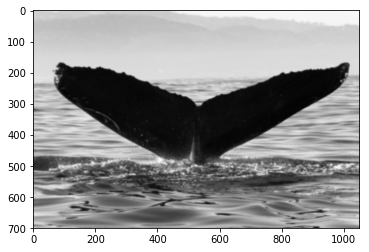

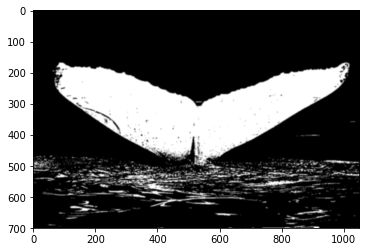

70
Doing:  9119bb1a2.jpg : (1767, 1, 2)


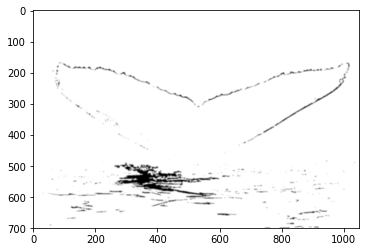

True

In [18]:
#Gaussian Threshold and Image Sharpening

#file = "8032df288.jpg" # 0.0049 good
#file = "8201ded69.jpg" # 0.1888 good
#file = "8230c70bc.jpg" # 0.3690 good
#file = "08248f449.jpg" # 0.2382 good
#file = "8248f1414.jpg" # 0.0819 good
#file = "8282ee983.jpg" # 0.1213 good
#file = "8294e5a2d.jpg" # 0.3418 good
#file = "8254b9829.jpg" # 0.0034 good
#file = "8287ae563.jpg" # 0.3476 good
#file = "08315a537.jpg" # 0.0000 good
#file = "8328e1a2c.jpg" # 0.0675 good
#file = "01425e516.jpg" # 0.1558 good
#file = "8063d319b.jpg" # 0.0000 good
#file = "8011b9b6f.jpg" # 0.0165 good
#file = "8179beabd.jpg" # 0.0393 good
#file = "8262c7a59.jpg" # 0.0759 good
#file = "8217a17a1.jpg" # 0.0003 good
#file = "8334d8b8f.jpg" # 0.2194 good
#file = "8338c763f.jpg" # 0.2730 good
#file = "8359c3a48.jpg" # 0.1257 good
#file = "8359e5271.jpg" # 0.2914 good
#file = "08406b193.jpg" # 0.2257 good
#file = "08406b193.jpg" # 0.1356 good
#file = "8707e737e.jpg" # 0.2098 good
#file = "8762e8619.jpg" # 0.1133 good
#file = "9086b3d6e.jpg" # 0.0510 good
#file = "9148fd895.jpg" # 0.0100 good
#file = "9264dd387.jpg" # 0.1830 good
#file = "9247fe255.jpg" # 0.0100 Partial
#file = "9219b6e10.jpg" # 0.0100 Partial
#file = "9157e607c.jpg" # 0.3355 Partial
#file = "9148d9ef2.jpg" # 0.0510 Partial
#file = "9147c46b0.jpg" # 0.0510 Partial
#file = "9102a74ab.jpg" # 0.0569 Partial
#file = "8951a26a6.jpg" # 0.1469 Partial
#file = "8752dfba4.jpg" # 0.0855 Partial
#file = "8599a754e.jpg" # 0.2257 Partial
#file = "8388acbce.jpg" # 0.2914 Partial
#file = "8386c8874.jpg" # 0.0719 Partial 
#file = "8378ddd44.jpg" # 0.2914 Partial
#file = "8336c3836.jpg" # 0.0433 Partial
#file = "8180c1ef0.jpg" # 0.2935 Partial
#file = "8223ae8a6.jpg" # 0.3649 Partial
#file = "8276c7d3f.jpg" # 0.0016 Partial
#file = "0831d05a7.jpg" # 0.1611 Partial
#file = "08032bc2f.jpg" # 0.0887 Partial
#file = "8106d9d50.jpg" # 0.1433 Partial
#file = "8268d4c27.jpg" # 0.1469 Partial
#file = "8324c1929.jpg" # 0.1385 Partial
#file = "8319e2797.jpg" # 0.0757 sucks can't find
#file = "8198faa03.jpg" # 0.0571 sucks inverted
#file = "9074c1b18.jpg" # 0.0043 sucks
file = "9119bb1a2.jpg" # 0.2392 sucks
#file = "9064d5875.jpg" # 0.1098 sucks
#file = "8389e2f4d.jpg" # 0.2015 sucks
#file = "8190c00d2.jpg" # 0.1428 sucks
#file = "08242d8d5.jpg" # 0.0952 sucks
#file = "8763a9311.jpg" # 0.1160 sucks
#file = "9242f9ffb.jpg" # 0.1022 sucks
#file = "9416ffc0c.jpg" # 0.1830 sucks
#file = "9092cbc85.jpg" # 0.0510 sucks not found

img = cv2.imread(origdir + "/" + file,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()


img = cv2.imread(origdir + "/" + file,0)

# Sharpen Image
kernel = np.zeros( (9,9), np.float32)
kernel[4,4] = 2.0   #Identity, times two! 

#Create a box filter:
boxFilter = np.ones( (9,9), np.float32) / 81.0

#Subtract the two:
kernel = kernel - boxFilter

#Note that we are subject to overflow and underflow here...but I believe that
# filter2D clips top and bottom ranges on the output, plus you'd need a
# very bright or very dark pixel surrounded by the opposite type.

old_img = img
custom = cv2.filter2D(img, -1, kernel)

img = custom

ret,thresh = cv2.threshold(img,50,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()


# Try to determine the darkness of the image.
total_area = img.shape[0] * img.shape[1]
dark_pixels = cv2.countNonZero(thresh)
howdark = dark_pixels / total_area

if howdark == 0.0:
    lowerbound = 100
elif howdark < .01:
    lowerbound = 190
elif howdark < 0.10:
    lowerbound = 150
elif howdark < 0.13:
    lowerbound = 120
elif howdark < 0.15:
    lowerbound = 90
elif howdark < 0.19:
    lowerbound = 80 
elif howdark < 0.30:
    lowerbound = 70
else:
    lowerbound = 50

print(lowerbound)
    
#redo threshold with lowerbound defined
ret,thresh = cv2.threshold(img,lowerbound,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
_,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# find contour with most points 
contour_shape = {}
i = 0
for contour in contours:
    if contour.shape[0] > 500:
        contour_shape[contour.shape[0]] = i
    i += 1

contour_shape_keys = sorted(contour_shape)
try:
    c = contours[contour_shape[contour_shape_keys[-1]]]
except:
    print("Can't do:", file)

# Fill that contour
cv2.drawContours(img,[c],-1,(0,0,0),-1)
img[img != 0] = 255
print("Doing: ", file, ":",c.shape)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

cv2.imwrite(exampledir + "/" + file, img)


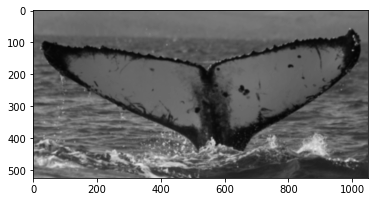

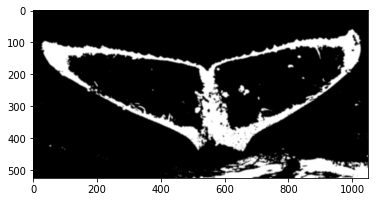

0.13857959183673468


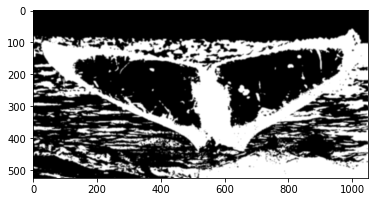

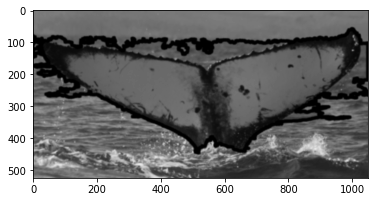

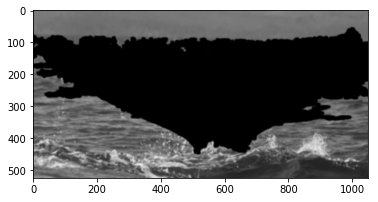

In [584]:
# Gaussian Threshold

#file = "8032df288.jpg" # 0.0049 good
#file = "8201ded69.jpg" # 0.1888 good
#file = "8230c70bc.jpg" # 0.3690 good
#file = "08248f449.jpg" # 0.2382 good
#file = "8248f1414.jpg" # 0.0819 good
#file = "8282ee983.jpg" # 0.1213 good
#file = "8294e5a2d.jpg" # 0.3418 good
#file = "0831d05a7.jpg" # 0.1611 good 
#file = "8254b9829.jpg" # 0.1360 good
#file = "8276c7d3f.jpg" # 0.0016 good
#file = "8262c7a59.jpg" # 0.0759 good
#file = "8287ae563.jpg" # 0.3476 good
#file = "8223ae8a6.jpg" # 0.3649 good
#file = "08315a537.jpg" # 0.0000 good
#file = "8328e1a2c.jpg" # 0.0675 good
#file = "01425e516.jpg" # 0.1558 good
#file = "8180c1ef0.jpg" # 0.2935 good
#file = "8217a17a1.jpg" # 0.0003 Partial
#file = "08032bc2f.jpg" # 0.0887 Partial
#file = "8106d9d50.jpg" # 0.1433 Partial
#file = "8268d4c27.jpg" # 0.1469 Partial
#file = "8179beabd.jpg" # 0.0393 Partial
#file = "8063d319b.jpg" # 0.0000 sucks can't find
#file = "8319e2797.jpg" # 0.0757 sucks can't find
#file = "8198faa03.jpg" # 0.0571 sucks inverted
#file = "8011b9b6f.jpg" # 0.0165 sucks
#file = "8190c00d2.jpg" # 0.1428 sucks
#file = "08242d8d5.jpg" # 0.0952 sucks
#file = "8324c1929.jpg" # 0.1385 sucks inverted

img = cv2.imread(origdir + "/" + file,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

ret,thresh = cv2.threshold(img,50,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
#ret,thresh = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Try to determine the darkness of the image.
total_area = img.shape[0] * img.shape[1]
dark_pixels = cv2.countNonZero(thresh)
howdark = dark_pixels / total_area

print(howdark)
if howdark == 0.0:
    lowerbound = 90
elif howdark < .01:
    lowerbound = 190    
elif howdark < 0.10:
    lowerbound = 150
elif howdark < 0.15:
    lowerbound = 90
elif howdark < 0.19:
    lowerbound = 80 
elif howdark < 0.30:
    lowerbound = 70 
else:
    lowerbound = 50


#redo threshold with lowerbound defined
ret,thresh = cv2.threshold(img,lowerbound,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
_,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()



# find contour with most points 
contour_shape = {}
i = 0
for contour in contours:
    if contour.shape[0] > 500:
        contour_shape[contour.shape[0]] = i
    i += 1

contour_shape_keys = sorted(contour_shape)
c = contours[contour_shape[contour_shape_keys[-1]]]


# Draw line around that contour
cv2.drawContours(img,[c],-1,(0,0,0),10)        
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Fill that contour
cv2.drawContours(img,[c],-1,(0,0,0),-1)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

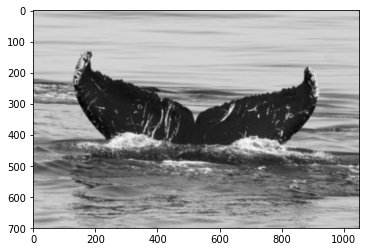

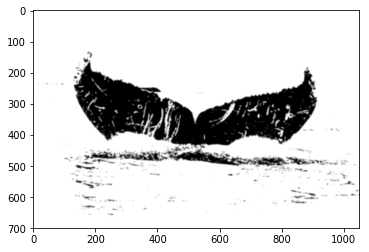

0.8441714285714286


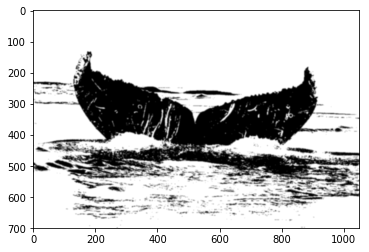

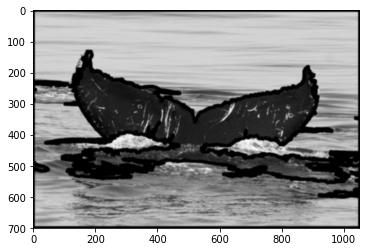

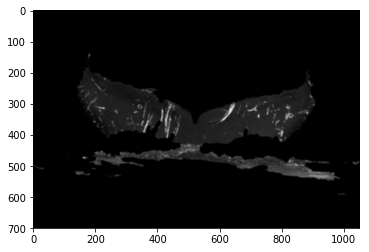

In [537]:
# Regular Threshold

#file = "08032bc2f.jpg" # .91 good
#file = "8032df288.jpg" # .88 good
#file = "8063d319b.jpg" # 1.0 good
#file = "8011b9b6f.jpg" # .98 good
#file = "8201ded69.jpg" # .85 good
#file = "8230c70bc.jpg" # .63 good
#file = "08248f449.jpg" # .76 good
#file = "8248f1414.jpg" # .92 good
#file = "8282ee983.jpg" # .88 good
#file = "8294e5a2d.jpg" # .65 good
#file = "8198faa03.jpg" # .99 good
#file = "8254b9829.jpg" # .86 Partial
#file = "8217a17a1.jpg" # 1.0 Partial
#file = "8106d9d50.jpg" # .86 Partial
#file = "8276c7d3f.jpg" # .99 Partial
#file = "8268d4c27.jpg" # .85 Partial
#file = "8262c7a59.jpg" # .92 Partial
#file = "8179beabd.jpg" # .96 Partial
#file = "0831d05a7.jpg" # .87 Partial 
#file = "8287ae563.jpg" # .65 sucks inverted
#file = "8328e1a2c.jpg" # .93 sucks inverted
#file = "8180c1ef0.jpg" # .75 sucks inverted
#file = "8223ae8a6.jpg" # .67 sucks inverted
#file = "08315a537.jpg" # 1.0 sucks cant find contour
#file = "8319e2797.jpg" # .92 sucks inverted
#file = "01425e516.jpg" # .84 sucks inverted
#file = "8190c00d2.jpg" # .88 sucks
#file = "08242d8d5.jpg" # .90 sucks
#file = "8324c1929.jpg" # .86 sucks inverted

img = cv2.imread(origdir + "/" + file,0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()


ret,thresh = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Try to determine the darkness of the image.
total_area = img.shape[0] * img.shape[1]
dark_pixels = cv2.countNonZero(thresh)
howdark = dark_pixels / total_area

print(howdark)

if howdark == 1:
    lowerbound = 160
elif howdark > 0.95:
    lowerbound = 110
elif howdark > 0.90:
    lowerbound = 100
elif howdark > 0.80:
    lowerbound = 90
elif howdark > .70:
    lowerbound = 65
else:
    lowerbound = 50


#redo threshold with lowerbound defined
ret,thresh = cv2.threshold(img,lowerbound,120,cv2.THRESH_BINARY)
_,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(thresh, cmap = 'gray', interpolation = 'bicubic')
plt.show()



# find contour with most points 
contour_shape = {}
i = 0
for contour in contours:
    if contour.shape[0] > 500:
        contour_shape[contour.shape[0]] = i
    i += 1

contour_shape_keys = sorted(contour_shape)
c = contours[contour_shape[contour_shape_keys[-1]]]


# Draw line around that contour
cv2.drawContours(img,[c],-1,(0,0,0),10)        
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Fill that contour
cv2.drawContours(img,[c],-1,(0,0,0),-1)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

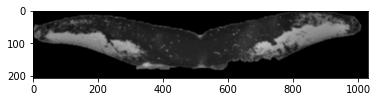

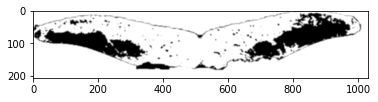

[<KeyPoint 0x7fc11421c9f0>, <KeyPoint 0x7fc114417900>, <KeyPoint 0x7fc1140644b0>, <KeyPoint 0x7fc114064e70>, <KeyPoint 0x7fc114064360>, <KeyPoint 0x7fc114064f90>, <KeyPoint 0x7fc114064960>, <KeyPoint 0x7fc10d36b150>]


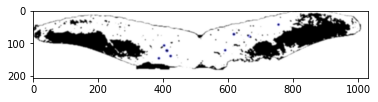

In [281]:
file = "0831d05a7.jpg"

# Load and display the original image
img = cv2.imread(indir + "/" + file)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

lower_black = np.array([0,0,0], dtype = "uint16")
upper_black = np.array([70,70,70], dtype = "uint16")
black_mask = cv2.inRange(img, lower_black, upper_black)


# Load and display the original image
plt.imshow(black_mask, cmap = 'gray', interpolation = 'bicubic')
plt.show()

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create() 
# Detect blobs.
keypoints = detector.detect(black_mask)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(black_mask, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(keypoints)

# Load and display the original image
plt.imshow(im_with_keypoints, cmap = 'gray', interpolation = 'bicubic')
plt.show()